<a href="https://colab.research.google.com/github/CalculatedContent/WeightWatcher/blob/master/examples/WW-GPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeightWatcher - GPT

This notebook reproduces Figure 6(b) from our [Nature paper](https://www.nature.com/articles/s41467-021-24025-8)

It compares the distribution of layer PL Alpha $\alpha$ metrics for the the GPT and GPT2 pretrained models


And discussed on the [CalculatedContent Blog](https://calculatedcontent.com/2021/07/09/how-to-tell-if-you-have-trained-your-model-with-enough-data/)



In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Import WeightWatcher


In [2]:
import sys
if 'google.colab' in sys.modules:
    !pip install transformers weightwatcher

In [3]:
import torch
import weightwatcher as ww
torch.__version__, ww.__version__

('1.6.0', '0.6.4')

In [4]:
import transformers
from transformers import OpenAIGPTModel,GPT2Model

INFO:transformers.file_utils:PyTorch version 1.6.0 available.
INFO:transformers.file_utils:TensorFlow version 2.1.0 available.


In [5]:
gpt_model = OpenAIGPTModel.from_pretrained('openai-gpt')
gpt_model.eval();

gpt2_model = GPT2Model.from_pretrained('gpt2')
gpt2_model.eval();

INFO:filelock:Lock 5398694224 acquired on /Users/charleshmartin/.cache/torch/transformers/a27bb7c70e9002d7558d2682d5a95f3c0a8b31034616309459e0b51ef07ade09.bd0797be126548711309ad2174d2afb16e3c37e891707667603d85e35a4ad001.lock
INFO:transformers.file_utils:https://s3.amazonaws.com/models.huggingface.co/bert/openai-gpt-config.json not found in cache or force_download set to True, downloading to /Users/charleshmartin/.cache/torch/transformers/tmp3isqcr76


INFO:transformers.file_utils:storing https://s3.amazonaws.com/models.huggingface.co/bert/openai-gpt-config.json in cache at /Users/charleshmartin/.cache/torch/transformers/a27bb7c70e9002d7558d2682d5a95f3c0a8b31034616309459e0b51ef07ade09.bd0797be126548711309ad2174d2afb16e3c37e891707667603d85e35a4ad001
INFO:transformers.file_utils:creating metadata file for /Users/charleshmartin/.cache/torch/transformers/a27bb7c70e9002d7558d2682d5a95f3c0a8b31034616309459e0b51ef07ade09.bd0797be126548711309ad2174d2afb16e3c37e891707667603d85e35a4ad001
INFO:filelock:Lock 5398694224 released on /Users/charleshmartin/.cache/torch/transformers/a27bb7c70e9002d7558d2682d5a95f3c0a8b31034616309459e0b51ef07ade09.bd0797be126548711309ad2174d2afb16e3c37e891707667603d85e35a4ad001.lock
INFO:transformers.configuration_utils:loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/openai-gpt-config.json from cache at /Users/charleshmartin/.cache/torch/transformers/a27bb7c70e9002d7558d2682d5a95f3c0a8b3

INFO:filelock:Lock 4854526608 acquired on /Users/charleshmartin/.cache/torch/transformers/e45ee1afb14c5d77c946e66cb0fa70073a77882097a1a2cefd51fd24b172355e.e7ee3fcd07c695a4c9f31ca735502c090230d988de03202f7af9ebe1c3a4054c.lock
INFO:transformers.file_utils:https://s3.amazonaws.com/models.huggingface.co/bert/openai-gpt-pytorch_model.bin not found in cache or force_download set to True, downloading to /Users/charleshmartin/.cache/torch/transformers/tmpx2u1odm2


INFO:transformers.file_utils:storing https://s3.amazonaws.com/models.huggingface.co/bert/openai-gpt-pytorch_model.bin in cache at /Users/charleshmartin/.cache/torch/transformers/e45ee1afb14c5d77c946e66cb0fa70073a77882097a1a2cefd51fd24b172355e.e7ee3fcd07c695a4c9f31ca735502c090230d988de03202f7af9ebe1c3a4054c
INFO:transformers.file_utils:creating metadata file for /Users/charleshmartin/.cache/torch/transformers/e45ee1afb14c5d77c946e66cb0fa70073a77882097a1a2cefd51fd24b172355e.e7ee3fcd07c695a4c9f31ca735502c090230d988de03202f7af9ebe1c3a4054c
INFO:filelock:Lock 4854526608 released on /Users/charleshmartin/.cache/torch/transformers/e45ee1afb14c5d77c946e66cb0fa70073a77882097a1a2cefd51fd24b172355e.e7ee3fcd07c695a4c9f31ca735502c090230d988de03202f7af9ebe1c3a4054c.lock
INFO:transformers.modeling_utils:loading weights file https://s3.amazonaws.com/models.huggingface.co/bert/openai-gpt-pytorch_model.bin from cache at /Users/charleshmartin/.cache/torch/transformers/e45ee1afb14c5d77c946e66cb0fa70073a77

INFO:filelock:Lock 6344393104 acquired on /Users/charleshmartin/.cache/torch/transformers/4be02c5697d91738003fb1685c9872f284166aa32e061576bbe6aaeb95649fcf.db13c9bc9c7bdd738ec89e069621d88e05dc670366092d809a9cbcac6798e24e.lock
INFO:transformers.file_utils:https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-config.json not found in cache or force_download set to True, downloading to /Users/charleshmartin/.cache/torch/transformers/tmptelqj9bc


INFO:transformers.file_utils:storing https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-config.json in cache at /Users/charleshmartin/.cache/torch/transformers/4be02c5697d91738003fb1685c9872f284166aa32e061576bbe6aaeb95649fcf.db13c9bc9c7bdd738ec89e069621d88e05dc670366092d809a9cbcac6798e24e
INFO:transformers.file_utils:creating metadata file for /Users/charleshmartin/.cache/torch/transformers/4be02c5697d91738003fb1685c9872f284166aa32e061576bbe6aaeb95649fcf.db13c9bc9c7bdd738ec89e069621d88e05dc670366092d809a9cbcac6798e24e
INFO:filelock:Lock 6344393104 released on /Users/charleshmartin/.cache/torch/transformers/4be02c5697d91738003fb1685c9872f284166aa32e061576bbe6aaeb95649fcf.db13c9bc9c7bdd738ec89e069621d88e05dc670366092d809a9cbcac6798e24e.lock
INFO:transformers.configuration_utils:loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-config.json from cache at /Users/charleshmartin/.cache/torch/transformers/4be02c5697d91738003fb1685c9872f284166aa32e061576b

INFO:filelock:Lock 6344247824 acquired on /Users/charleshmartin/.cache/torch/transformers/4295d67f022061768f4adc386234dbdb781c814c39662dd1662221c309962c55.778cf36f5c4e5d94c8cd9cefcf2a580c8643570eb327f0d4a1f007fab2acbdf1.lock
INFO:transformers.file_utils:https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-pytorch_model.bin not found in cache or force_download set to True, downloading to /Users/charleshmartin/.cache/torch/transformers/tmpqvso16uk


INFO:transformers.file_utils:storing https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-pytorch_model.bin in cache at /Users/charleshmartin/.cache/torch/transformers/4295d67f022061768f4adc386234dbdb781c814c39662dd1662221c309962c55.778cf36f5c4e5d94c8cd9cefcf2a580c8643570eb327f0d4a1f007fab2acbdf1
INFO:transformers.file_utils:creating metadata file for /Users/charleshmartin/.cache/torch/transformers/4295d67f022061768f4adc386234dbdb781c814c39662dd1662221c309962c55.778cf36f5c4e5d94c8cd9cefcf2a580c8643570eb327f0d4a1f007fab2acbdf1
INFO:filelock:Lock 6344247824 released on /Users/charleshmartin/.cache/torch/transformers/4295d67f022061768f4adc386234dbdb781c814c39662dd1662221c309962c55.778cf36f5c4e5d94c8cd9cefcf2a580c8643570eb327f0d4a1f007fab2acbdf1.lock
INFO:transformers.modeling_utils:loading weights file https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-pytorch_model.bin from cache at /Users/charleshmartin/.cache/torch/transformers/4295d67f022061768f4adc386234dbdb781c814c39662dd1

In [6]:
watcher = ww.WeightWatcher(model=gpt_model)
gpt_details = watcher.describe()

INFO:weightwatcher:

python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
torch version 1.6.0
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': None, 'fit': 'power_law', 'sparsify': True, 'detX': True, 'mp_fit': False, 'min_evals': 0, 'max_evals': None, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'in



python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
torch version 1.6.0


In [7]:
gpt_details

layer_id       name      M        N          Q            layer_type  \
0        1  Embedding  768.0  40478.0  52.705729  LAYER_TYPE.EMBEDDING   
0        2  Embedding  512.0    768.0   1.500000  LAYER_TYPE.EMBEDDING   
0        7     Conv1D  768.0   2304.0   3.000000     LAYER_TYPE.CONV1D   
0        8     Conv1D  768.0    768.0   1.000000     LAYER_TYPE.CONV1D   
0       13     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0       14     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0       19     Conv1D  768.0   2304.0   3.000000     LAYER_TYPE.CONV1D   
0       20     Conv1D  768.0    768.0   1.000000     LAYER_TYPE.CONV1D   
0       25     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0       26     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0       31     Conv1D  768.0   2304.0   3.000000     LAYER_TYPE.CONV1D   
0       32     Conv1D  768.0    768.0   1.000000     LAYER_TYPE.CONV1D   
0       37     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0       38     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0       43     Conv1D  768.0   2304.0   3.000000     LAYER_TYPE.CONV1D   
0       44     Conv1D  768.0    768.0   1.000000     LAYER_TYPE.CONV1D   
0       49     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0       50     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0       55     Conv1D  768.0   2304.0   3.000000     LAYER_TYPE.CONV1D   
0       56     Conv1D  768.0    768.0   1.000000     LAYER_TYPE.CONV1D   
0       61     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0       62     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0       67     Conv1D  768.0   2304.0   3.000000     LAYER_TYPE.CONV1D   
0       68     Conv1D  768.0    768.0   1.000000     LAYER_TYPE.CONV1D   
0       73     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0       74     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0       79     Conv1D  768.0   2304.0   3.000000     LAYER_TYPE.CONV1D   
0       80     Conv1D  768.0    768.0   1.000000     LAYER_TYPE.CONV1D   
0       85     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0       86     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0       91     Conv1D  768.0   2304.0   3.000000     LAYER_TYPE.CONV1D   
0       92     Conv1D  768.0    768.0   1.000000     LAYER_TYPE.CONV1D   
0       97     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0       98     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0      103     Conv1D  768.0   2304.0   3.000000     LAYER_TYPE.CONV1D   
0      104     Conv1D  768.0    768.0   1.000000     LAYER_TYPE.CONV1D   
0      109     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0      110     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0      115     Conv1D  768.0   2304.0   3.000000     LAYER_TYPE.CONV1D   
0      116     Conv1D  768.0    768.0   1.000000     LAYER_TYPE.CONV1D   
0      121     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0      122     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0      127     Conv1D  768.0   2304.0   3.000000     LAYER_TYPE.CONV1D   
0      128     Conv1D  768.0    768.0   1.000000     LAYER_TYPE.CONV1D   
0      133     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0      134     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0      139     Conv1D  768.0   2304.0   3.000000     LAYER_TYPE.CONV1D   
0      140     Conv1D  768.0    768.0   1.000000     LAYER_TYPE.CONV1D   
0      145     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   
0      146     Conv1D  768.0   3072.0   4.000000     LAYER_TYPE.CONV1D   

           longname  num_evals   rf  
0      tokens_embed      768.0  1.0  
0   positions_embed      512.0  1.0  
0   h.0.attn.c_attn      768.0  1.0  
0   h.0.attn.c_proj      768.0  1.0  
0      h.0.mlp.c_fc      768.0  1.0  

In [8]:
watcher = ww.WeightWatcher(model=gpt_model)
gpt_details = watcher.analyze(randomize=True)

INFO:weightwatcher:

python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
torch version 1.6.0
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': False, 'min_evals': 50, 'max_evals': 10000, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': [], 'xmin_max': None}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:torch version 1.6.0
INFO:weightwatcher:framework from model = 2




python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
torch version 1.6.0


In [9]:
watcher = ww.WeightWatcher(model=gpt2_model)
gpt2_details = watcher.analyze(randomize=True)

INFO:weightwatcher:

python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
torch version 1.6.0
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': False, 'min_evals': 50, 'max_evals': 10000, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': [], 'xmin_max': None}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:torch version 1.6.0
INFO:weightwatcher:framework from model = 2




python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
torch version 1.6.0


In [10]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7,5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

Text(0.5, 0, 'alpha $(\\alpha)$ PL exponent')

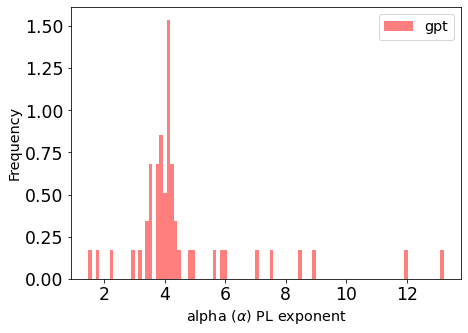

In [11]:
gpt_details.alpha.plot.hist(bins=100, color='red', alpha=0.5, density=True, label='gpt')
plt.legend()
plt.xlabel(r"alpha $(\alpha)$ PL exponent")

Text(0.5, 0, 'alpha $(\\alpha)$ PL exponent')

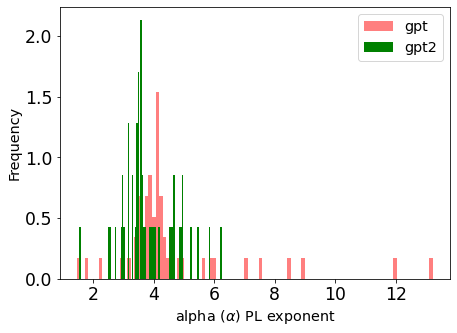

In [12]:
gpt_details.alpha.plot.hist(bins=100, color='red', alpha=0.5, density=True, label='gpt')
gpt2_details.alpha.plot.hist(bins=100, color='green', density=True, label='gpt2')
plt.legend()
plt.xlabel(r"alpha $(\alpha)$ PL exponent")

<AxesSubplot:xlabel='alpha', ylabel='rand_distance'>

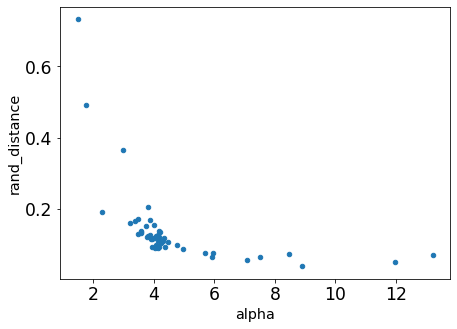

In [13]:
gpt_details.plot.scatter(x='alpha' , y='rand_distance')

<AxesSubplot:xlabel='alpha', ylabel='rand_distance'>

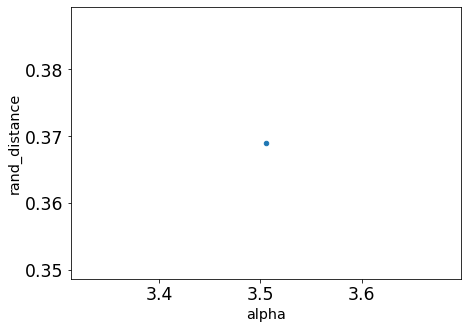

In [19]:
gpt2_details.plot.scatter(x='alpha' , y='rand_distance')

### Lets look at the GPT2 outlier

In [15]:
gpt2_details[(gpt2_details.alpha > 3)&(gpt2_details.rand_distance > 0.3) ]

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


layer_id       name         D  Lambda      M        N          Q     alpha  \
0        1  Embedding  0.037722    -1.0  768.0  50257.0  65.438802  3.505816   

   alpha_weighted   best_fit  ...     sigma  spectral_norm  stable_rank  \
0        18.70689  power_law  ...  0.213309  216749.676787     3.676961   

       sv_max  warning  weak_rank_loss     ww_maxdist ww_softrank  \
0  465.563827  success             0.0  215440.749299    0.006039   

            xmax         xmin  
0  216749.676787  1152.174587  

[1 rows x 43 columns]

INFO:weightwatcher:

python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
torch version 1.6.0
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:Fixing fingers using  clip_xmax
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': 'clip_xmax', 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': False, 'min_evals': 50, 'max_evals': 10000, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': [], 'xmin_max': None}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:Fixing fingers using  clip_xmax
INFO:weightwatcher:torch v



python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
torch version 1.6.0


INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.51 sigma 0.21 TPL or PL? -0.0027
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 4.0536 sigma 0.3133 TPL or PL? 0.5067
INFO:weightwatcher:2 fit alpha 4.05 sigma 0.31 TPL or PL? 0.5067
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 4.1745 sigma 0.3274 TPL or PL? 0.8159
INFO:weightwatcher:3 fit alpha 4.17 sigma 0.33 TPL or PL? 0.8159
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 4.2810 sigma 0.3402 TPL or PL? 0.9921
INFO:weightwatcher:4 fit alpha 4.28 sigma 0.34 TPL or PL? 0.9921
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 4.4202 sigma 0.3646 TPL or PL? 1.0334
INFO:weightwatcher:5 fit alpha 4.42 sigma 0.36 TPL or PL? 1.0334
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 4.5530 sigma 0.3787 TPL or PL?

checking alpha


INFO:weightwatcher:checking fit 10 xmax 3057.0856  alpha 4.87 sigma 0.42
INFO:weightwatcher:checking fit 11 xmax 2898.0322  alpha 4.87 sigma 0.42


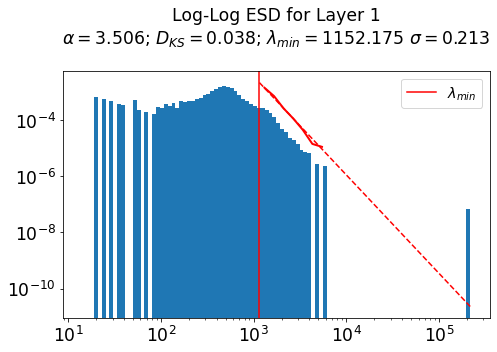

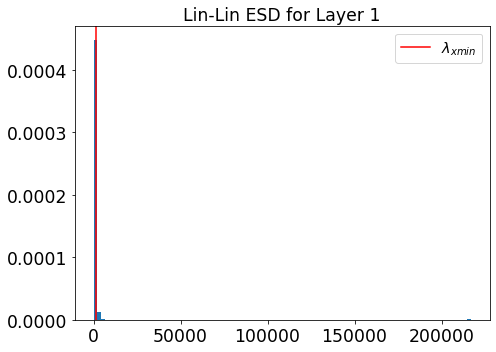

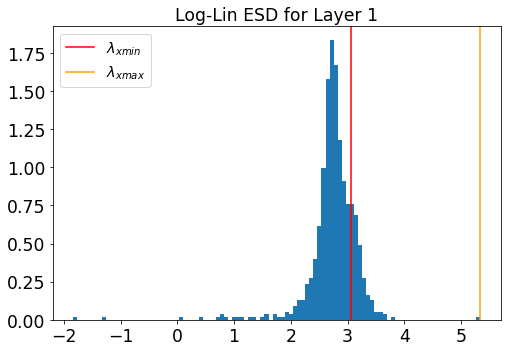

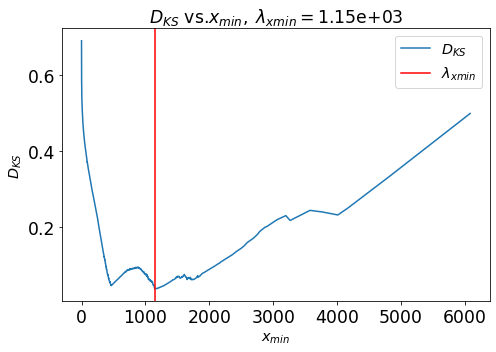

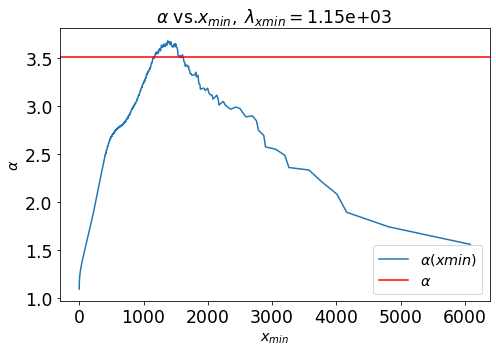

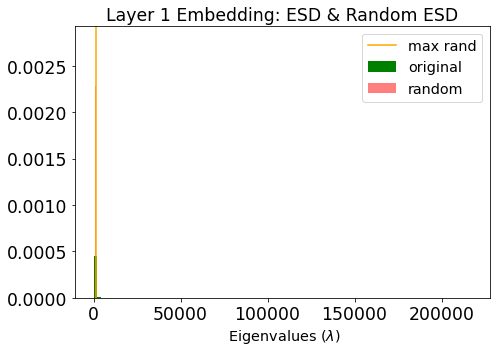

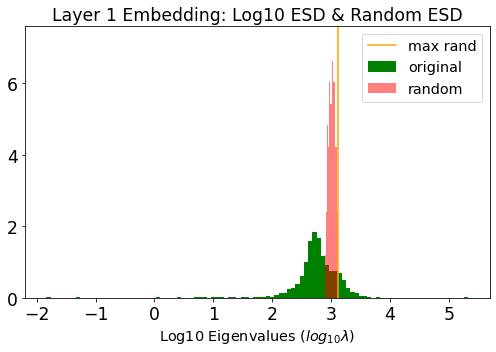

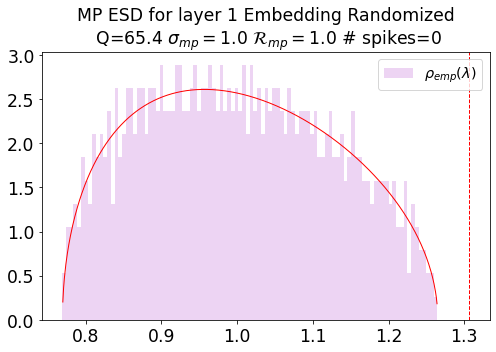

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 1.55 sigma 0.03 TPL or PL? 0.8982
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 1.5604 sigma 0.0260 TPL or PL? 1.1444
INFO:weightwatcher:2 fit alpha 1.56 sigma 0.03 TPL or PL? 1.1444


stopping at min alpha = 1.56
checking alpha


INFO:weightwatcher:checking fit 3 xmax 2834.5906  alpha 1.56 sigma 0.03
INFO:weightwatcher:checking fit 4 xmax 515.3644  alpha 1.56 sigma 0.03
INFO:weightwatcher:checking fit 5 xmax 255.2625  alpha 1.56 sigma 0.03


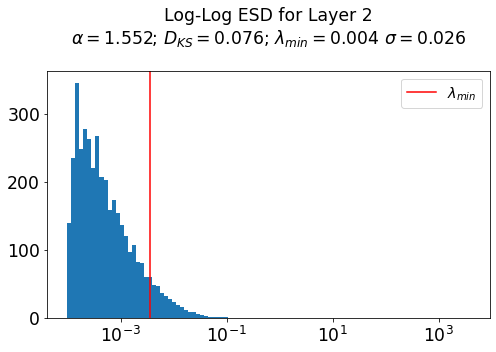

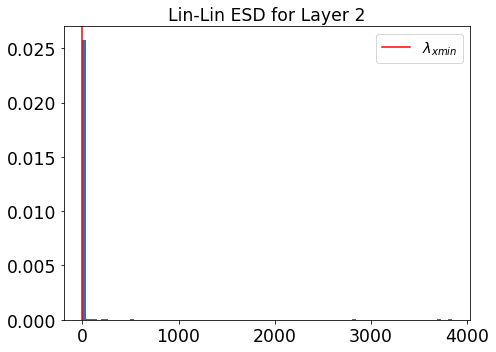

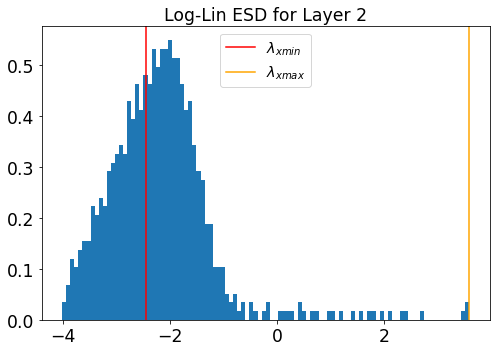

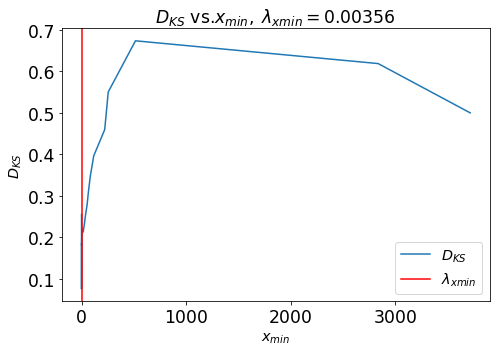

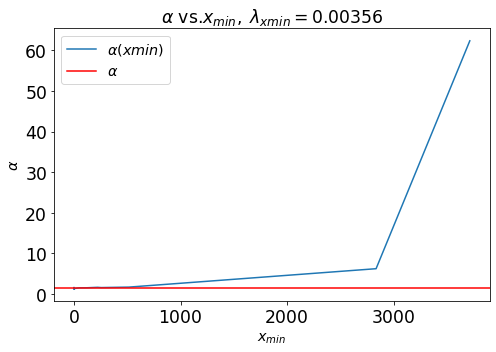

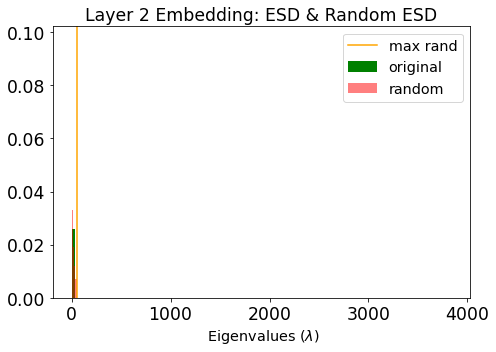

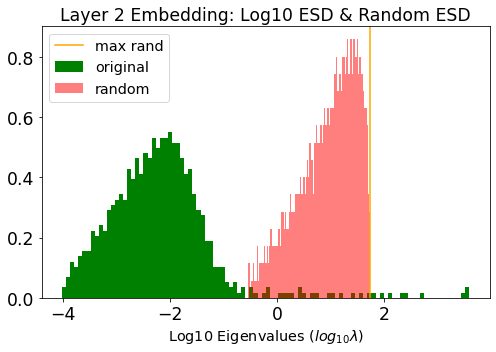

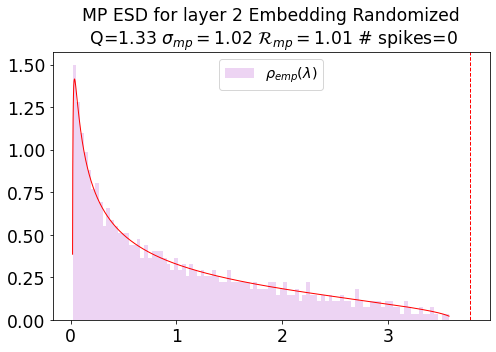

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 2.55 sigma 0.11 TPL or PL? 1.4358
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 2.5790 sigma 0.1125 TPL or PL? 1.7377
INFO:weightwatcher:2 fit alpha 2.58 sigma 0.11 TPL or PL? 1.7377
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 2.6058 sigma 0.1147 TPL or PL? 2.0918
INFO:weightwatcher:3 fit alpha 2.61 sigma 0.11 TPL or PL? 2.0918
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 7.5296 sigma 1.4249 TPL or PL? -0.0022
INFO:weightwatcher:4 fit alpha 7.53 sigma 1.42 TPL or PL? -0.0022
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 2.5989 sigma 0.1114 TPL or PL? 4.5266
INFO:weightwatcher:5 fit alpha 2.60 sigma 0.11 TPL or PL? 4.5266
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 2.6048 sigma 0.1113 TPL or PL

checking alpha


INFO:weightwatcher:checking fit 10 xmax 474.5320  alpha 2.64 sigma 0.11
INFO:weightwatcher:checking fit 11 xmax 468.0811  alpha 2.64 sigma 0.11
INFO:weightwatcher:checking fit 12 xmax 455.9265  alpha 2.64 sigma 0.11


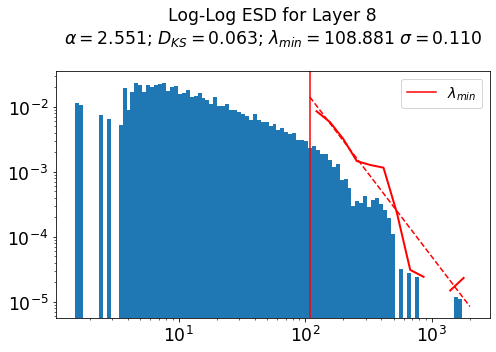

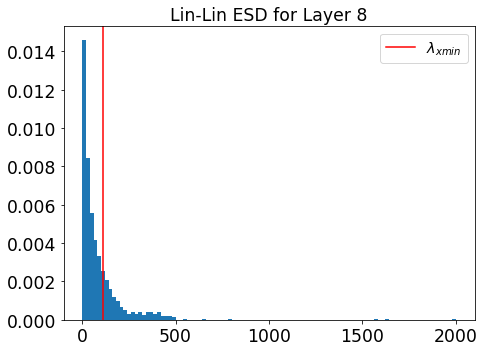

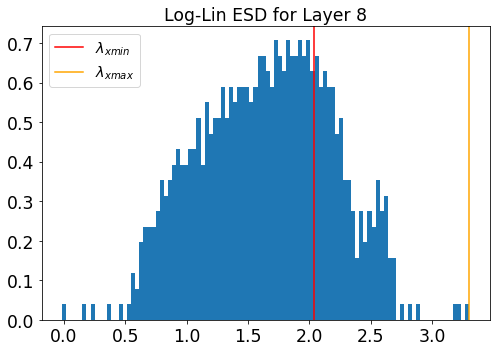

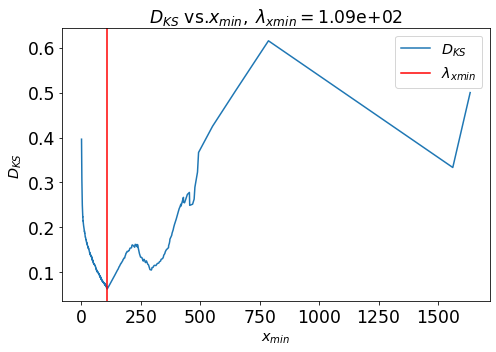

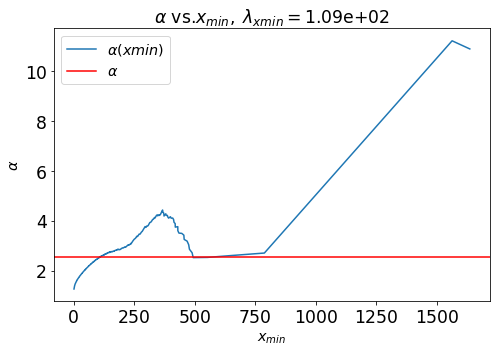

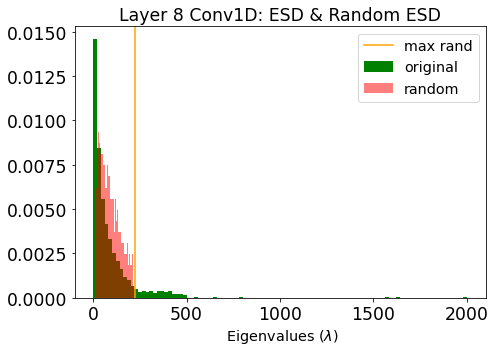

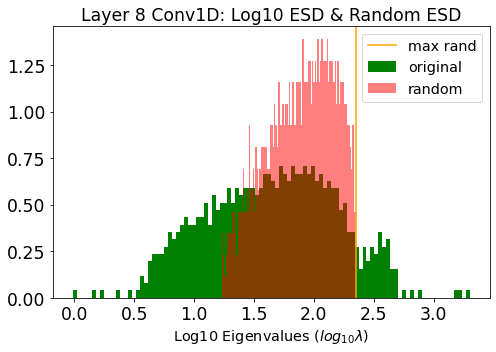

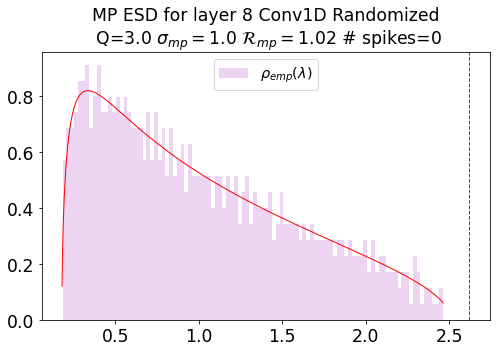

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 2.74 sigma 0.18 TPL or PL? 0.3528
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 2.8584 sigma 0.2078 TPL or PL? 0.5053
INFO:weightwatcher:2 fit alpha 2.86 sigma 0.21 TPL or PL? 0.5053
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.0016 sigma 0.2327 TPL or PL? 0.4597
INFO:weightwatcher:3 fit alpha 3.00 sigma 0.23 TPL or PL? 0.4597
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.2407 sigma 0.3078 TPL or PL? 0.2736
INFO:weightwatcher:4 fit alpha 3.24 sigma 0.31 TPL or PL? 0.2736
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.5051 sigma 0.4118 TPL or PL? 0.2052
INFO:weightwatcher:5 fit alpha 3.51 sigma 0.41 TPL or PL? 0.2052
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.8144 sigma 0.4757 TPL or PL? 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 158.7464  alpha 4.84 sigma 0.70
INFO:weightwatcher:checking fit 11 xmax 141.6050  alpha 4.84 sigma 0.70


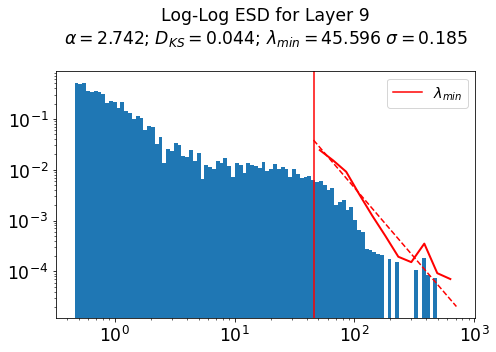

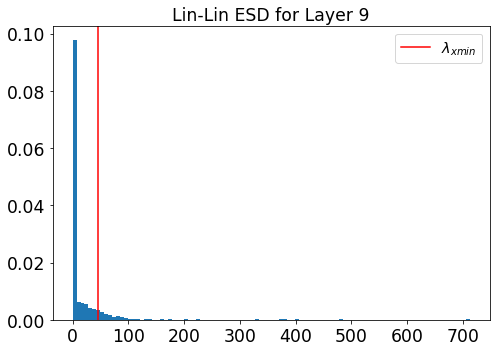

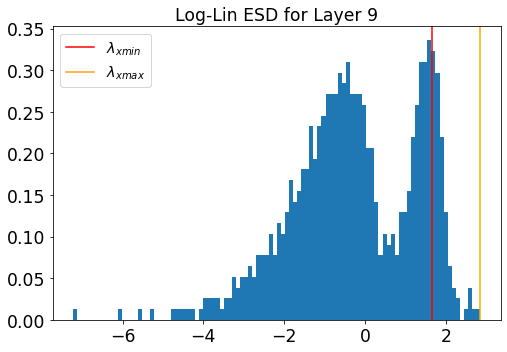

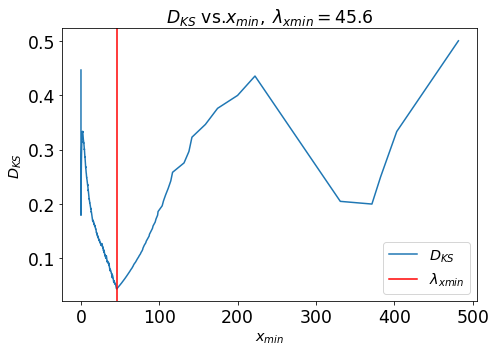

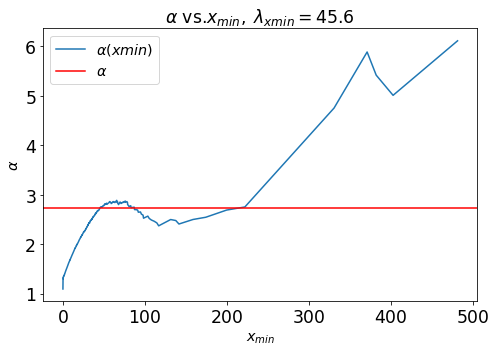

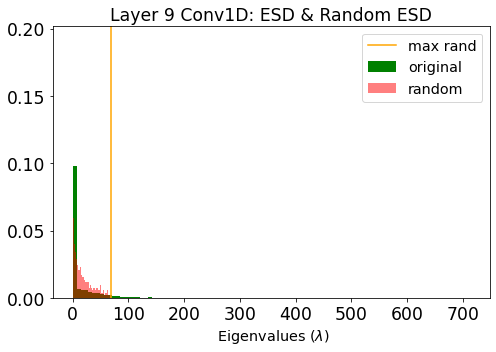

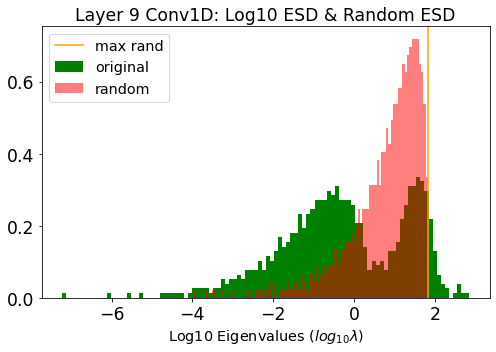

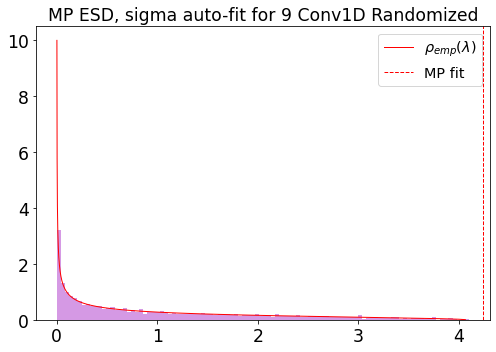

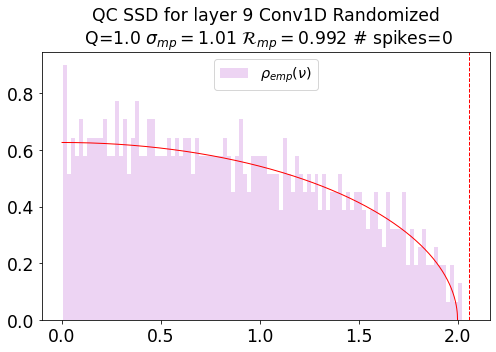

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.98 sigma 0.25 TPL or PL? -0.0007
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 4.7497 sigma 0.4330 TPL or PL? -0.0001
INFO:weightwatcher:2 fit alpha 4.75 sigma 0.43 TPL or PL? -0.0001
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 5.0727 sigma 0.4903 TPL or PL? 0.3219
INFO:weightwatcher:3 fit alpha 5.07 sigma 0.49 TPL or PL? 0.3219
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 5.4043 sigma 0.5505 TPL or PL? 0.4208
INFO:weightwatcher:4 fit alpha 5.40 sigma 0.55 TPL or PL? 0.4208
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 5.8832 sigma 0.7123 TPL or PL? 0.3580
INFO:weightwatcher:5 fit alpha 5.88 sigma 0.71 TPL or PL? 0.3580
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 6.2146 sigma 0.7689 TPL or P

checking alpha


INFO:weightwatcher:checking fit 10 xmax 216.0519  alpha 7.18 sigma 0.93
INFO:weightwatcher:checking fit 11 xmax 202.6669  alpha 7.18 sigma 0.93


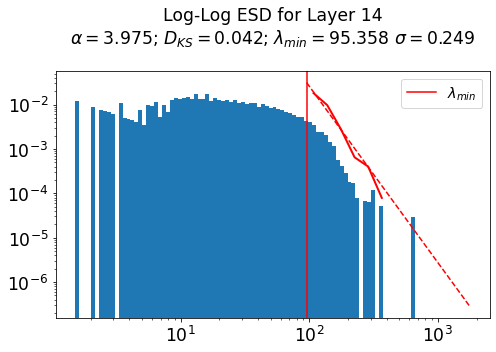

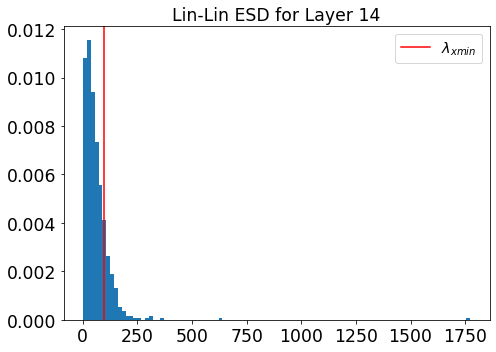

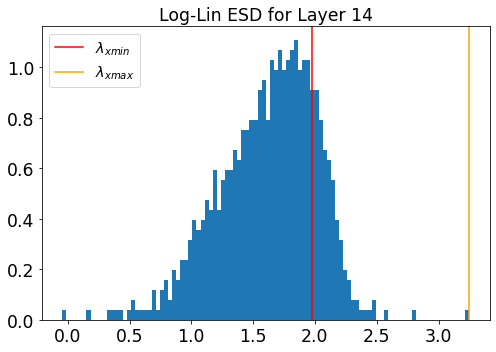

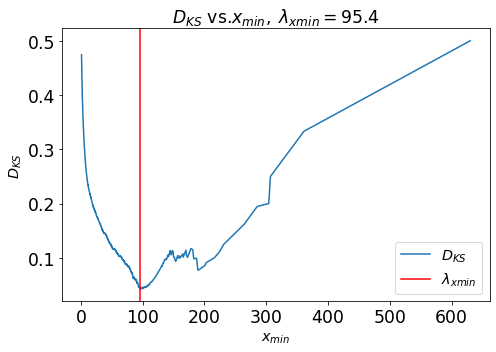

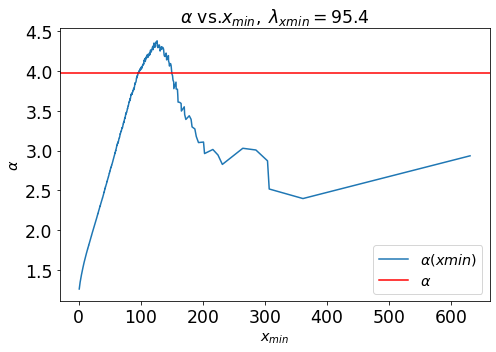

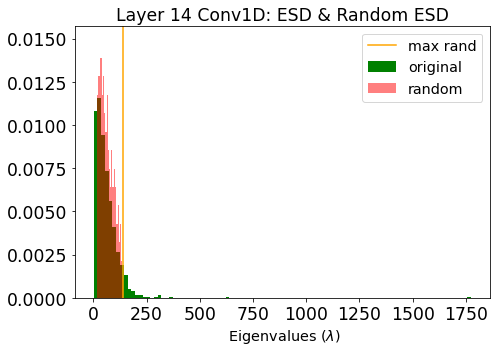

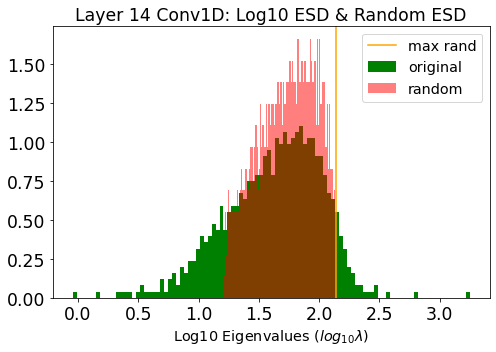

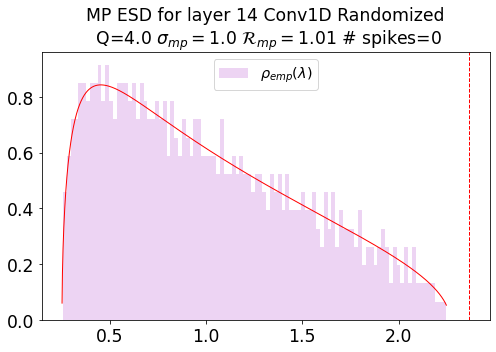

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.30 sigma 0.14 TPL or PL? -0.0010
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.4796 sigma 0.1578 TPL or PL? -0.0002
INFO:weightwatcher:2 fit alpha 3.48 sigma 0.16 TPL or PL? -0.0002
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.6416 sigma 0.1757 TPL or PL? -0.1848
INFO:weightwatcher:3 fit alpha 3.64 sigma 0.18 TPL or PL? -0.1848
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.7996 sigma 0.1965 TPL or PL? -0.0002
INFO:weightwatcher:4 fit alpha 3.80 sigma 0.20 TPL or PL? -0.0002
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 4.0001 sigma 0.2230 TPL or PL? -0.0006
INFO:weightwatcher:5 fit alpha 4.00 sigma 0.22 TPL or PL? -0.0006
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 4.1449 sigma 0.2391 TP

checking alpha


INFO:weightwatcher:checking fit 10 xmax 115.3162  alpha 4.79 sigma 0.35
INFO:weightwatcher:checking fit 11 xmax 96.3364  alpha 4.79 sigma 0.35
INFO:weightwatcher:checking fit 12 xmax 93.1457  alpha 4.79 sigma 0.35


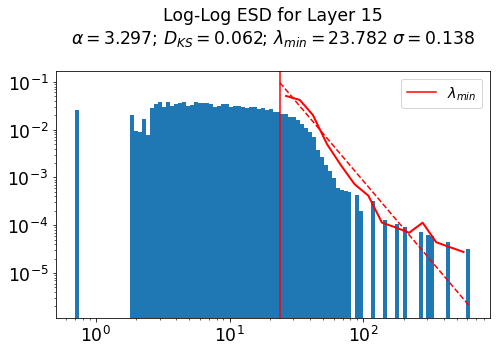

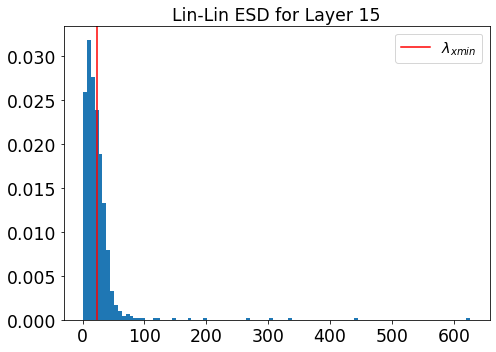

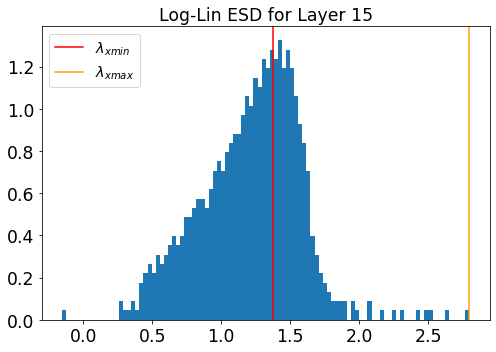

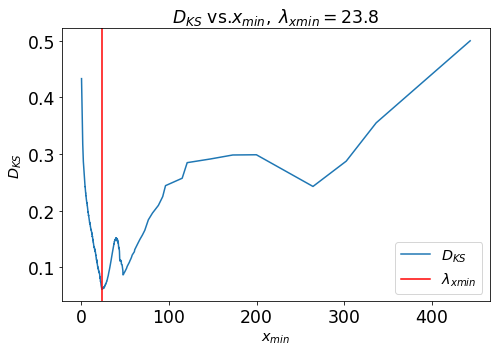

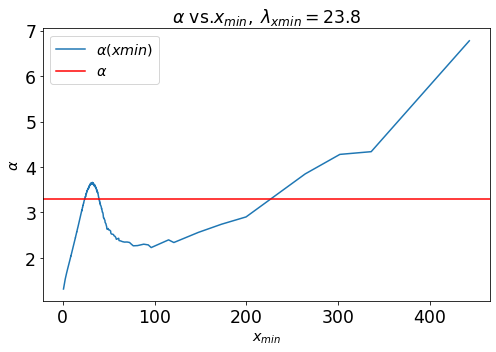

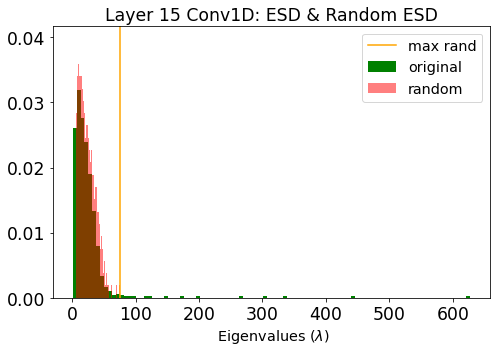

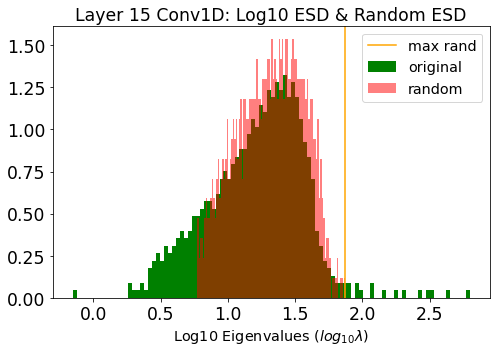

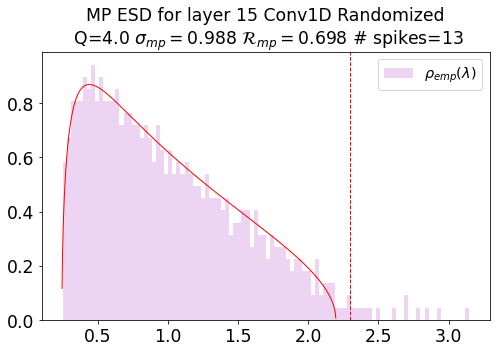

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.16 sigma 0.21 TPL or PL? 1.0914
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.2446 sigma 0.2256 TPL or PL? 1.0944
INFO:weightwatcher:2 fit alpha 3.24 sigma 0.23 TPL or PL? 1.0944
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.3239 sigma 0.2384 TPL or PL? 1.1444
INFO:weightwatcher:3 fit alpha 3.32 sigma 0.24 TPL or PL? 1.1444
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.4478 sigma 0.2609 TPL or PL? 1.0934
INFO:weightwatcher:4 fit alpha 3.45 sigma 0.26 TPL or PL? 1.0934
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.5199 sigma 0.2702 TPL or PL? 1.1419
INFO:weightwatcher:5 fit alpha 3.52 sigma 0.27 TPL or PL? 1.1419
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.6697 sigma 0.2985 TPL or PL? 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 298.5254  alpha 4.12 sigma 0.39
INFO:weightwatcher:checking fit 11 xmax 295.5548  alpha 4.12 sigma 0.39
INFO:weightwatcher:checking fit 12 xmax 278.9062  alpha 4.12 sigma 0.39


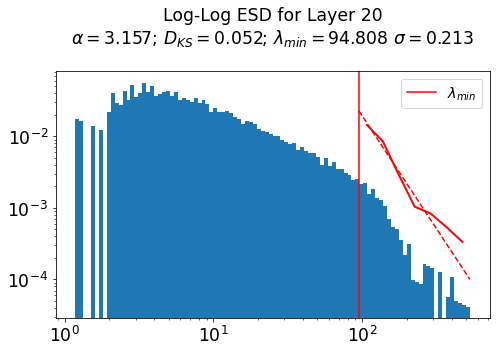

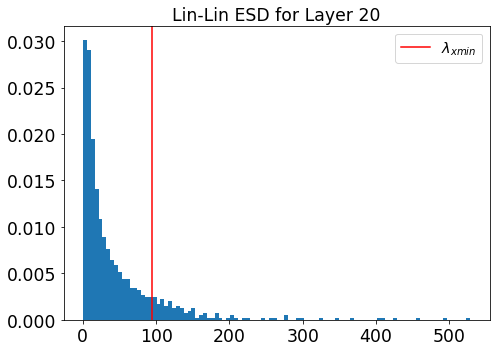

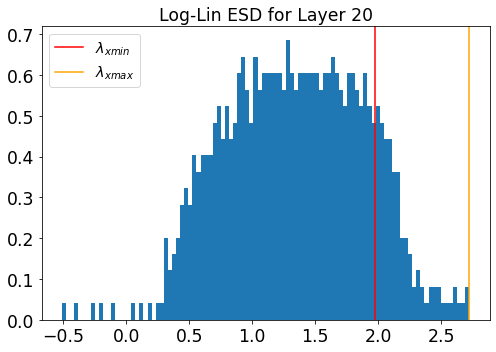

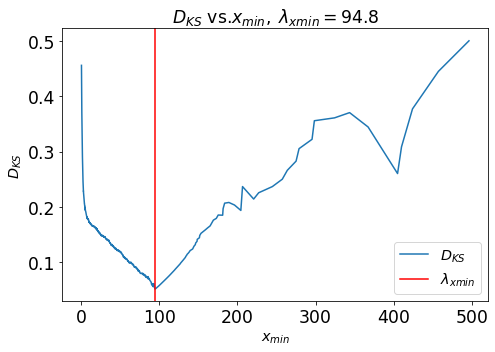

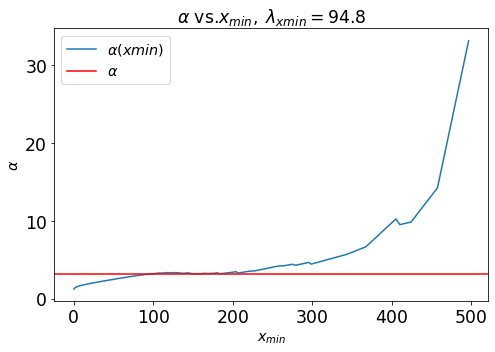

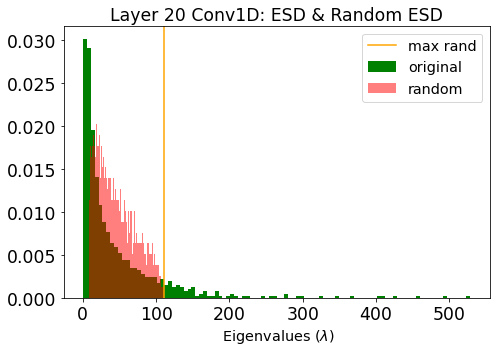

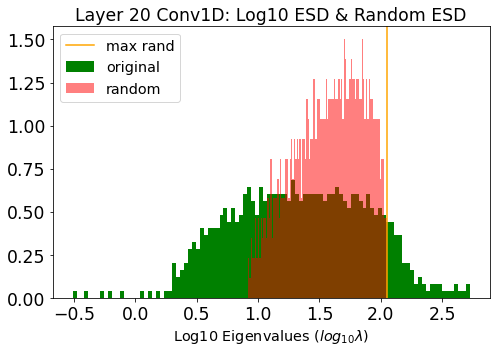

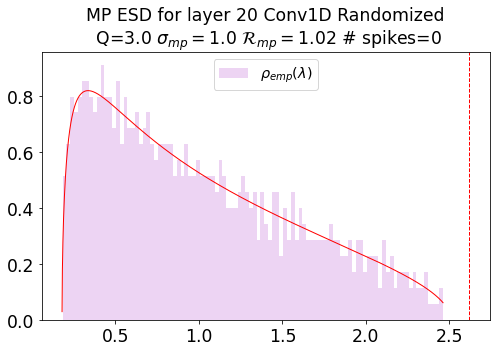

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 2.50 sigma 0.13 TPL or PL? -0.0058
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 2.6118 sigma 0.1419 TPL or PL? 0.0940
INFO:weightwatcher:2 fit alpha 2.61 sigma 0.14 TPL or PL? 0.0940
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 2.7844 sigma 0.1758 TPL or PL? -0.0020
INFO:weightwatcher:3 fit alpha 2.78 sigma 0.18 TPL or PL? -0.0020
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 2.9837 sigma 0.2204 TPL or PL? -0.0006
INFO:weightwatcher:4 fit alpha 2.98 sigma 0.22 TPL or PL? -0.0006
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.3149 sigma 0.3150 TPL or PL? -0.0044
INFO:weightwatcher:5 fit alpha 3.31 sigma 0.32 TPL or PL? -0.0044
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.6863 sigma 0.3961 TPL 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 56.5143  alpha 4.78 sigma 0.62


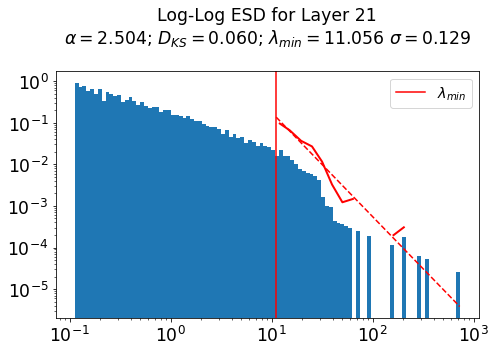

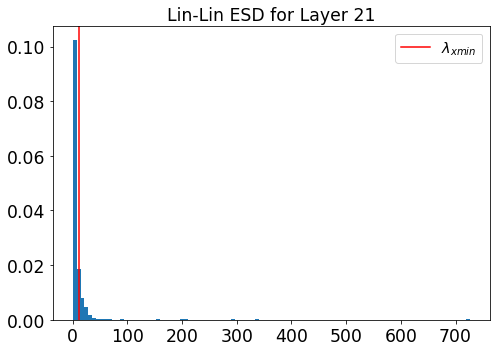

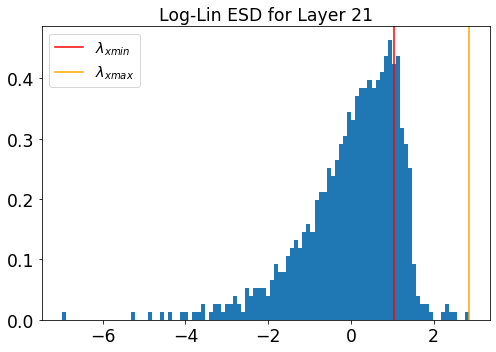

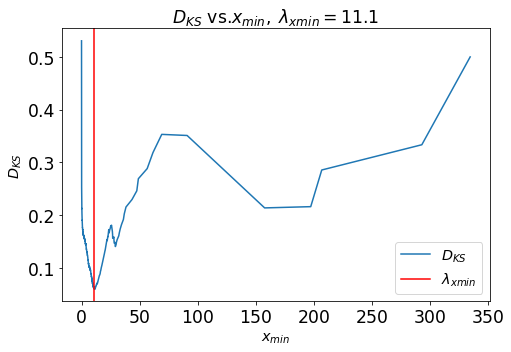

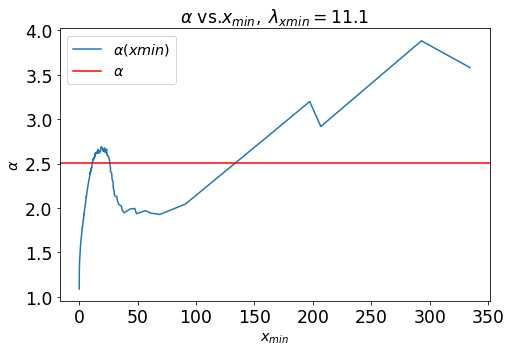

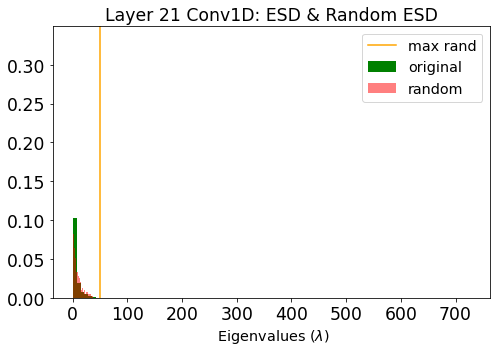

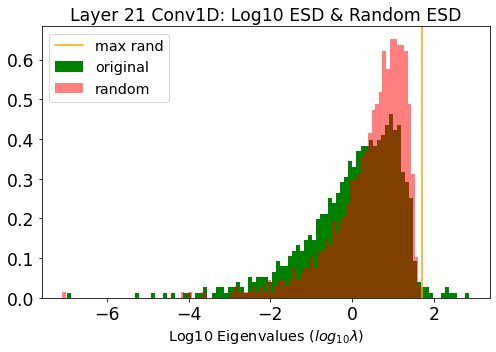

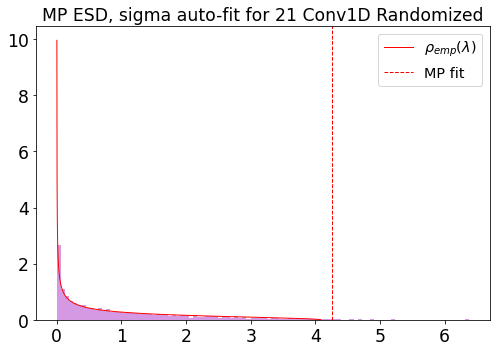

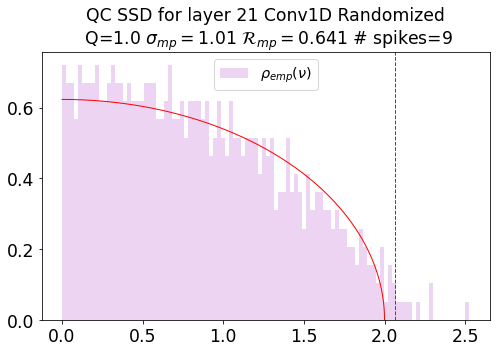

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.44 sigma 0.21 TPL or PL? -0.0002
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.6695 sigma 0.2569 TPL or PL? -0.0008
INFO:weightwatcher:2 fit alpha 3.67 sigma 0.26 TPL or PL? -0.0008
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.8215 sigma 0.2822 TPL or PL? 0.4232
INFO:weightwatcher:3 fit alpha 3.82 sigma 0.28 TPL or PL? 0.4232
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.9585 sigma 0.3136 TPL or PL? 0.5965
INFO:weightwatcher:4 fit alpha 3.96 sigma 0.31 TPL or PL? 0.5965
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 4.0753 sigma 0.3336 TPL or PL? 0.6661
INFO:weightwatcher:5 fit alpha 4.08 sigma 0.33 TPL or PL? 0.6661
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 4.2177 sigma 0.3553 TPL or P

checking alpha


INFO:weightwatcher:checking fit 10 xmax 218.8866  alpha 4.54 sigma 0.39
INFO:weightwatcher:checking fit 11 xmax 208.3675  alpha 4.54 sigma 0.39
INFO:weightwatcher:checking fit 12 xmax 205.0727  alpha 4.54 sigma 0.39


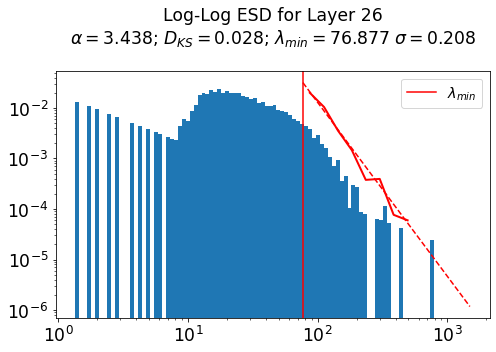

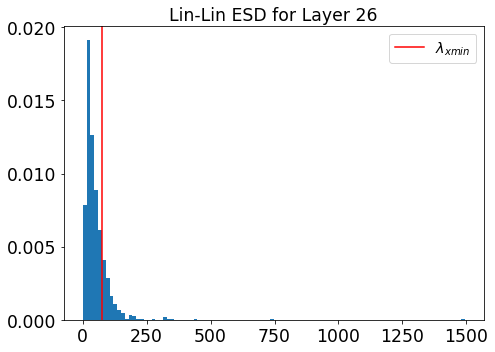

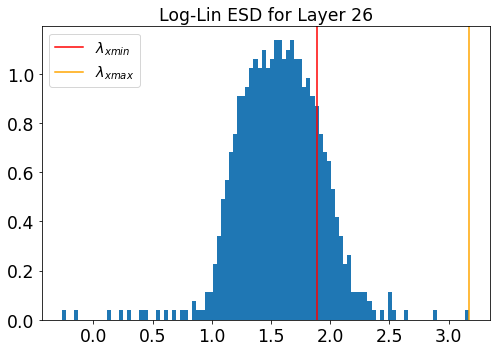

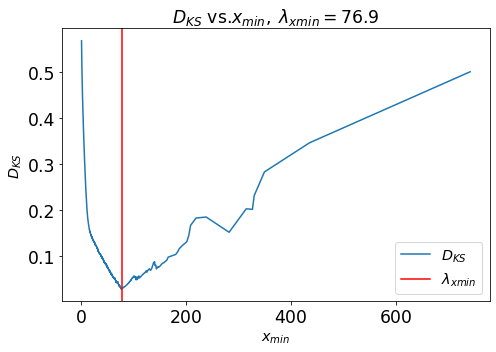

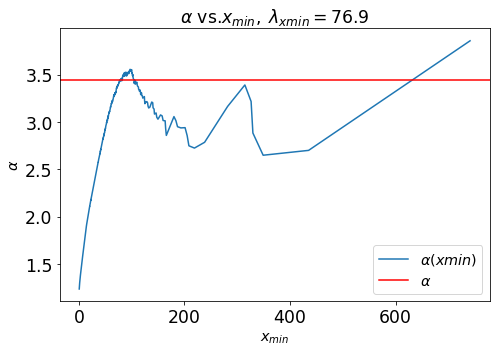

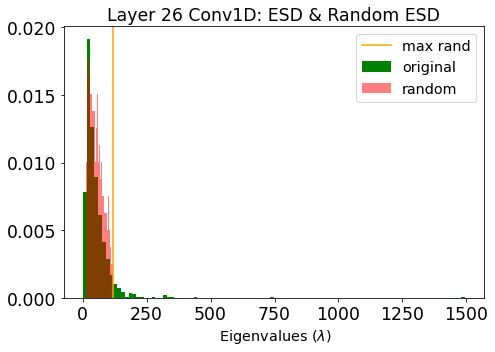

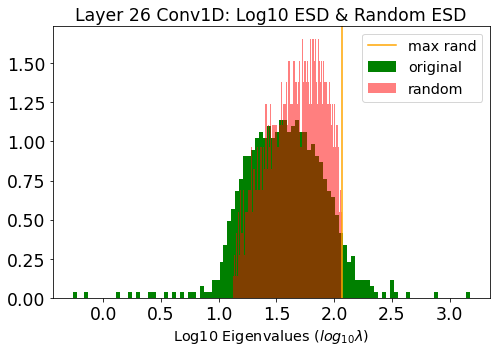

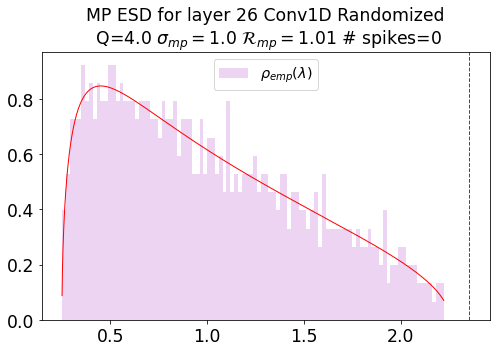

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.47 sigma 0.15 TPL or PL? -0.6710
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.6867 sigma 0.1795 TPL or PL? -0.0080
INFO:weightwatcher:2 fit alpha 3.69 sigma 0.18 TPL or PL? -0.0080
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.8998 sigma 0.2082 TPL or PL? -0.0010
INFO:weightwatcher:3 fit alpha 3.90 sigma 0.21 TPL or PL? -0.0010
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 4.1514 sigma 0.2476 TPL or PL? -0.0004
INFO:weightwatcher:4 fit alpha 4.15 sigma 0.25 TPL or PL? -0.0004
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 4.3612 sigma 0.2882 TPL or PL? -0.0023
INFO:weightwatcher:5 fit alpha 4.36 sigma 0.29 TPL or PL? -0.0023
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 4.5761 sigma 0.3306 TP

checking alpha


INFO:weightwatcher:checking fit 10 xmax 82.2244  alpha 5.19 sigma 0.43
INFO:weightwatcher:checking fit 11 xmax 75.5921  alpha 5.19 sigma 0.43
INFO:weightwatcher:checking fit 12 xmax 68.6009  alpha 5.19 sigma 0.43


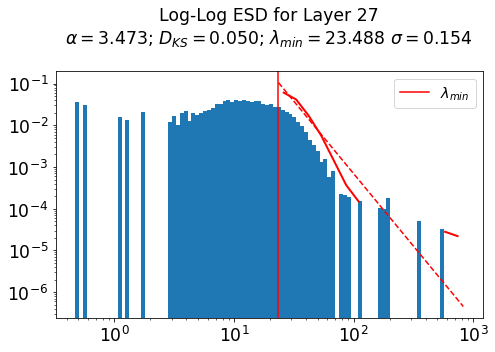

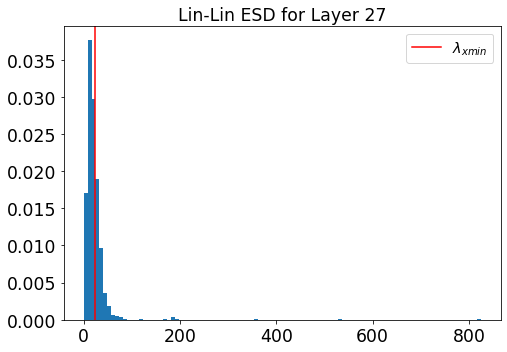

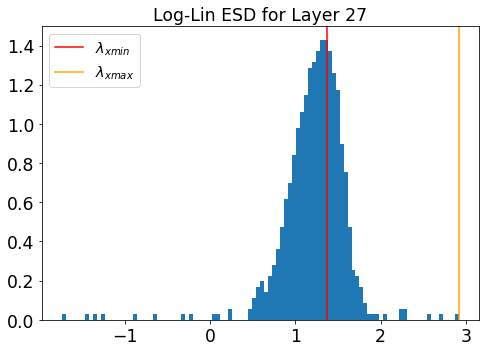

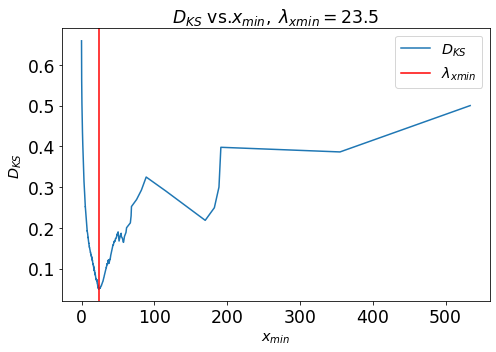

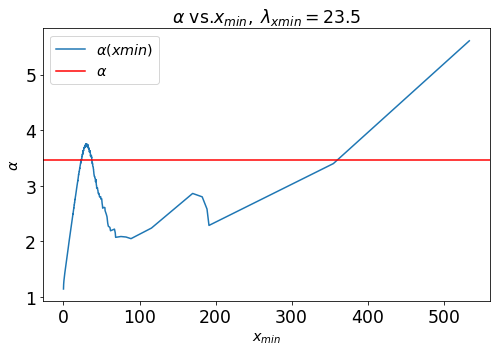

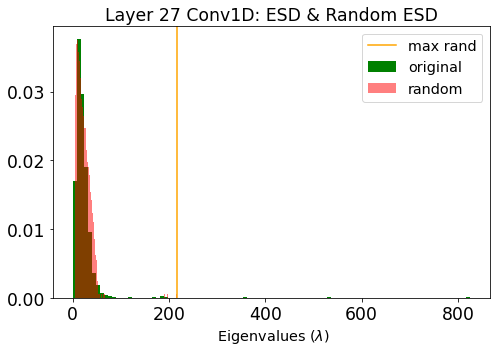

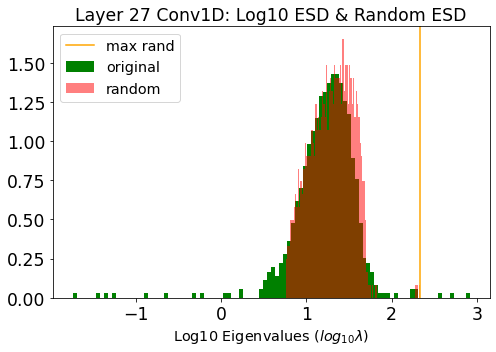

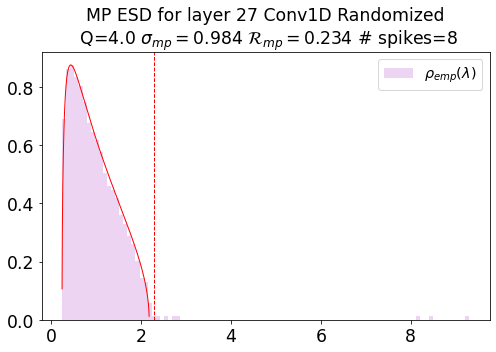

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.50 sigma 0.26 TPL or PL? 0.5326
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.6181 sigma 0.2823 TPL or PL? 0.6097
INFO:weightwatcher:2 fit alpha 3.62 sigma 0.28 TPL or PL? 0.6097
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.7681 sigma 0.3114 TPL or PL? 0.6905
INFO:weightwatcher:3 fit alpha 3.77 sigma 0.31 TPL or PL? 0.6905
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.9292 sigma 0.3338 TPL or PL? 0.7750
INFO:weightwatcher:4 fit alpha 3.93 sigma 0.33 TPL or PL? 0.7750
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 4.0861 sigma 0.3587 TPL or PL? 0.8321
INFO:weightwatcher:5 fit alpha 4.09 sigma 0.36 TPL or PL? 0.8321
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 4.2629 sigma 0.3900 TPL or PL? 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 307.8323  alpha 5.31 sigma 0.68
INFO:weightwatcher:checking fit 11 xmax 305.8240  alpha 5.31 sigma 0.68


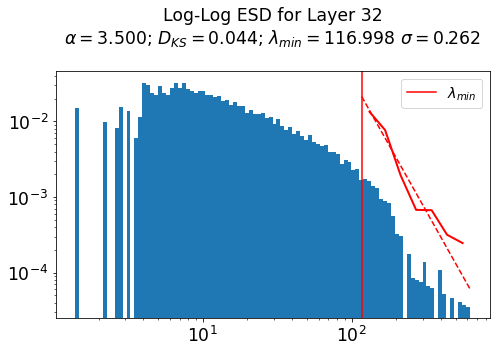

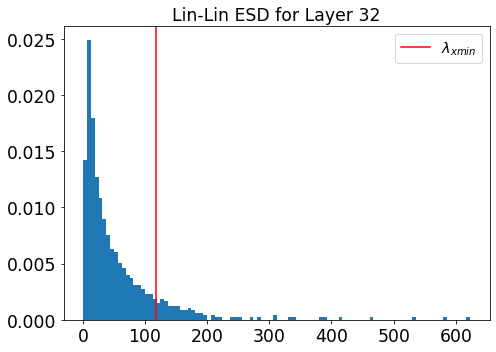

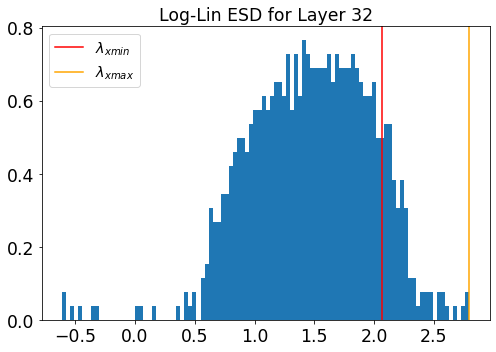

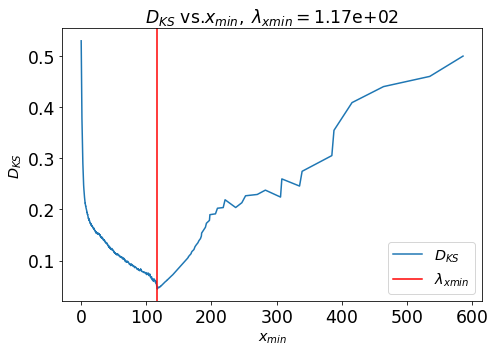

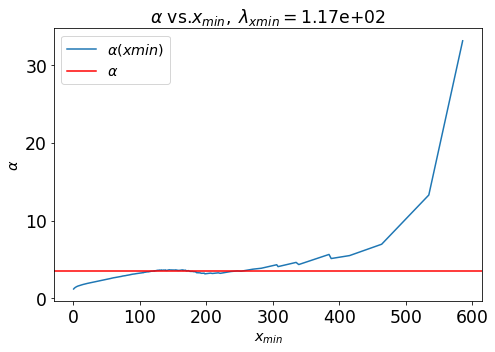

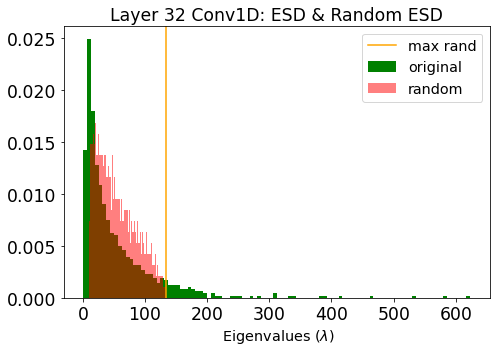

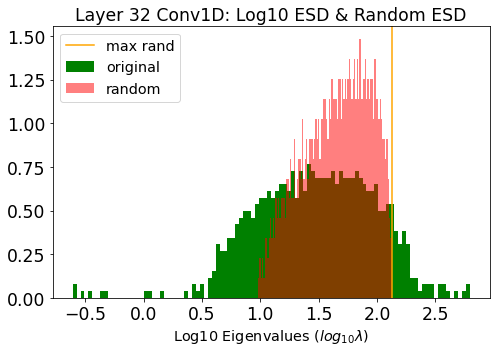

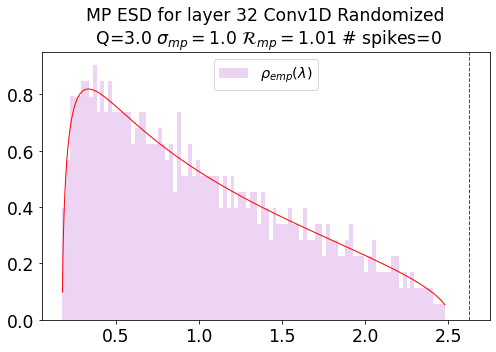

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.58 sigma 0.29 TPL or PL? -0.0006
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 4.0352 sigma 0.3918 TPL or PL? -0.0006
INFO:weightwatcher:2 fit alpha 4.04 sigma 0.39 TPL or PL? -0.0006
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 4.2948 sigma 0.4443 TPL or PL? 0.0114
INFO:weightwatcher:3 fit alpha 4.29 sigma 0.44 TPL or PL? 0.0114
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 4.6739 sigma 0.5248 TPL or PL? 0.0883
INFO:weightwatcher:4 fit alpha 4.67 sigma 0.52 TPL or PL? 0.0883
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 5.0253 sigma 0.5935 TPL or PL? 0.3691
INFO:weightwatcher:5 fit alpha 5.03 sigma 0.59 TPL or PL? 0.3691
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 5.2805 sigma 0.6244 TPL or P

checking alpha


INFO:weightwatcher:checking fit 10 xmax 28.8056  alpha 5.99 sigma 0.75
INFO:weightwatcher:checking fit 11 xmax 27.9941  alpha 5.99 sigma 0.75


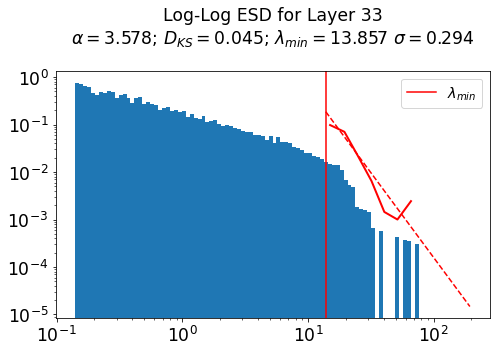

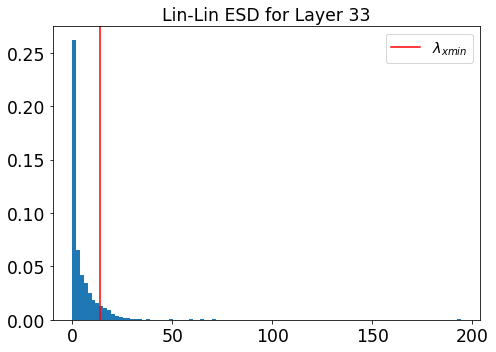

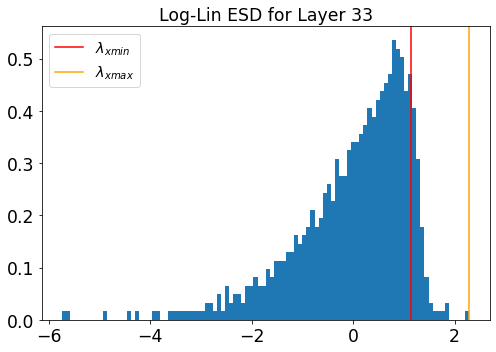

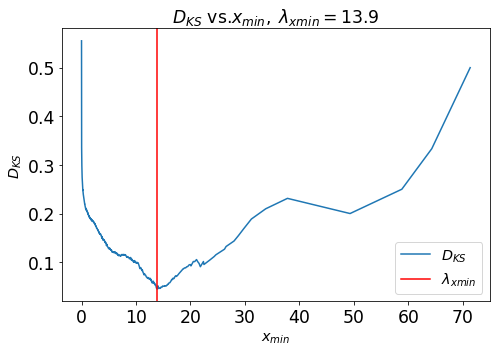

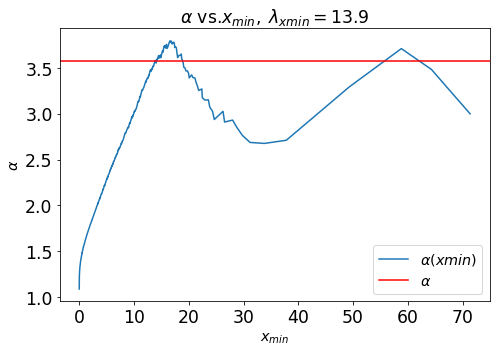

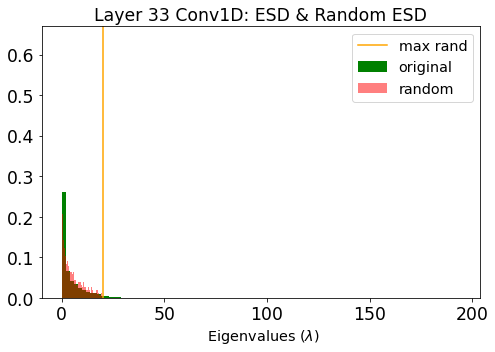

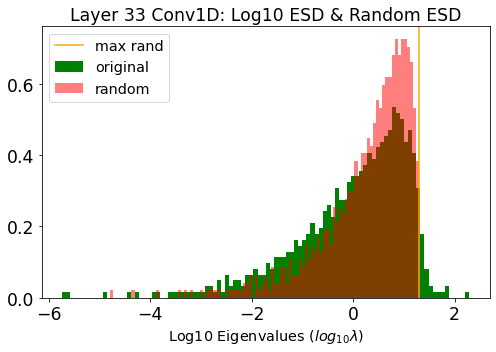

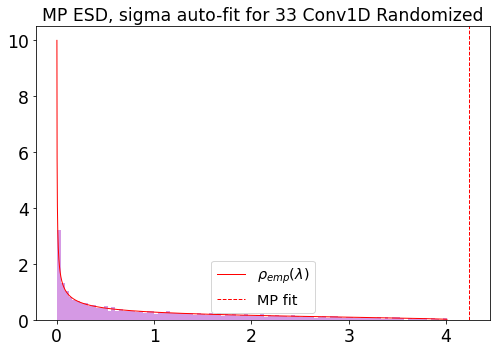

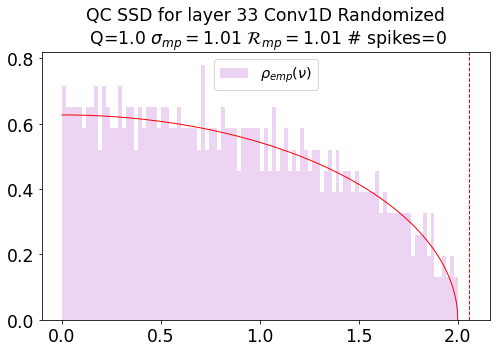

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.19 sigma 0.16 TPL or PL? -0.0014
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.3499 sigma 0.1829 TPL or PL? -0.0167
INFO:weightwatcher:2 fit alpha 3.35 sigma 0.18 TPL or PL? -0.0167
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.4654 sigma 0.2047 TPL or PL? 0.5198
INFO:weightwatcher:3 fit alpha 3.47 sigma 0.20 TPL or PL? 0.5198
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.5530 sigma 0.2181 TPL or PL? 0.6442
INFO:weightwatcher:4 fit alpha 3.55 sigma 0.22 TPL or PL? 0.6442
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.6328 sigma 0.2336 TPL or PL? 0.7787
INFO:weightwatcher:5 fit alpha 3.63 sigma 0.23 TPL or PL? 0.7787
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.7021 sigma 0.2407 TPL or P

checking alpha


INFO:weightwatcher:checking fit 10 xmax 279.1031  alpha 3.97 sigma 0.27
INFO:weightwatcher:checking fit 11 xmax 269.0929  alpha 3.97 sigma 0.27
INFO:weightwatcher:checking fit 12 xmax 264.4781  alpha 3.97 sigma 0.27


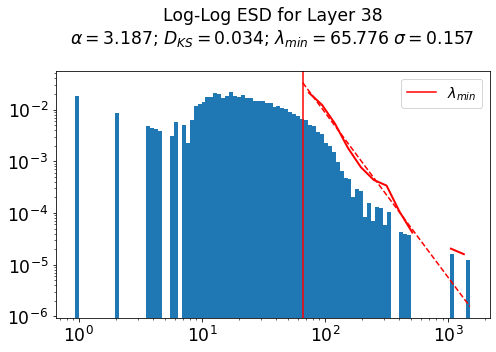

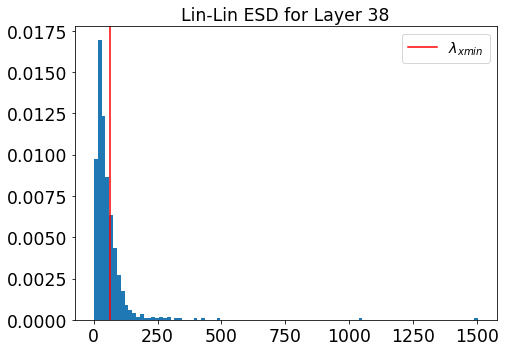

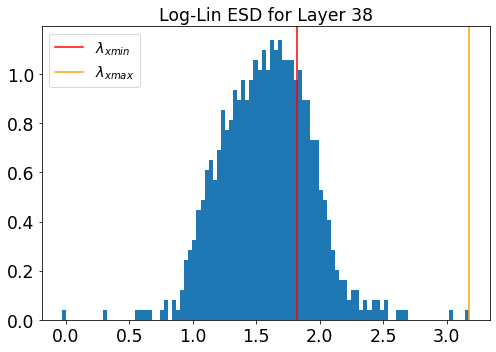

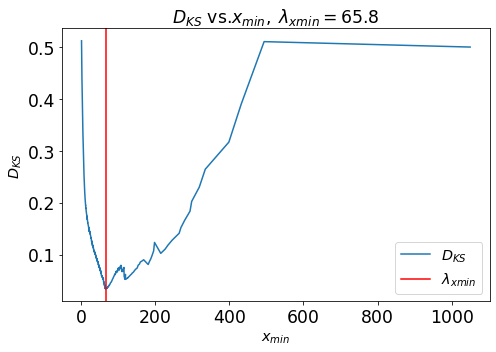

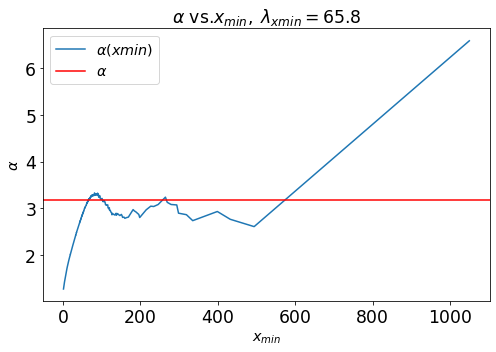

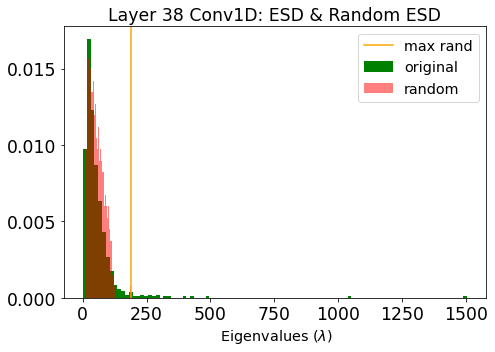

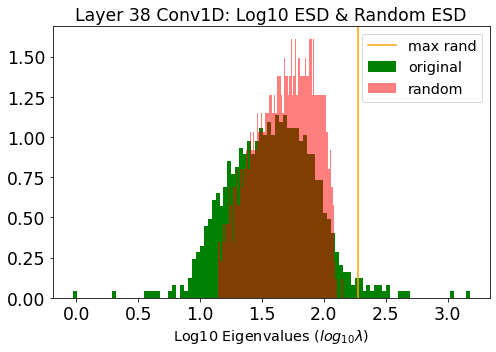

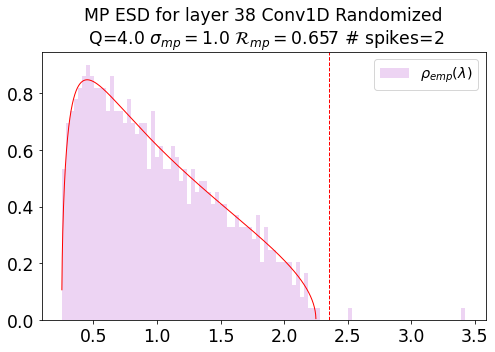

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.32 sigma 0.19 TPL or PL? -0.0010
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.3949 sigma 0.1876 TPL or PL? 1.1685
INFO:weightwatcher:2 fit alpha 3.39 sigma 0.19 TPL or PL? 1.1685
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.4486 sigma 0.1924 TPL or PL? 1.5738
INFO:weightwatcher:3 fit alpha 3.45 sigma 0.19 TPL or PL? 1.5738
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.4656 sigma 0.1908 TPL or PL? 1.8284
INFO:weightwatcher:4 fit alpha 3.47 sigma 0.19 TPL or PL? 1.8284
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.5052 sigma 0.1944 TPL or PL? 1.9358
INFO:weightwatcher:5 fit alpha 3.51 sigma 0.19 TPL or PL? 1.9358
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.5431 sigma 0.1980 TPL or PL?

checking alpha


INFO:weightwatcher:checking fit 10 xmax 110.8673  alpha 3.68 sigma 0.21
INFO:weightwatcher:checking fit 11 xmax 102.4227  alpha 3.68 sigma 0.21
INFO:weightwatcher:checking fit 12 xmax 100.1881  alpha 3.68 sigma 0.21


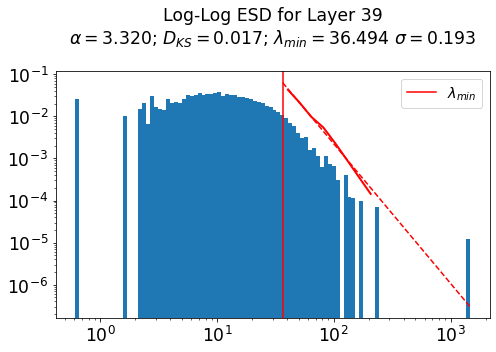

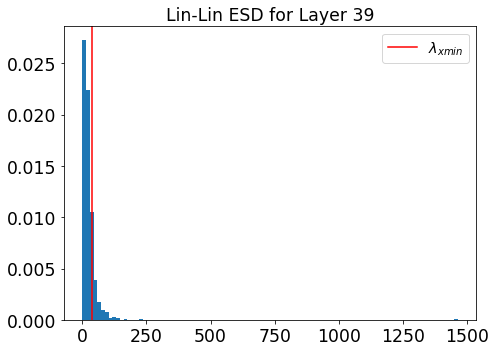

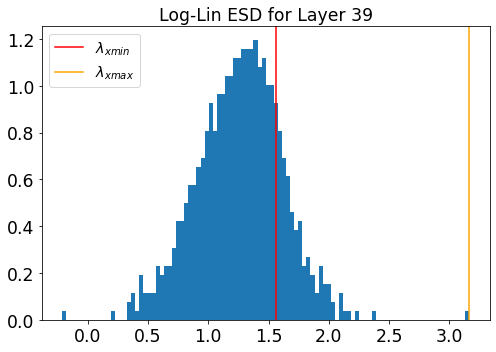

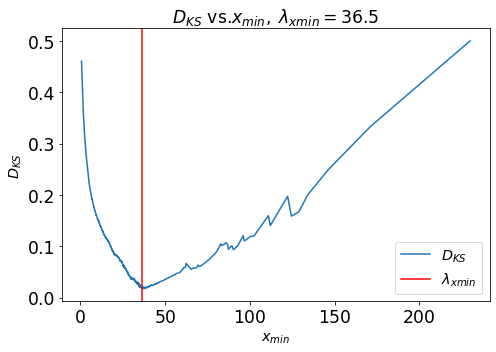

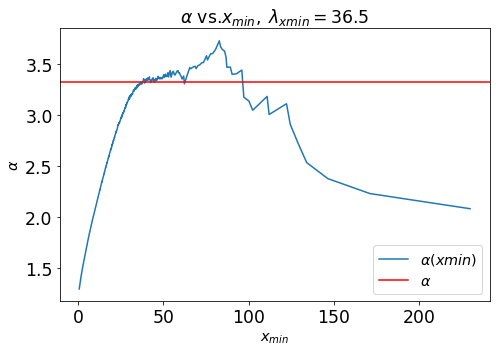

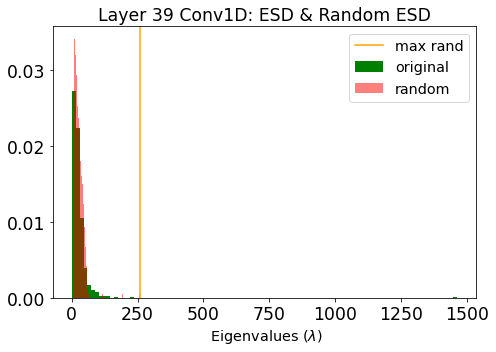

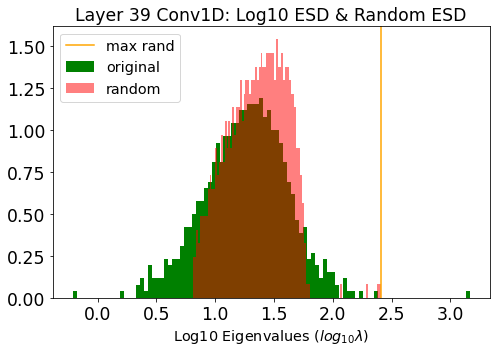

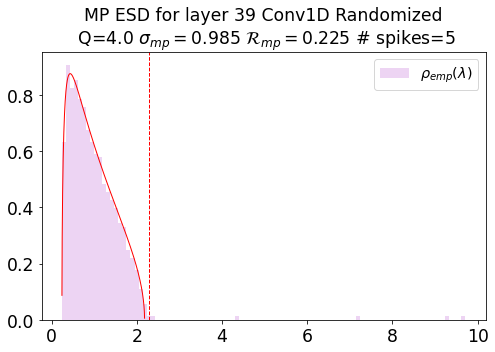

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.18 sigma 0.19 TPL or PL? 1.3529
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.2288 sigma 0.1947 TPL or PL? 1.5416
INFO:weightwatcher:2 fit alpha 3.23 sigma 0.19 TPL or PL? 1.5416
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.2758 sigma 0.1996 TPL or PL? 1.6680
INFO:weightwatcher:3 fit alpha 3.28 sigma 0.20 TPL or PL? 1.6680
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.3322 sigma 0.2061 TPL or PL? 1.7058
INFO:weightwatcher:4 fit alpha 3.33 sigma 0.21 TPL or PL? 1.7058
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.3851 sigma 0.2125 TPL or PL? 1.7549
INFO:weightwatcher:5 fit alpha 3.39 sigma 0.21 TPL or PL? 1.7549
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.4625 sigma 0.2220 TPL or PL? 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 251.9739  alpha 3.57 sigma 0.23
INFO:weightwatcher:checking fit 11 xmax 235.0652  alpha 3.57 sigma 0.23
INFO:weightwatcher:checking fit 12 xmax 231.7698  alpha 3.57 sigma 0.23


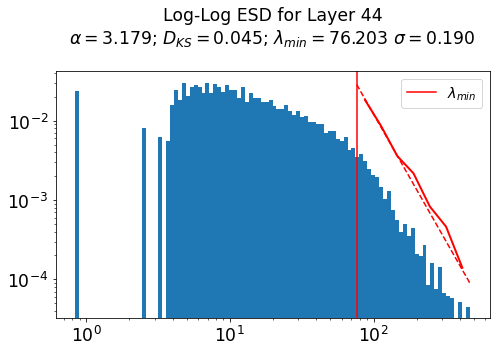

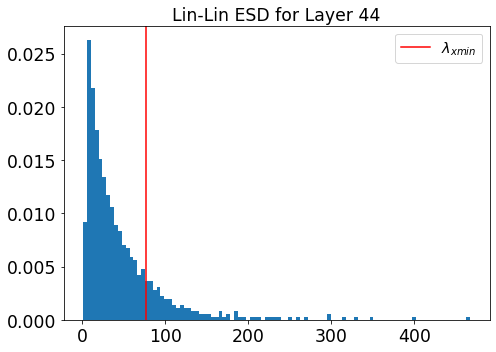

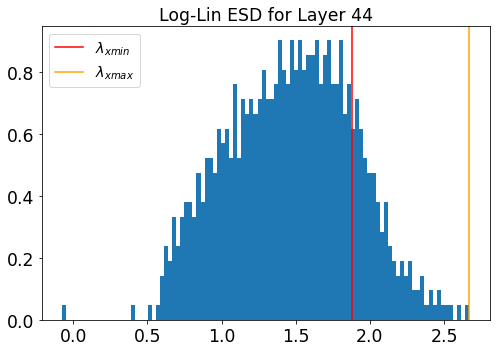

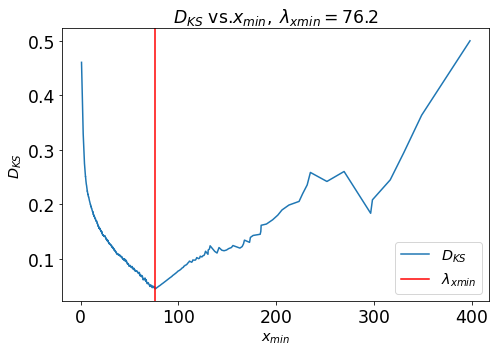

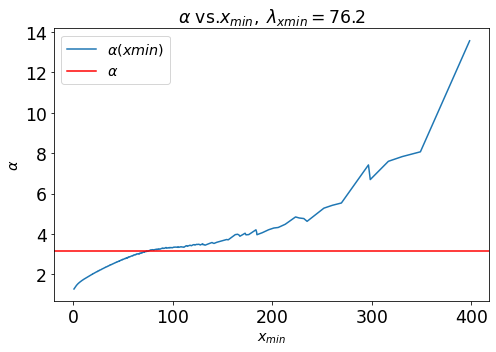

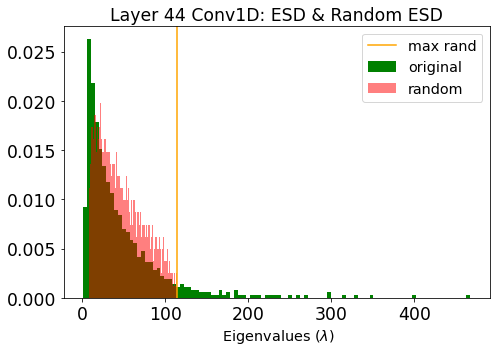

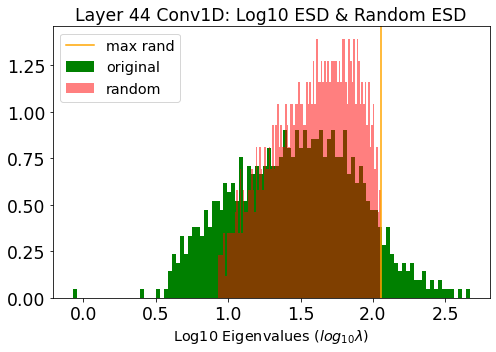

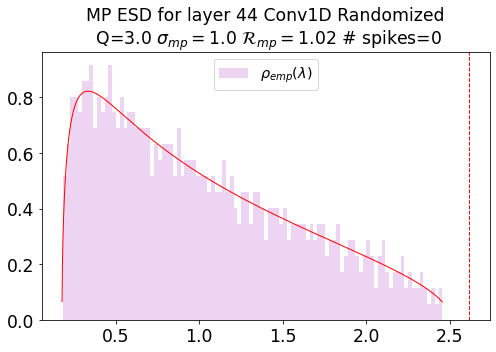

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 4.69 sigma 0.66 TPL or PL? -0.0009
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.8569 sigma 0.3321 TPL or PL? 3.2126
INFO:weightwatcher:2 fit alpha 3.86 sigma 0.33 TPL or PL? 3.2126
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.9332 sigma 0.3433 TPL or PL? 3.4099
INFO:weightwatcher:3 fit alpha 3.93 sigma 0.34 TPL or PL? 3.4099
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 4.0091 sigma 0.3546 TPL or PL? 3.6474
INFO:weightwatcher:4 fit alpha 4.01 sigma 0.35 TPL or PL? 3.6474
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 4.0871 sigma 0.3664 TPL or PL? 3.8798
INFO:weightwatcher:5 fit alpha 4.09 sigma 0.37 TPL or PL? 3.8798
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 4.2014 sigma 0.3854 TPL or PL?

checking alpha


INFO:weightwatcher:checking fit 10 xmax 31.6889  alpha 4.47 sigma 0.43
INFO:weightwatcher:checking fit 11 xmax 30.8411  alpha 4.47 sigma 0.43
INFO:weightwatcher:checking fit 12 xmax 30.2340  alpha 4.47 sigma 0.43


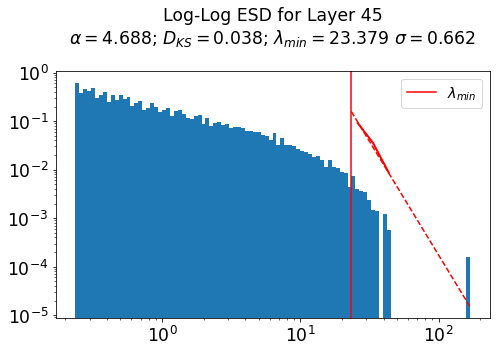

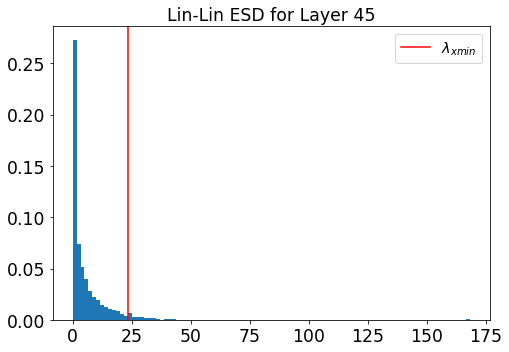

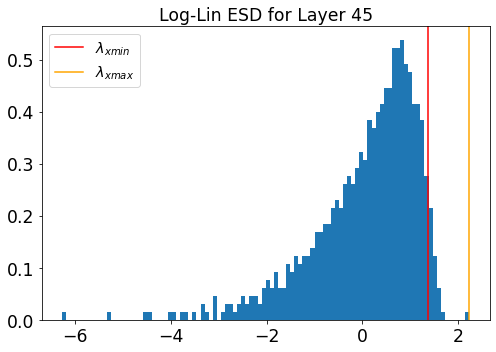

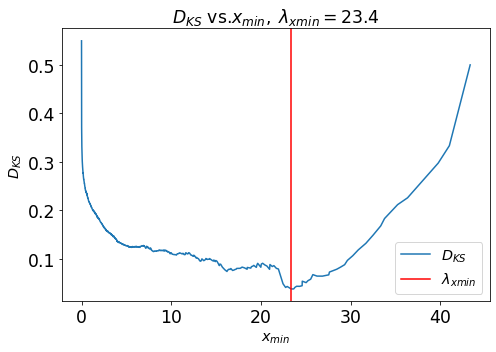

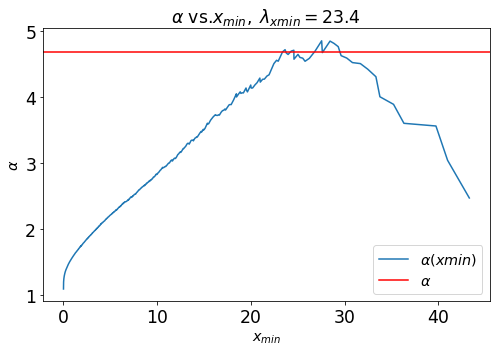

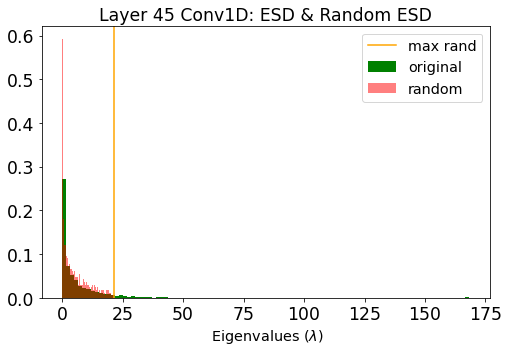

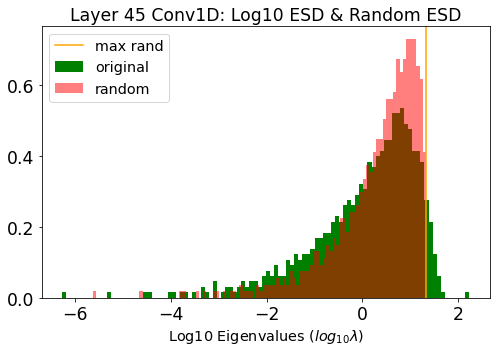

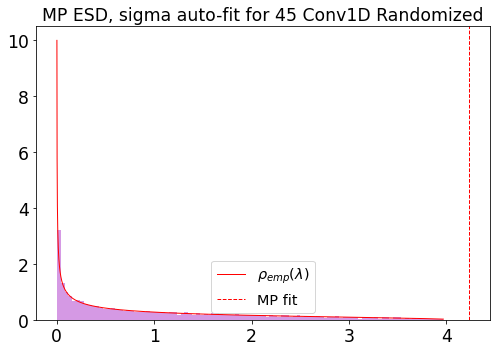

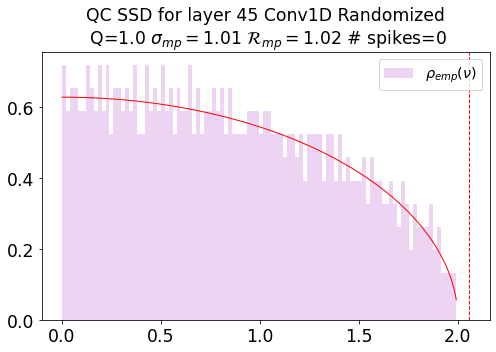

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.64 sigma 0.28 TPL or PL? -0.0004
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.7490 sigma 0.2763 TPL or PL? 1.1044
INFO:weightwatcher:2 fit alpha 3.75 sigma 0.28 TPL or PL? 1.1044
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.8250 sigma 0.2854 TPL or PL? 1.1867
INFO:weightwatcher:3 fit alpha 3.82 sigma 0.29 TPL or PL? 1.1867
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.9014 sigma 0.2946 TPL or PL? 1.2625
INFO:weightwatcher:4 fit alpha 3.90 sigma 0.29 TPL or PL? 1.2625
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.9820 sigma 0.3043 TPL or PL? 1.3772
INFO:weightwatcher:5 fit alpha 3.98 sigma 0.30 TPL or PL? 1.3772
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 4.0620 sigma 0.3141 TPL or PL?

checking alpha


INFO:weightwatcher:checking fit 10 xmax 229.8812  alpha 3.77 sigma 0.22
INFO:weightwatcher:checking fit 11 xmax 217.2772  alpha 3.77 sigma 0.22
INFO:weightwatcher:checking fit 12 xmax 215.6896  alpha 3.77 sigma 0.22


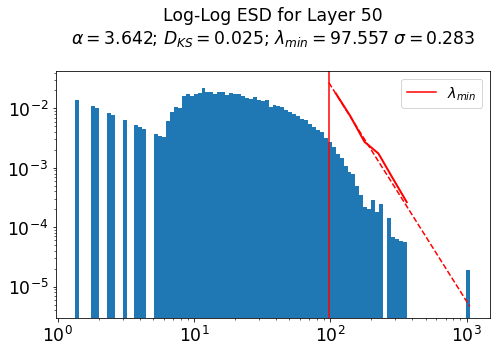

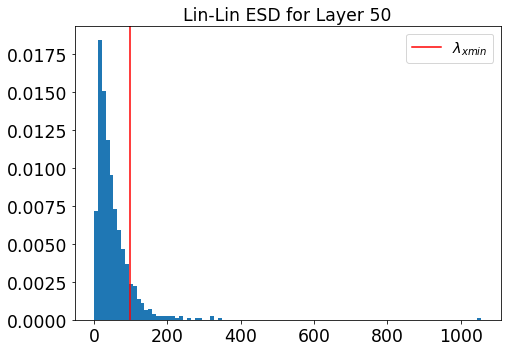

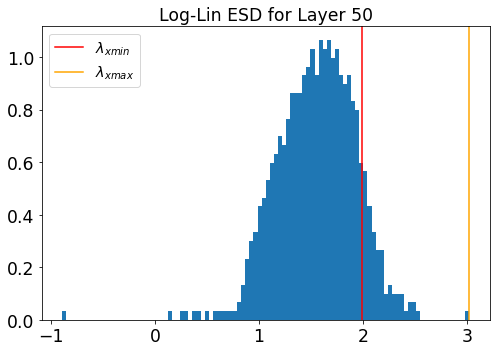

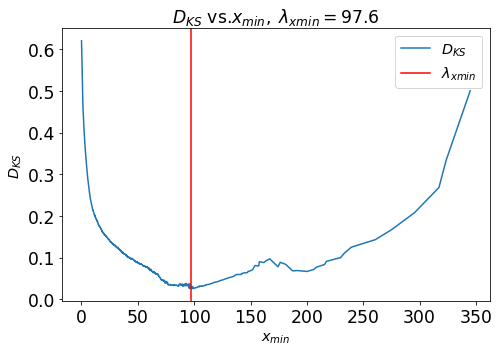

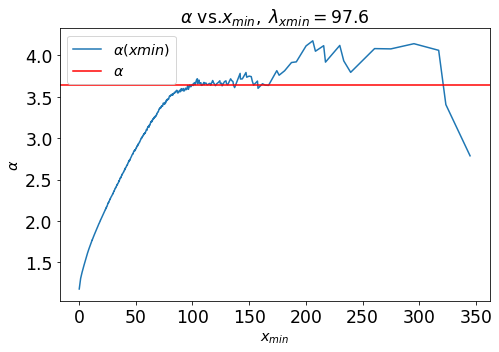

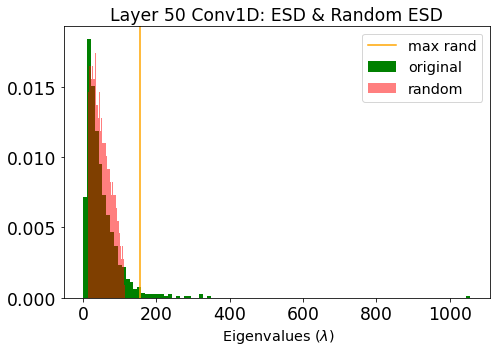

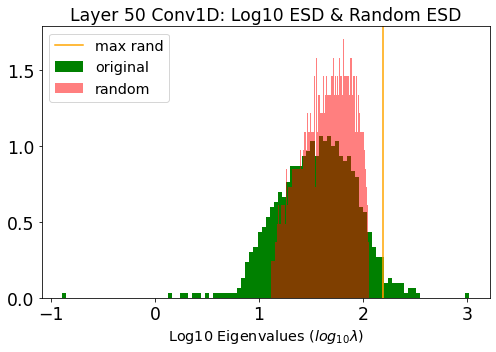

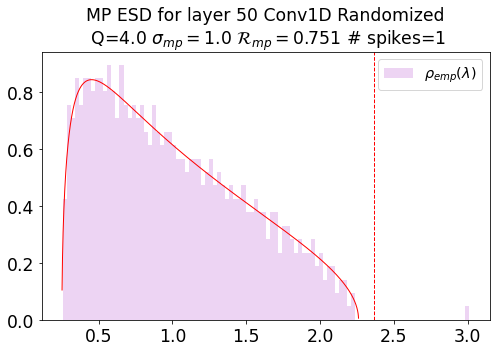

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.52 sigma 0.30 TPL or PL? -0.0018
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.2212 sigma 0.1679 TPL or PL? 2.0747
INFO:weightwatcher:2 fit alpha 3.22 sigma 0.17 TPL or PL? 2.0747
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.2015 sigma 0.1632 TPL or PL? 2.5560
INFO:weightwatcher:3 fit alpha 3.20 sigma 0.16 TPL or PL? 2.5560
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.1555 sigma 0.1517 TPL or PL? 2.9580
INFO:weightwatcher:4 fit alpha 3.16 sigma 0.15 TPL or PL? 2.9580
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.1808 sigma 0.1538 TPL or PL? 3.2340
INFO:weightwatcher:5 fit alpha 3.18 sigma 0.15 TPL or PL? 3.2340
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.2054 sigma 0.1559 TPL or PL?

checking alpha


INFO:weightwatcher:checking fit 10 xmax 105.5599  alpha 3.28 sigma 0.16
INFO:weightwatcher:checking fit 11 xmax 102.5348  alpha 3.28 sigma 0.16
INFO:weightwatcher:checking fit 12 xmax 101.0054  alpha 3.28 sigma 0.16


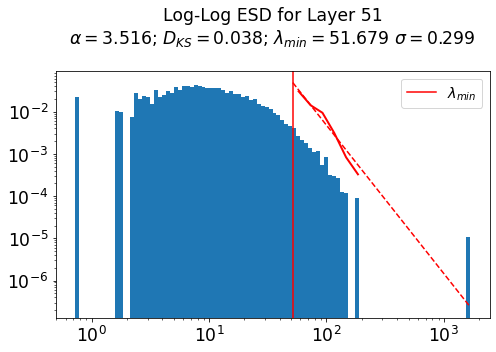

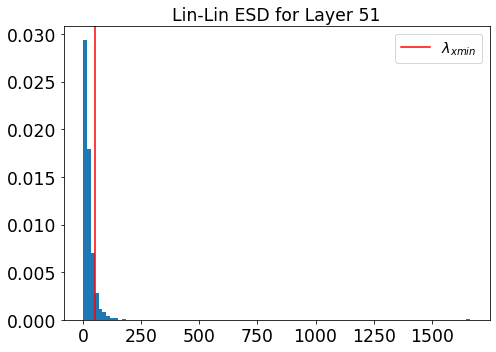

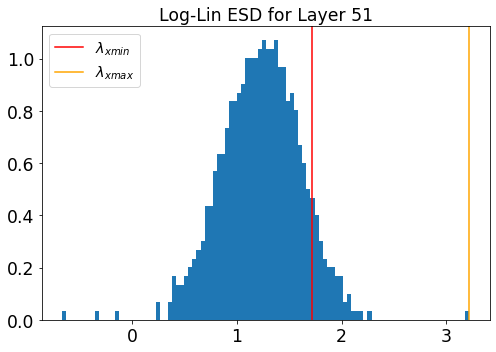

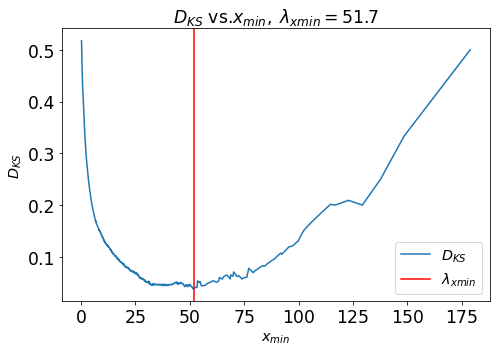

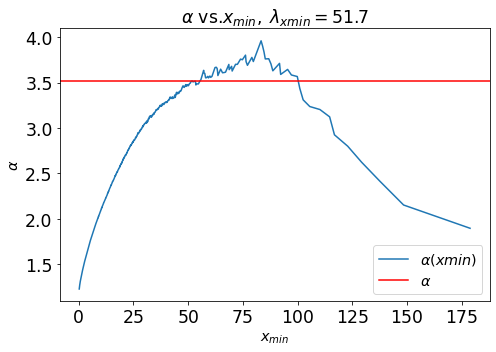

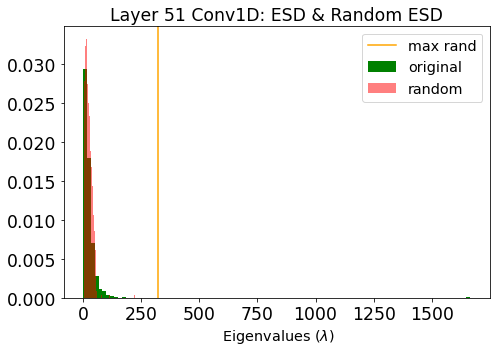

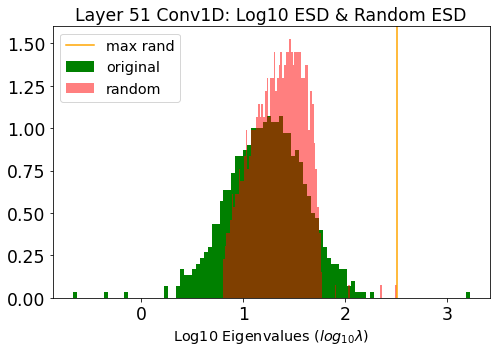

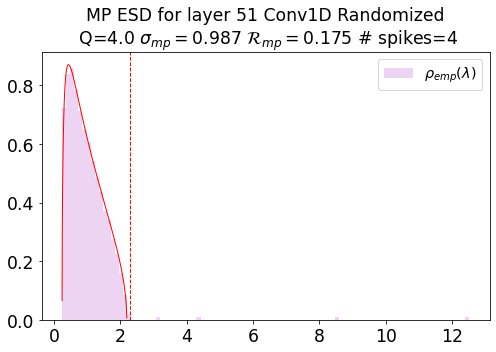

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 2.93 sigma 0.16 TPL or PL? 2.1143
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 2.9630 sigma 0.1625 TPL or PL? 2.2134
INFO:weightwatcher:2 fit alpha 2.96 sigma 0.16 TPL or PL? 2.2134
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 2.9944 sigma 0.1656 TPL or PL? 2.2902
INFO:weightwatcher:3 fit alpha 2.99 sigma 0.17 TPL or PL? 2.2902
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.0248 sigma 0.1687 TPL or PL? 2.3871
INFO:weightwatcher:4 fit alpha 3.02 sigma 0.17 TPL or PL? 2.3871
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.0673 sigma 0.1753 TPL or PL? 2.6009
INFO:weightwatcher:5 fit alpha 3.07 sigma 0.18 TPL or PL? 2.6009
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.0987 sigma 0.1787 TPL or PL? 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 289.1710  alpha 3.25 sigma 0.20
INFO:weightwatcher:checking fit 11 xmax 278.5625  alpha 3.25 sigma 0.20
INFO:weightwatcher:checking fit 12 xmax 261.9673  alpha 3.25 sigma 0.20


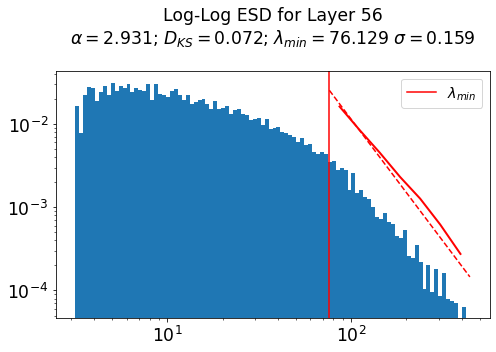

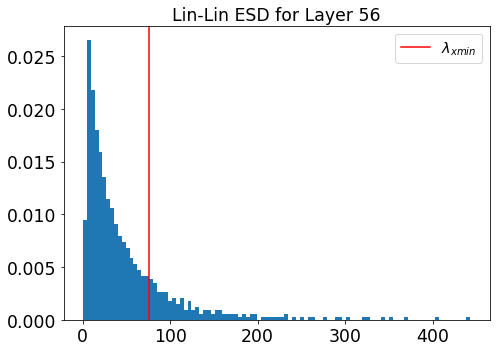

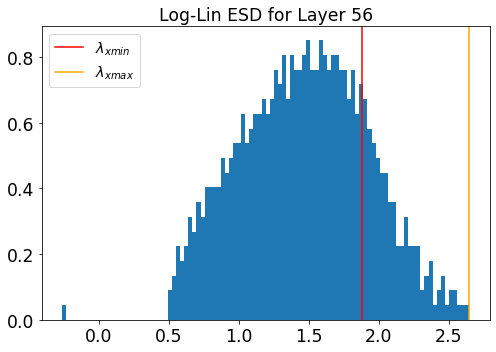

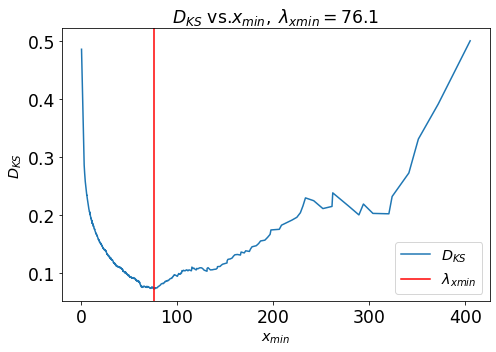

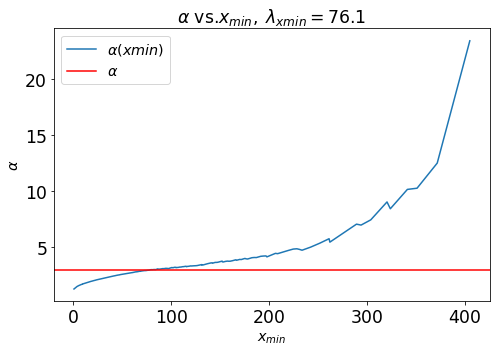

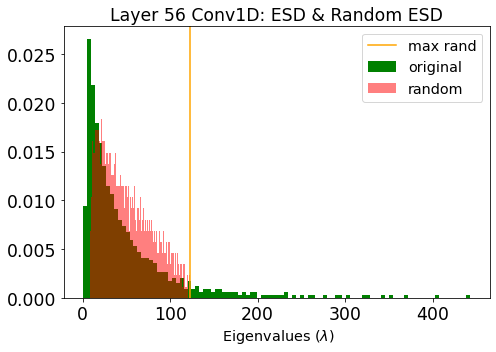

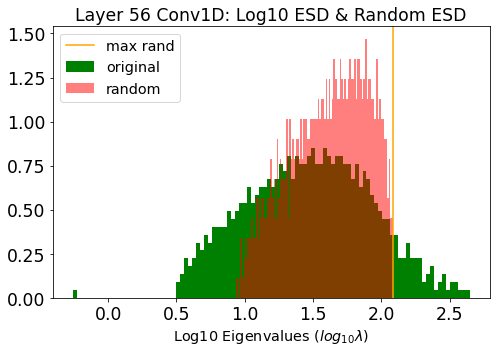

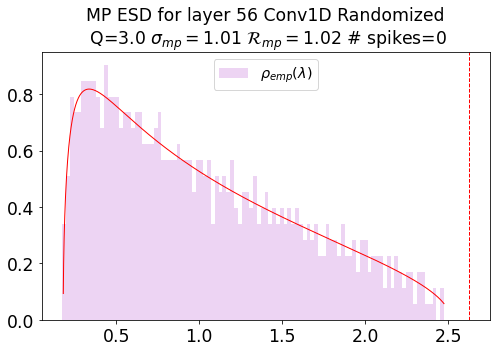

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 4.69 sigma 0.71 TPL or PL? -0.0009
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 7.3545 sigma 1.4978 TPL or PL? 0.3320
INFO:weightwatcher:2 fit alpha 7.35 sigma 1.50 TPL or PL? 0.3320
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.0413 sigma 0.1826 TPL or PL? 4.7061
INFO:weightwatcher:3 fit alpha 3.04 sigma 0.18 TPL or PL? 4.7061
INFO:weightwatcher:stopping at 3 3.04 << 7.35 


checking alpha


INFO:weightwatcher:checking fit 4 xmax 46.7302  alpha 3.04 sigma 0.18
INFO:weightwatcher:checking fit 5 xmax 45.3340  alpha 3.04 sigma 0.18
INFO:weightwatcher:checking fit 6 xmax 43.9521  alpha 3.04 sigma 0.18


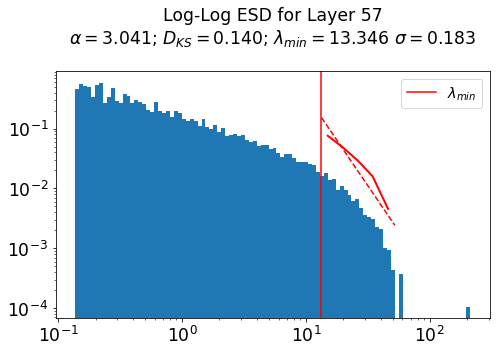

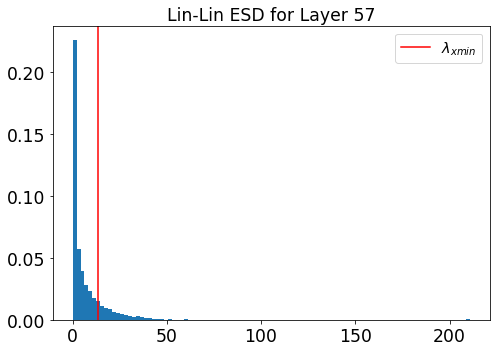

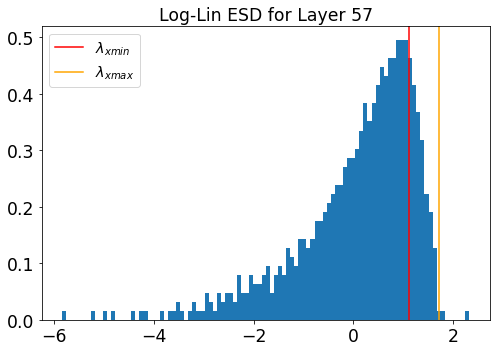

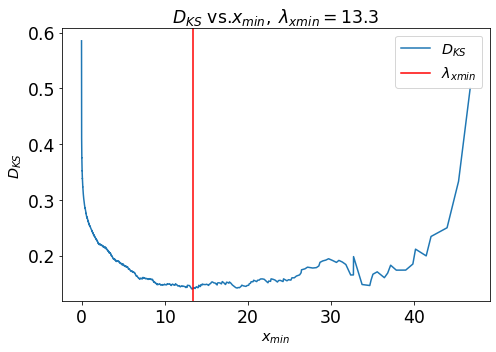

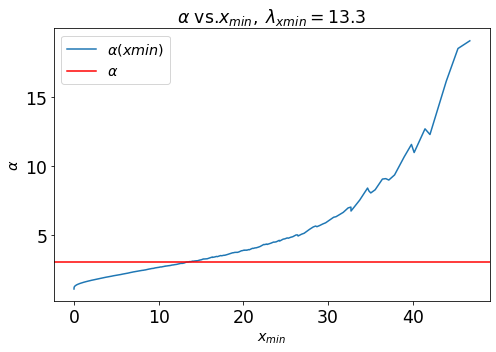

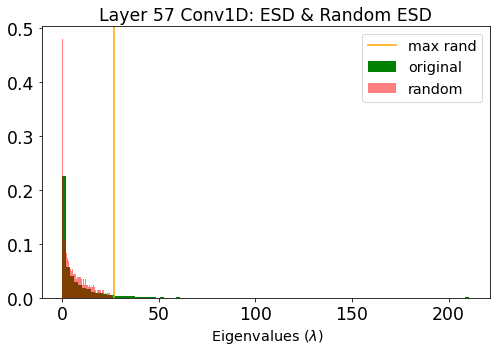

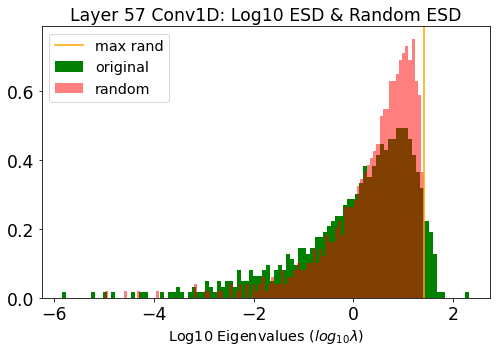

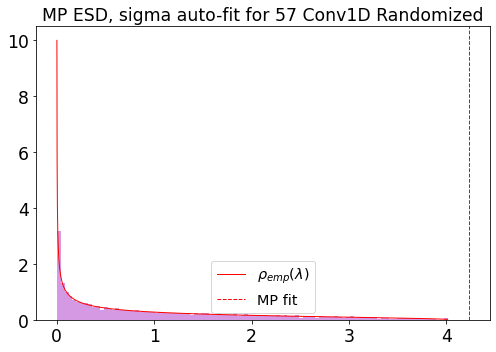

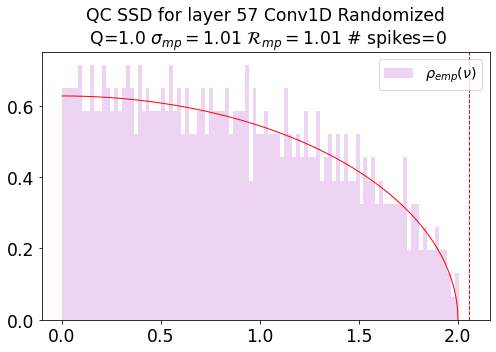

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.45 sigma 0.26 TPL or PL? 0.2110
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.5169 sigma 0.2492 TPL or PL? 1.2462
INFO:weightwatcher:2 fit alpha 3.52 sigma 0.25 TPL or PL? 1.2462
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.5860 sigma 0.2573 TPL or PL? 1.3678
INFO:weightwatcher:3 fit alpha 3.59 sigma 0.26 TPL or PL? 1.3678
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.6574 sigma 0.2657 TPL or PL? 1.5433
INFO:weightwatcher:4 fit alpha 3.66 sigma 0.27 TPL or PL? 1.5433
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.7250 sigma 0.2739 TPL or PL? 1.8023
INFO:weightwatcher:5 fit alpha 3.72 sigma 0.27 TPL or PL? 1.8023
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.4185 sigma 0.1962 TPL or PL? 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 243.2472  alpha 3.53 sigma 0.21
INFO:weightwatcher:checking fit 11 xmax 241.9582  alpha 3.53 sigma 0.21
INFO:weightwatcher:checking fit 12 xmax 226.7179  alpha 3.53 sigma 0.21


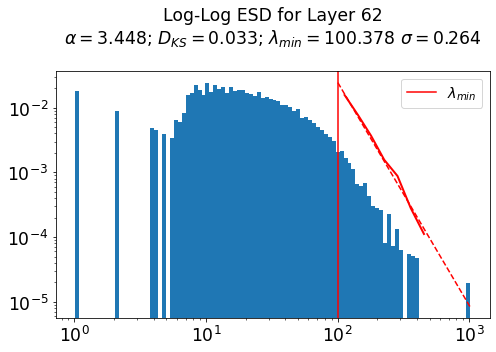

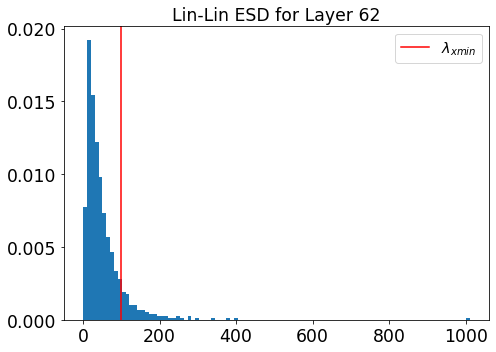

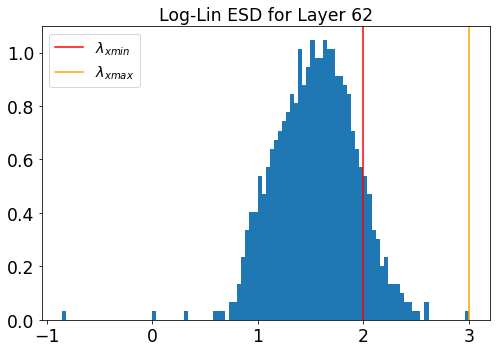

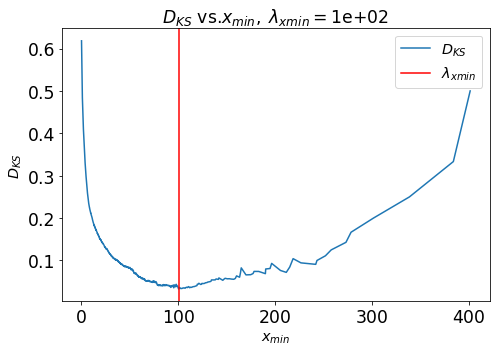

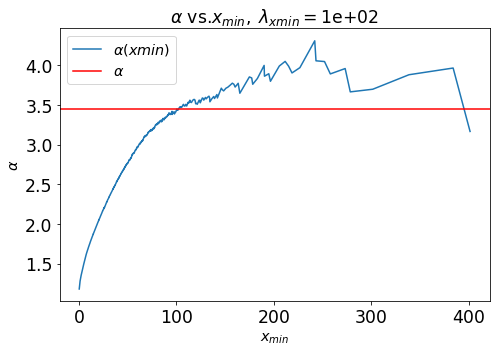

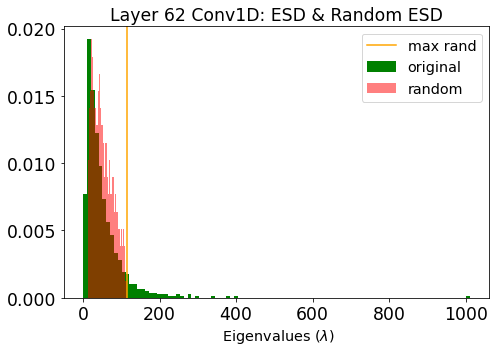

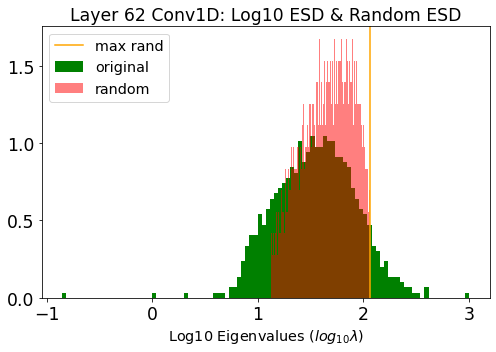

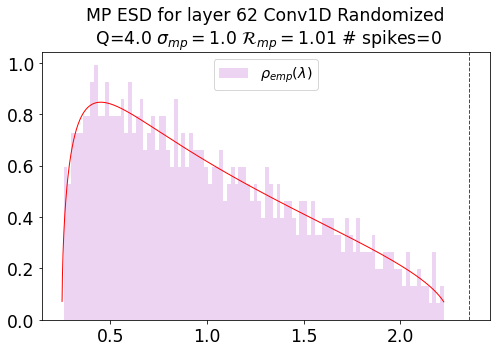

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.60 sigma 0.34 TPL or PL? 0.2167
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.3538 sigma 0.1955 TPL or PL? 1.5092
INFO:weightwatcher:2 fit alpha 3.35 sigma 0.20 TPL or PL? 1.5092
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.4041 sigma 0.2003 TPL or PL? 1.7422
INFO:weightwatcher:3 fit alpha 3.40 sigma 0.20 TPL or PL? 1.7422
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.4508 sigma 0.2049 TPL or PL? 1.9012
INFO:weightwatcher:4 fit alpha 3.45 sigma 0.20 TPL or PL? 1.9012
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.4957 sigma 0.2094 TPL or PL? 2.1463
INFO:weightwatcher:5 fit alpha 3.50 sigma 0.21 TPL or PL? 2.1463
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.5390 sigma 0.2138 TPL or PL? 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 111.0367  alpha 3.44 sigma 0.19
INFO:weightwatcher:checking fit 11 xmax 107.3855  alpha 3.44 sigma 0.19
INFO:weightwatcher:checking fit 12 xmax 105.8612  alpha 3.44 sigma 0.19


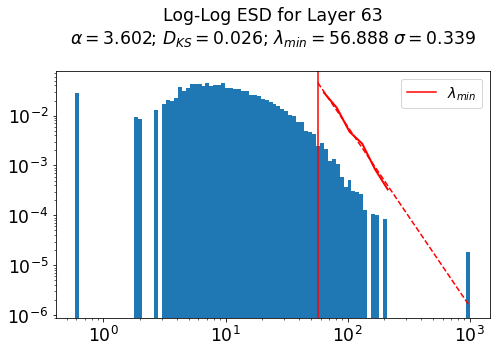

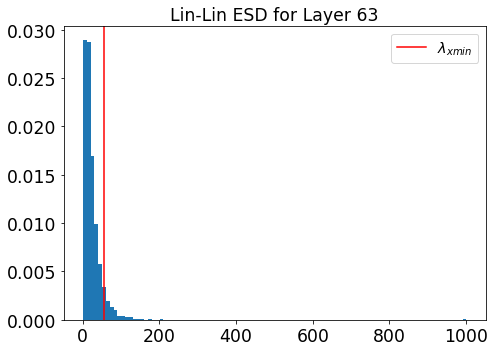

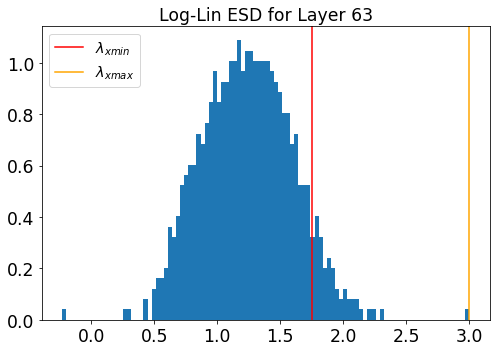

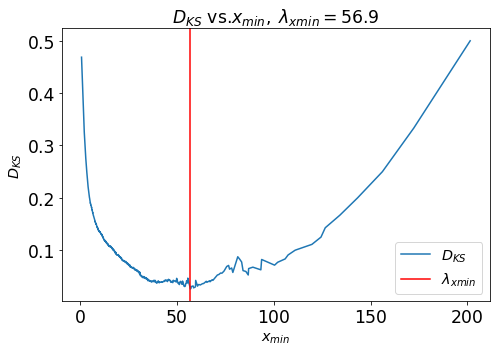

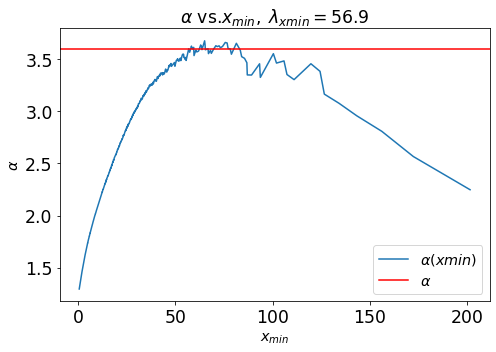

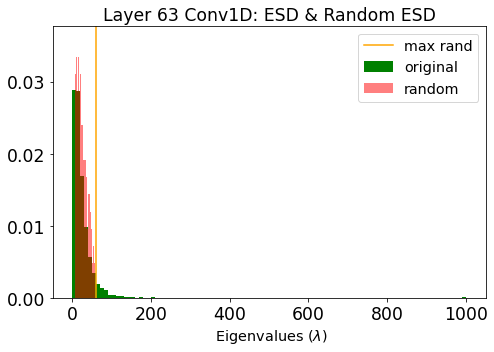

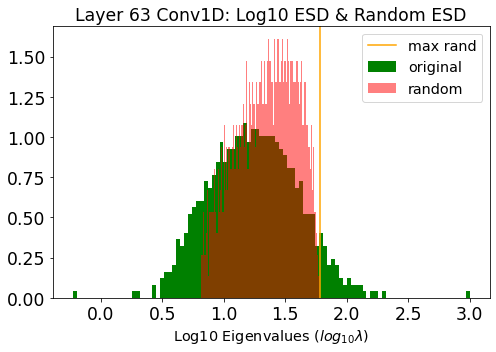

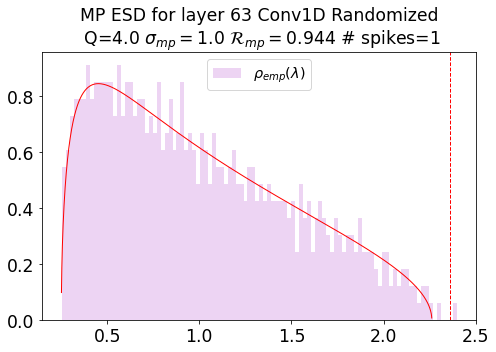

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 2.99 sigma 0.17 TPL or PL? 4.4044
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 2.8682 sigma 0.1454 TPL or PL? 4.9928
INFO:weightwatcher:2 fit alpha 2.87 sigma 0.15 TPL or PL? 4.9928
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 2.8883 sigma 0.1475 TPL or PL? 5.1594
INFO:weightwatcher:3 fit alpha 2.89 sigma 0.15 TPL or PL? 5.1594
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 2.9081 sigma 0.1495 TPL or PL? 5.2364
INFO:weightwatcher:4 fit alpha 2.91 sigma 0.15 TPL or PL? 5.2364
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 2.6603 sigma 0.1154 TPL or PL? 6.1515
INFO:weightwatcher:5 fit alpha 2.66 sigma 0.12 TPL or PL? 6.1515
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 2.6734 sigma 0.1166 TPL or PL? 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 196.7439  alpha 2.71 sigma 0.12
INFO:weightwatcher:checking fit 11 xmax 191.2597  alpha 2.71 sigma 0.12
INFO:weightwatcher:checking fit 12 xmax 187.7640  alpha 2.71 sigma 0.12


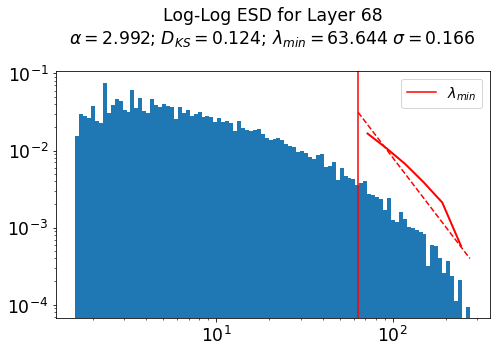

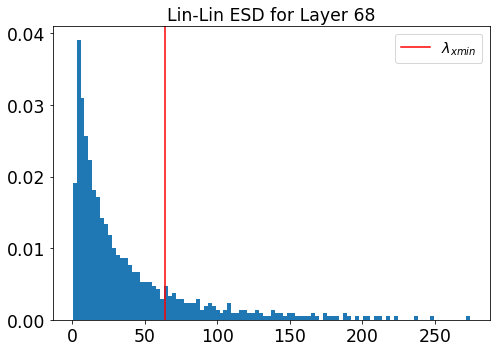

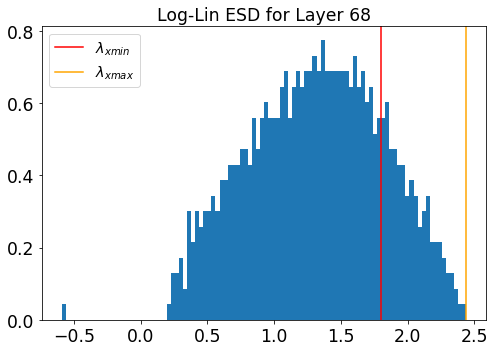

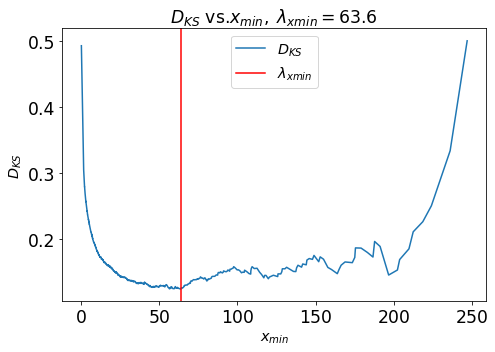

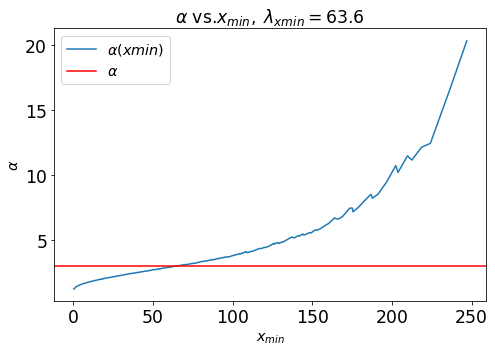

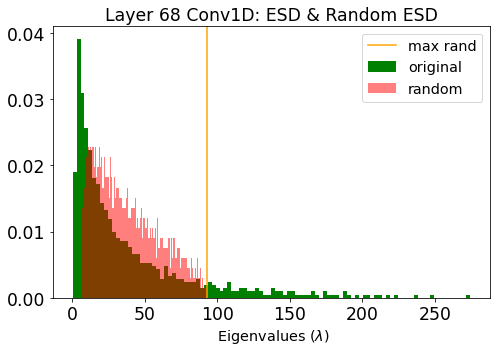

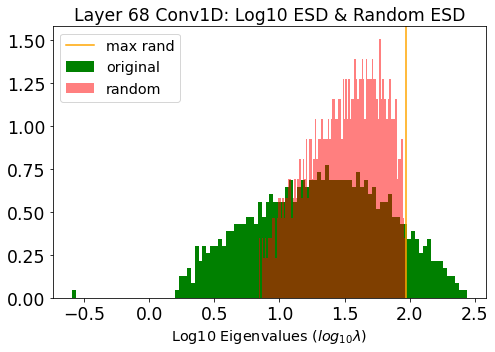

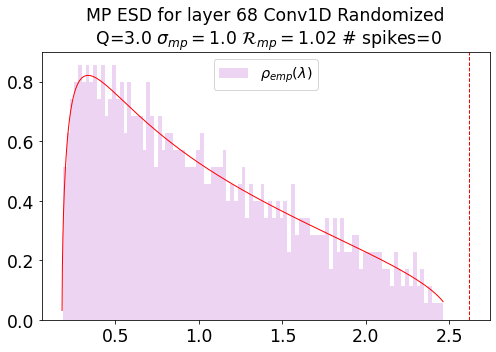

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.65 sigma 0.31 TPL or PL? 0.1414
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.7605 sigma 0.3146 TPL or PL? 1.2556
INFO:weightwatcher:2 fit alpha 3.76 sigma 0.31 TPL or PL? 1.2556
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.7841 sigma 0.3113 TPL or PL? 2.6719
INFO:weightwatcher:3 fit alpha 3.78 sigma 0.31 TPL or PL? 2.6719
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.8498 sigma 0.3206 TPL or PL? 2.8072
INFO:weightwatcher:4 fit alpha 3.85 sigma 0.32 TPL or PL? 2.8072
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.9150 sigma 0.3301 TPL or PL? 2.8754
INFO:weightwatcher:5 fit alpha 3.91 sigma 0.33 TPL or PL? 2.8754
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 4.0877 sigma 0.3614 TPL or PL? 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 40.7909  alpha 4.45 sigma 0.42
INFO:weightwatcher:checking fit 11 xmax 39.0851  alpha 4.45 sigma 0.42
INFO:weightwatcher:checking fit 12 xmax 37.9022  alpha 4.45 sigma 0.42


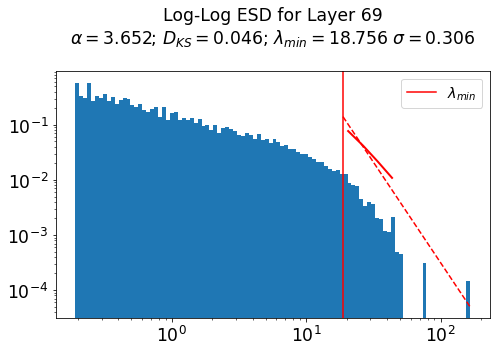

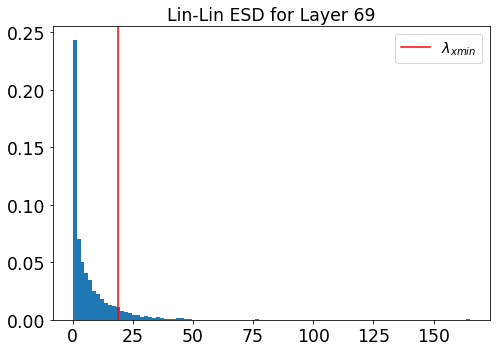

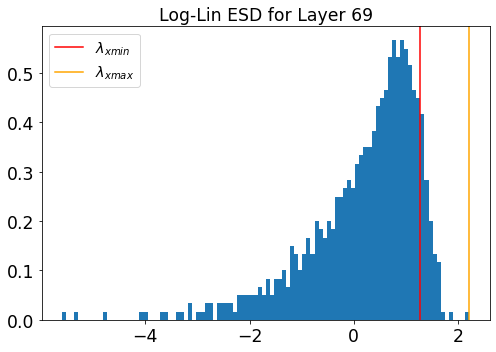

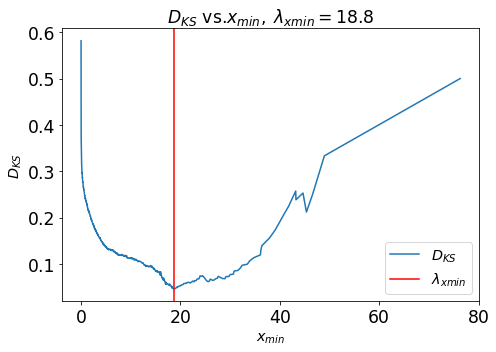

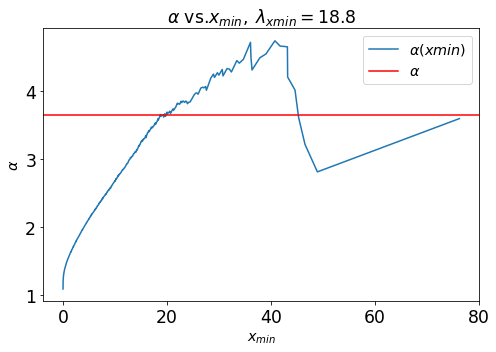

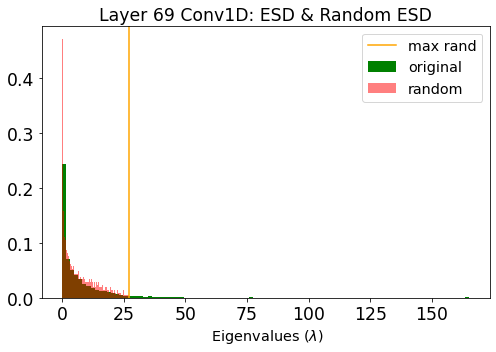

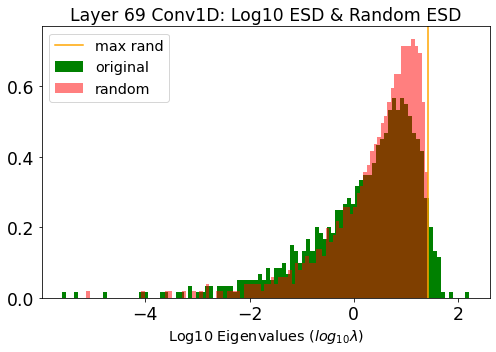

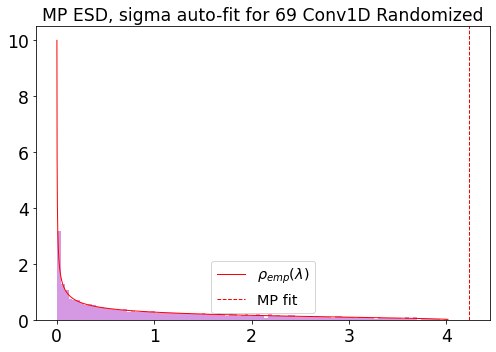

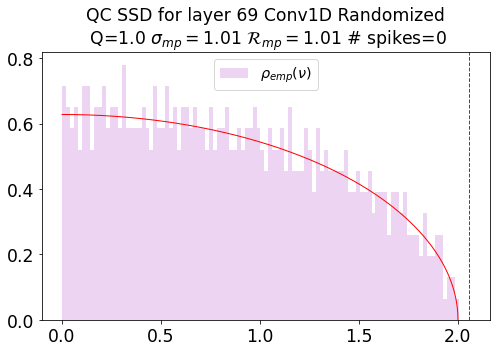

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.90 sigma 0.47 TPL or PL? -0.0011
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.5946 sigma 0.2452 TPL or PL? 1.4251
INFO:weightwatcher:2 fit alpha 3.59 sigma 0.25 TPL or PL? 1.4251
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.5182 sigma 0.2136 TPL or PL? 1.8631
INFO:weightwatcher:3 fit alpha 3.52 sigma 0.21 TPL or PL? 1.8631
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.5655 sigma 0.2184 TPL or PL? 2.0970
INFO:weightwatcher:4 fit alpha 3.57 sigma 0.22 TPL or PL? 2.0970
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.5263 sigma 0.2091 TPL or PL? 2.6878
INFO:weightwatcher:5 fit alpha 3.53 sigma 0.21 TPL or PL? 2.6878
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.6536 sigma 0.2275 TPL or PL?

checking alpha


INFO:weightwatcher:checking fit 10 xmax 217.0468  alpha 3.79 sigma 0.24
INFO:weightwatcher:checking fit 11 xmax 212.8881  alpha 3.79 sigma 0.24
INFO:weightwatcher:checking fit 12 xmax 208.5364  alpha 3.79 sigma 0.24


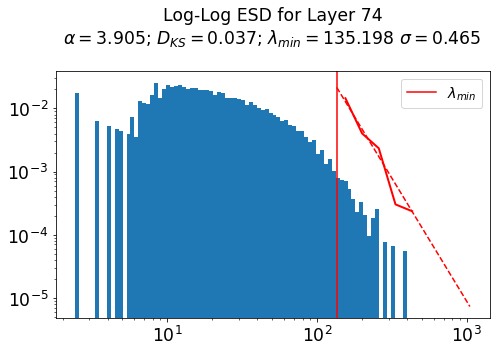

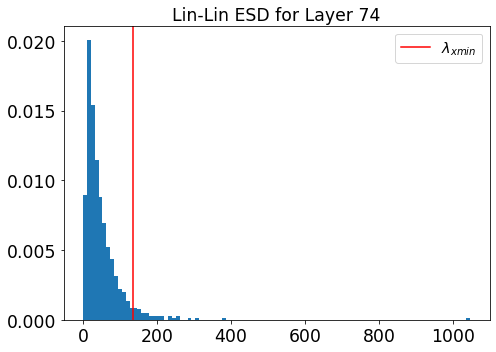

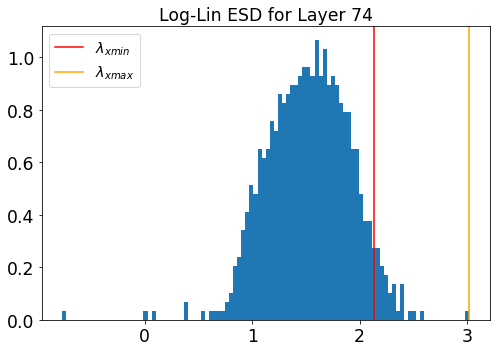

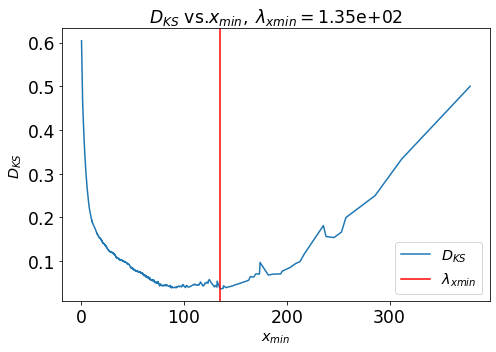

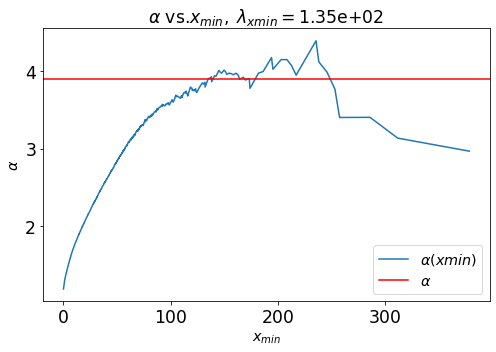

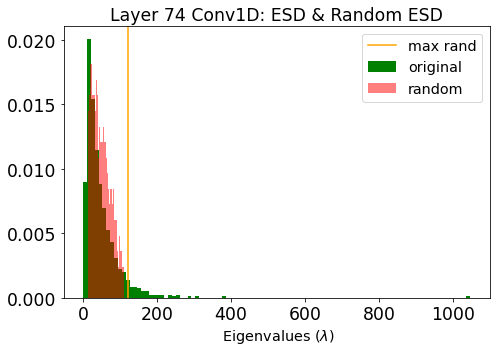

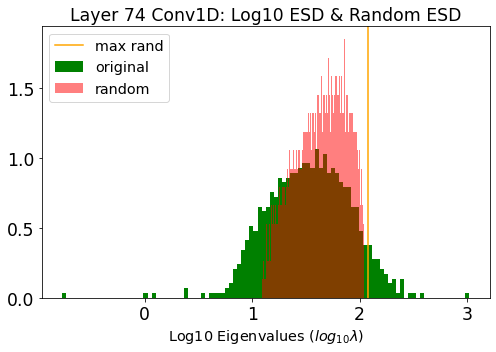

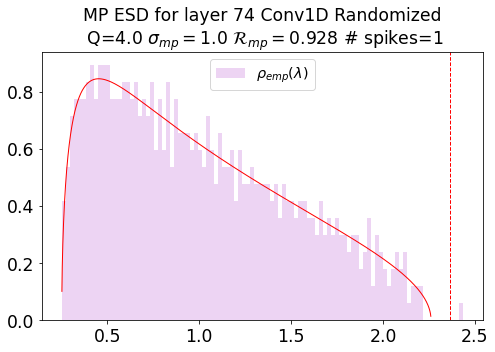

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.59 sigma 0.29 TPL or PL? -0.0010
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.3376 sigma 0.1831 TPL or PL? 1.2115
INFO:weightwatcher:2 fit alpha 3.34 sigma 0.18 TPL or PL? 1.2115
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.3932 sigma 0.1880 TPL or PL? 1.8640
INFO:weightwatcher:3 fit alpha 3.39 sigma 0.19 TPL or PL? 1.8640
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.4385 sigma 0.1922 TPL or PL? 2.4579
INFO:weightwatcher:4 fit alpha 3.44 sigma 0.19 TPL or PL? 2.4579
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.4787 sigma 0.1960 TPL or PL? 2.9678
INFO:weightwatcher:5 fit alpha 3.48 sigma 0.20 TPL or PL? 2.9678
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.4594 sigma 0.1903 TPL or PL?

checking alpha


INFO:weightwatcher:checking fit 10 xmax 116.3616  alpha 3.55 sigma 0.20
INFO:weightwatcher:checking fit 11 xmax 116.0519  alpha 3.55 sigma 0.20
INFO:weightwatcher:checking fit 12 xmax 114.8823  alpha 3.55 sigma 0.20


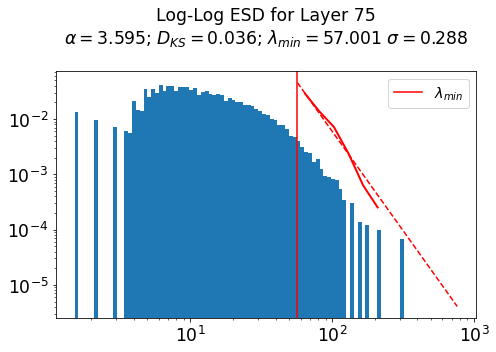

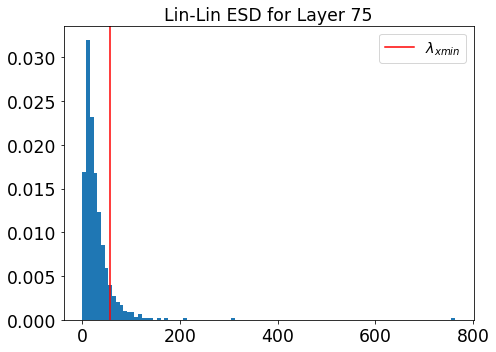

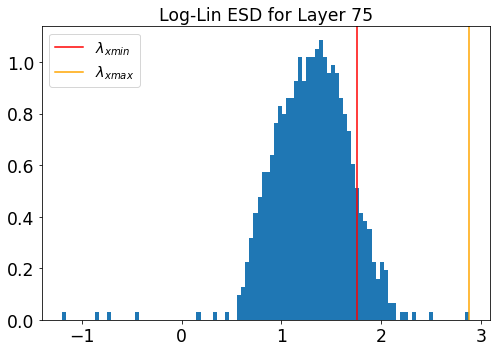

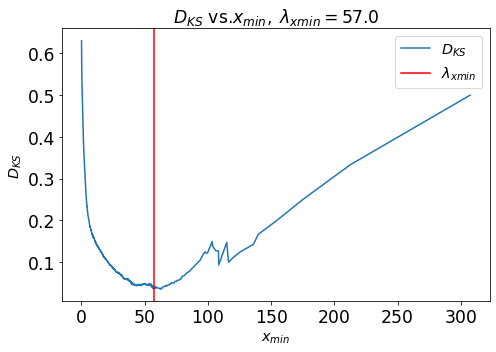

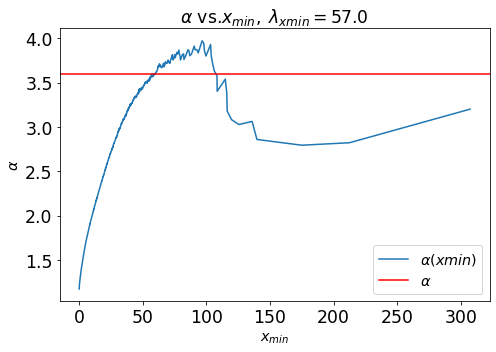

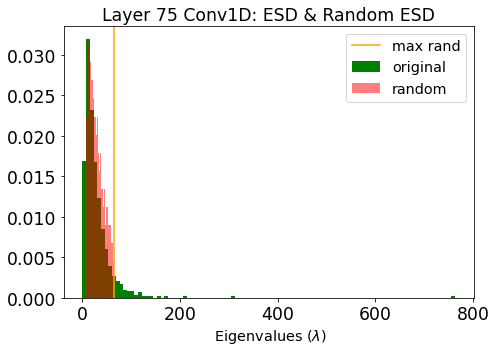

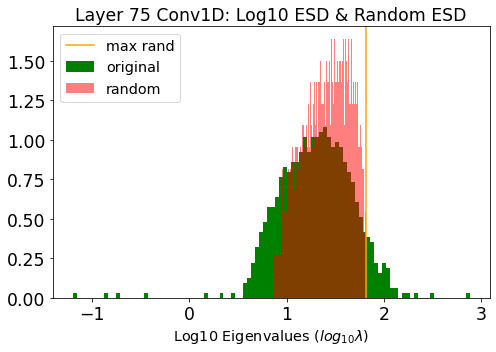

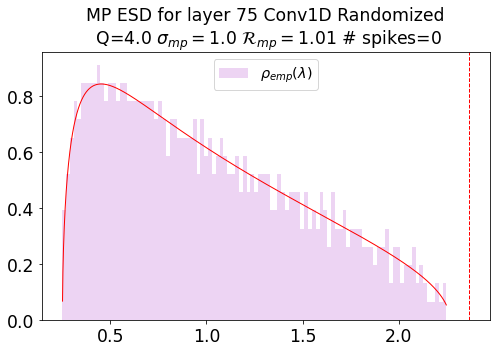

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.04 sigma 0.15 TPL or PL? 3.9749
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.0680 sigma 0.1504 TPL or PL? 4.2209
INFO:weightwatcher:2 fit alpha 3.07 sigma 0.15 TPL or PL? 4.2209
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.0919 sigma 0.1526 TPL or PL? 4.5252
INFO:weightwatcher:3 fit alpha 3.09 sigma 0.15 TPL or PL? 4.5252
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.1150 sigma 0.1547 TPL or PL? 4.7754
INFO:weightwatcher:4 fit alpha 3.12 sigma 0.15 TPL or PL? 4.7754
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.1375 sigma 0.1567 TPL or PL? 4.8912
INFO:weightwatcher:5 fit alpha 3.14 sigma 0.16 TPL or PL? 4.8912
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.1593 sigma 0.1588 TPL or PL? 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 175.4507  alpha 3.22 sigma 0.16
INFO:weightwatcher:checking fit 11 xmax 167.1930  alpha 3.22 sigma 0.16
INFO:weightwatcher:checking fit 12 xmax 165.2324  alpha 3.22 sigma 0.16


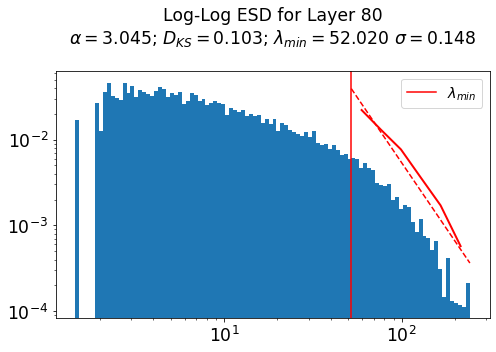

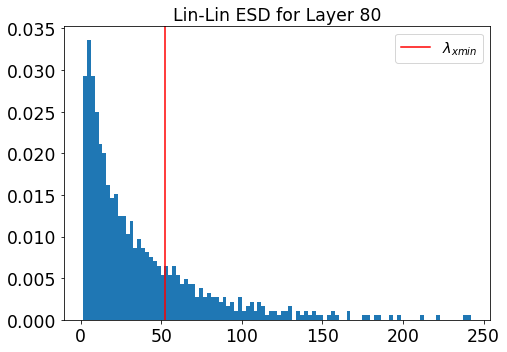

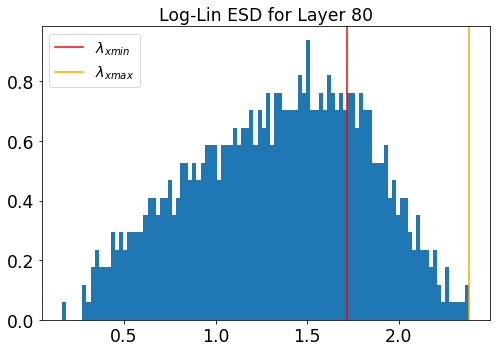

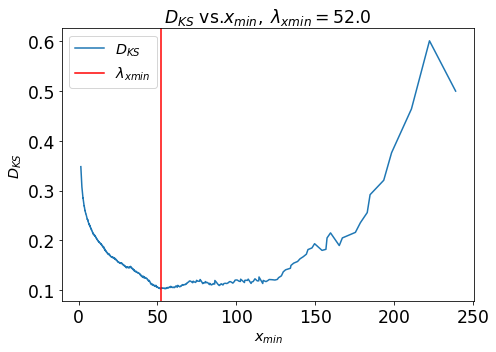

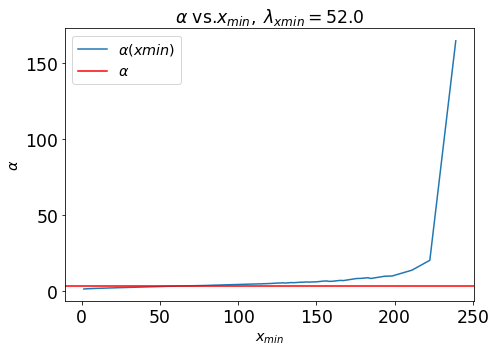

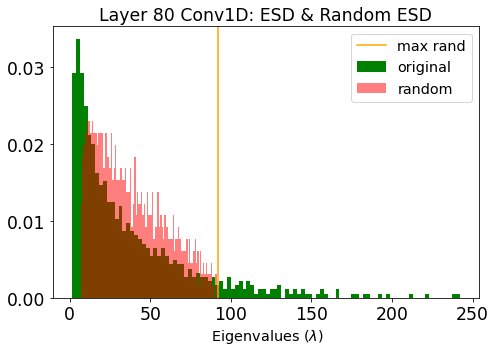

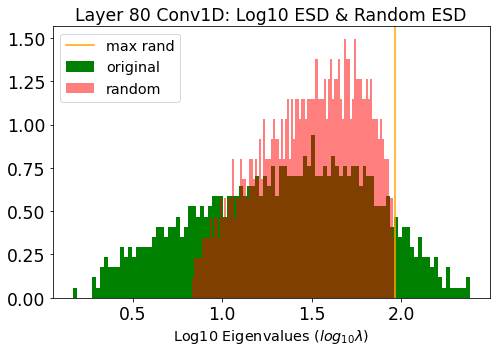

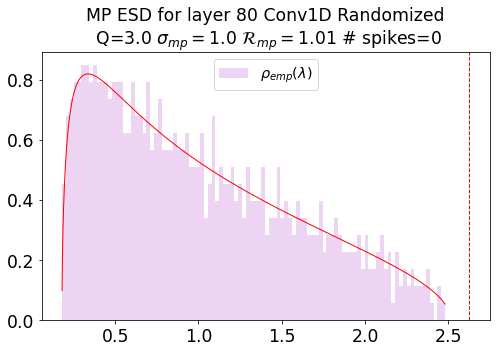

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 4.89 sigma 0.81 TPL or PL? -0.0003
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 5.9621 sigma 1.0579 TPL or PL? 0.4551
INFO:weightwatcher:2 fit alpha 5.96 sigma 1.06 TPL or PL? 0.4551
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.1830 sigma 0.2183 TPL or PL? 4.5056
INFO:weightwatcher:3 fit alpha 3.18 sigma 0.22 TPL or PL? 4.5056
INFO:weightwatcher:stopping at 3 3.18 << 5.96 


checking alpha


INFO:weightwatcher:checking fit 4 xmax 75.3993  alpha 3.18 sigma 0.22
INFO:weightwatcher:checking fit 5 xmax 73.1711  alpha 3.18 sigma 0.22
INFO:weightwatcher:checking fit 6 xmax 70.8615  alpha 3.18 sigma 0.22


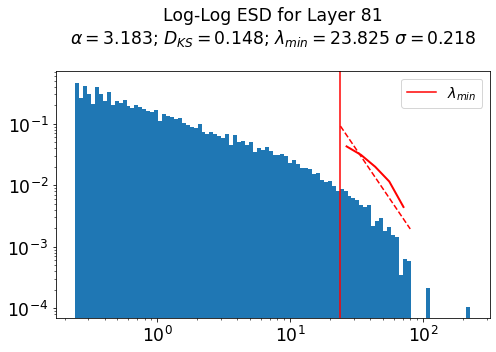

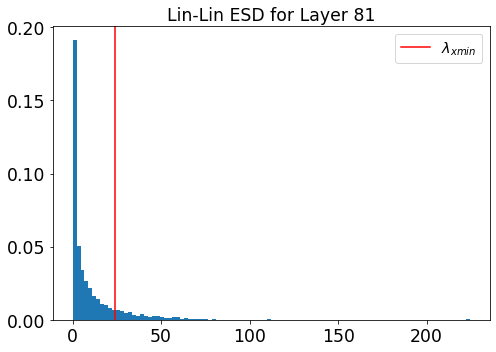

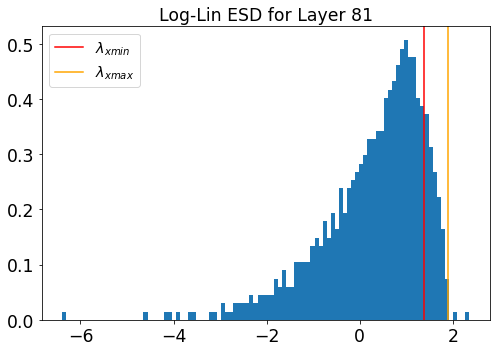

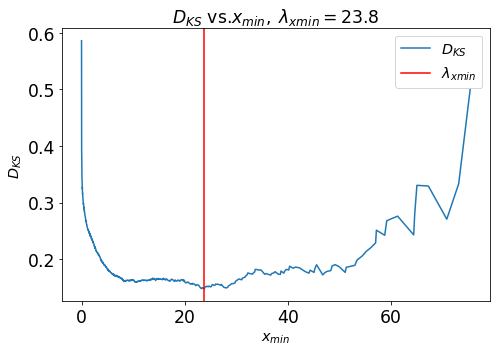

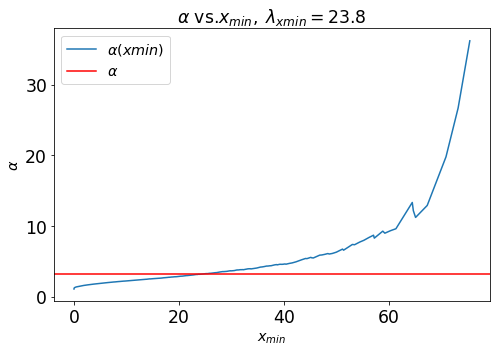

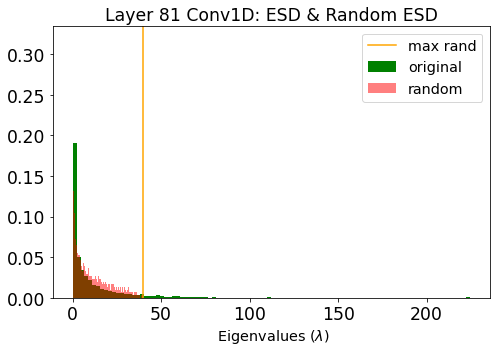

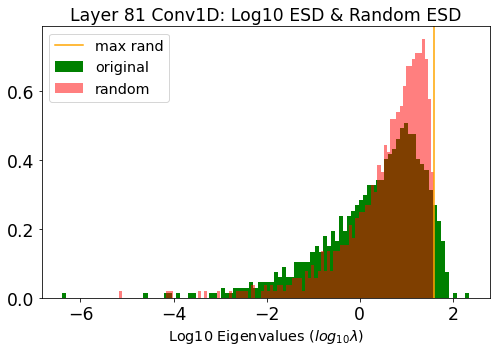

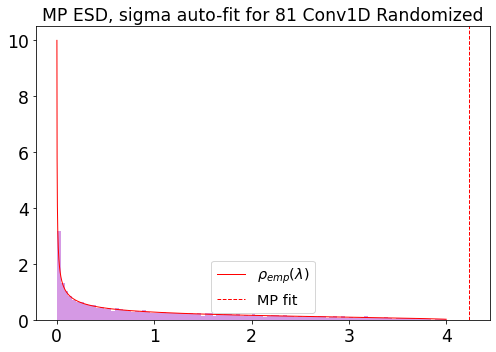

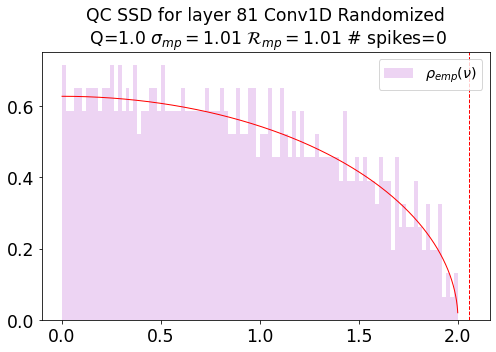

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.50 sigma 0.24 TPL or PL? 0.1983
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.5490 sigma 0.2317 TPL or PL? 1.5369
INFO:weightwatcher:2 fit alpha 3.55 sigma 0.23 TPL or PL? 1.5369
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.4895 sigma 0.2119 TPL or PL? 1.9817
INFO:weightwatcher:3 fit alpha 3.49 sigma 0.21 TPL or PL? 1.9817
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.5332 sigma 0.2164 TPL or PL? 2.2308
INFO:weightwatcher:4 fit alpha 3.53 sigma 0.22 TPL or PL? 2.2308
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.5763 sigma 0.2209 TPL or PL? 2.4638
INFO:weightwatcher:5 fit alpha 3.58 sigma 0.22 TPL or PL? 2.4638
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.6193 sigma 0.2254 TPL or PL? 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 216.2021  alpha 3.65 sigma 0.22
INFO:weightwatcher:checking fit 11 xmax 210.2029  alpha 3.65 sigma 0.22
INFO:weightwatcher:checking fit 12 xmax 206.1195  alpha 3.65 sigma 0.22


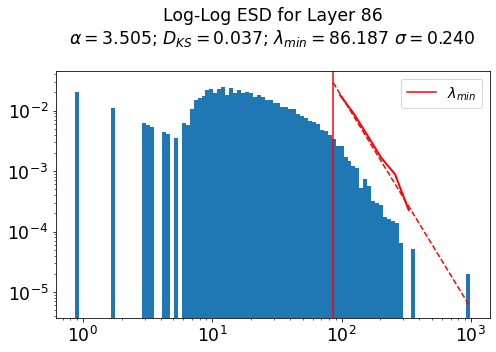

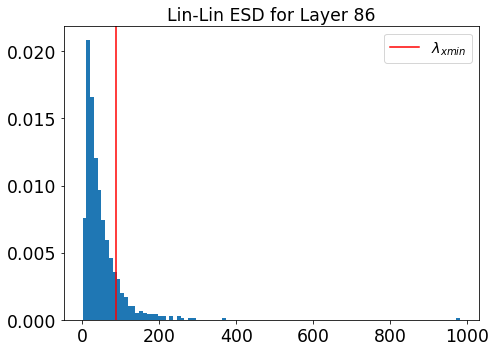

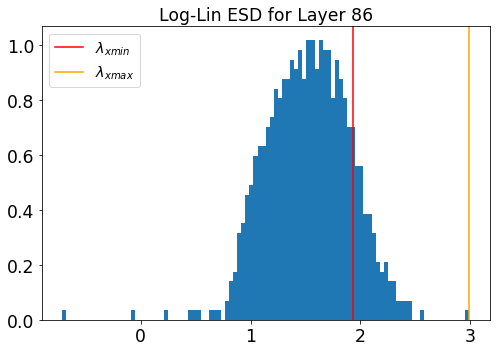

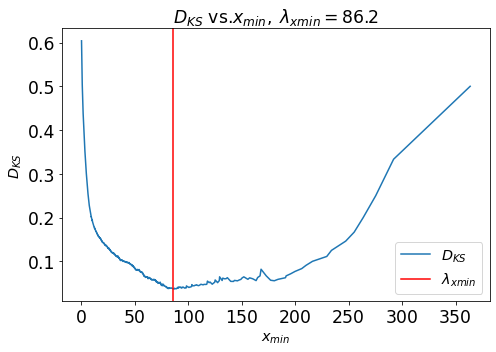

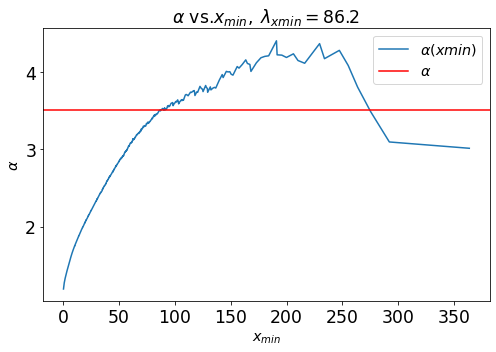

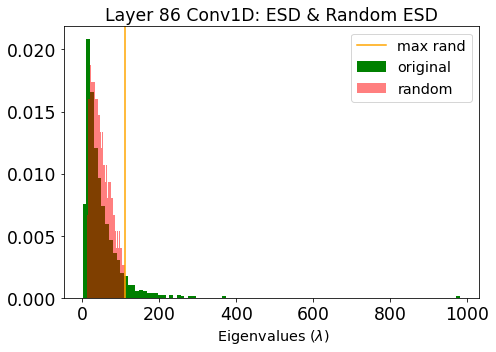

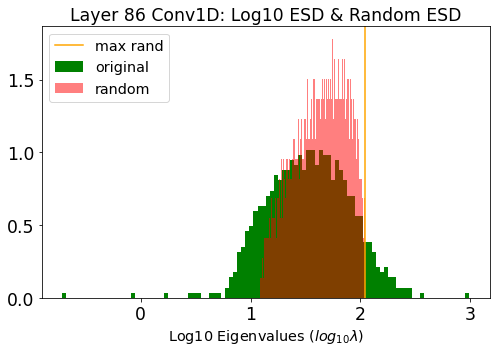

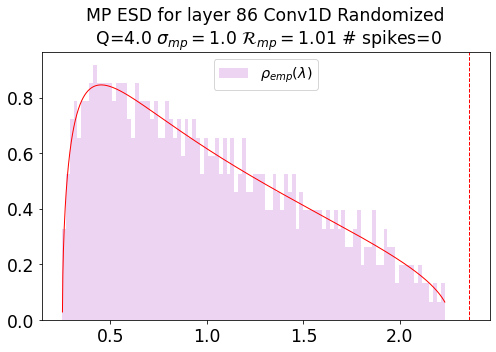

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.87 sigma 0.34 TPL or PL? -0.0108
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 4.1554 sigma 0.3799 TPL or PL? 0.4338
INFO:weightwatcher:2 fit alpha 4.16 sigma 0.38 TPL or PL? 0.4338
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 4.3367 sigma 0.4046 TPL or PL? 0.8331
INFO:weightwatcher:3 fit alpha 4.34 sigma 0.40 TPL or PL? 0.8331
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 4.3391 sigma 0.3710 TPL or PL? 1.6491
INFO:weightwatcher:4 fit alpha 4.34 sigma 0.37 TPL or PL? 1.6491
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 4.4523 sigma 0.3860 TPL or PL? 2.2697
INFO:weightwatcher:5 fit alpha 4.45 sigma 0.39 TPL or PL? 2.2697
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 4.5475 sigma 0.3991 TPL or PL?

checking alpha


INFO:weightwatcher:checking fit 10 xmax 138.7013  alpha 4.13 sigma 0.29
INFO:weightwatcher:checking fit 11 xmax 133.9321  alpha 4.13 sigma 0.29


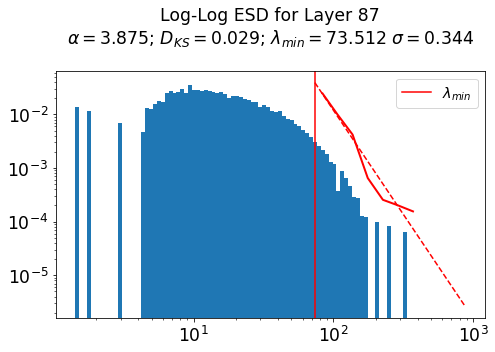

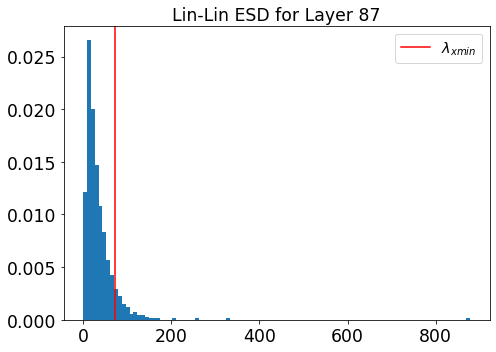

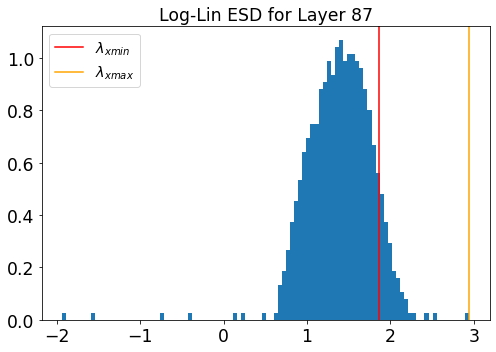

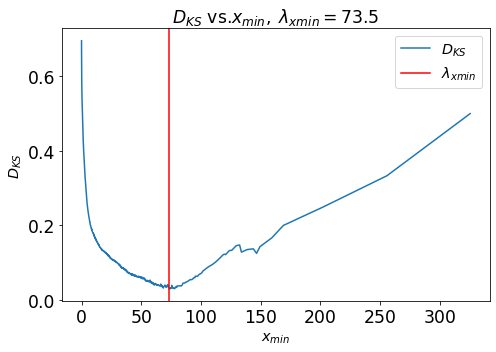

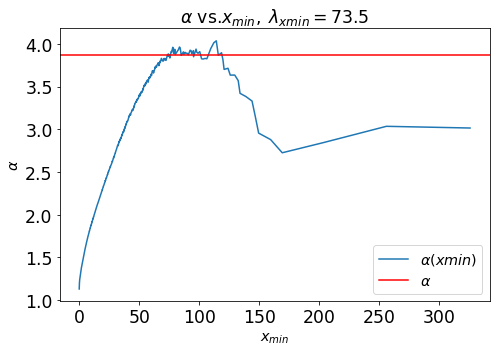

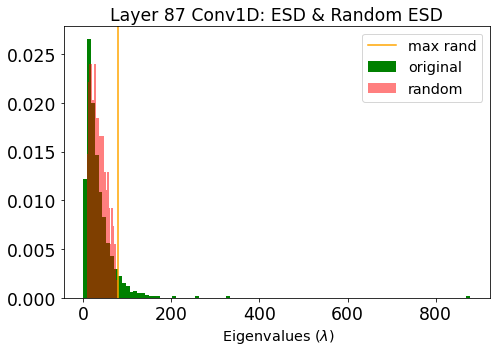

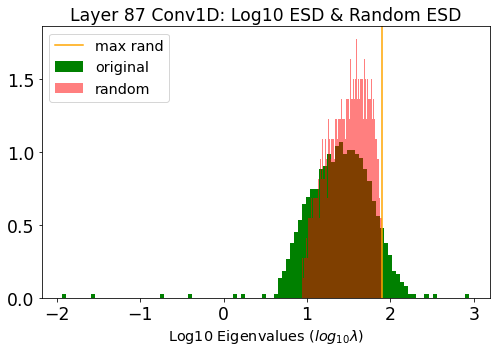

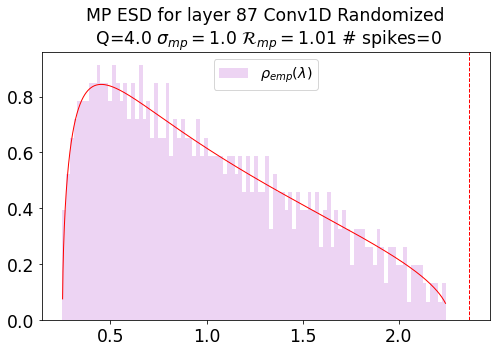

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.58 sigma 0.24 TPL or PL? 3.2467
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.6358 sigma 0.2491 TPL or PL? 3.5659
INFO:weightwatcher:2 fit alpha 3.64 sigma 0.25 TPL or PL? 3.5659
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.6841 sigma 0.2548 TPL or PL? 3.9239
INFO:weightwatcher:3 fit alpha 3.68 sigma 0.25 TPL or PL? 3.9239
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.7264 sigma 0.2600 TPL or PL? 3.9996
INFO:weightwatcher:4 fit alpha 3.73 sigma 0.26 TPL or PL? 3.9996
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.7702 sigma 0.2653 TPL or PL? 4.0875
INFO:weightwatcher:5 fit alpha 3.77 sigma 0.27 TPL or PL? 4.0875
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.8145 sigma 0.2708 TPL or PL? 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 176.2617  alpha 3.95 sigma 0.29
INFO:weightwatcher:checking fit 11 xmax 172.6140  alpha 3.95 sigma 0.29
INFO:weightwatcher:checking fit 12 xmax 168.8630  alpha 3.95 sigma 0.29


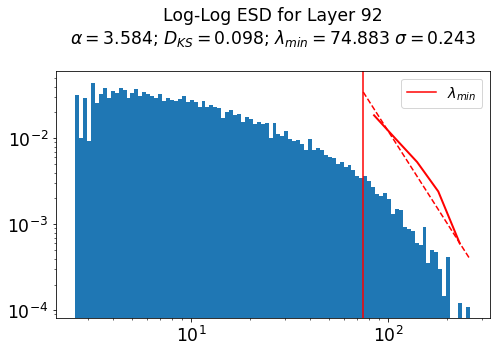

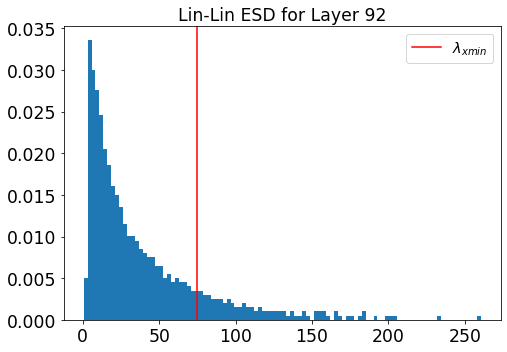

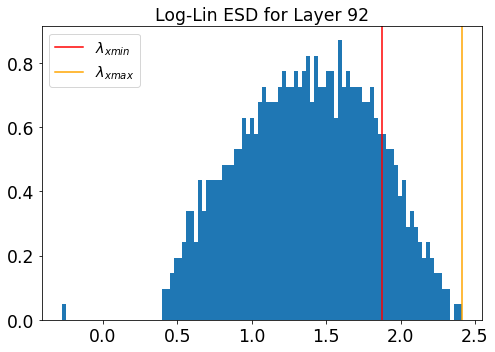

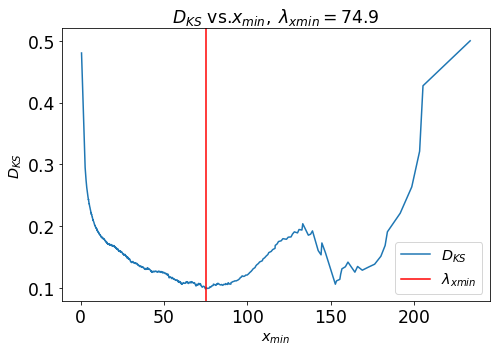

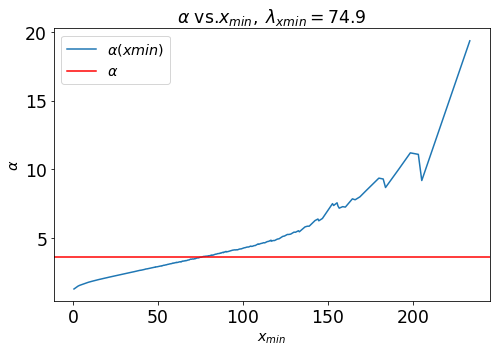

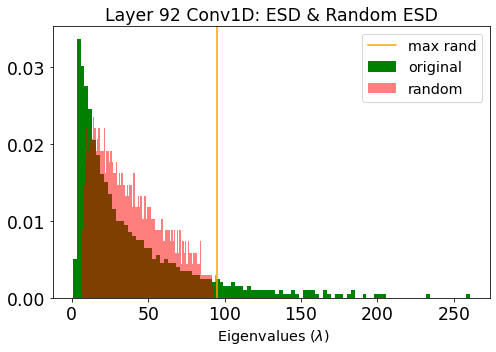

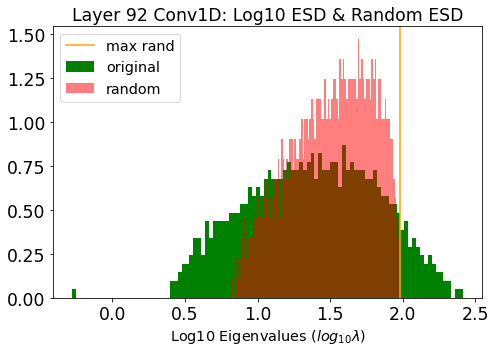

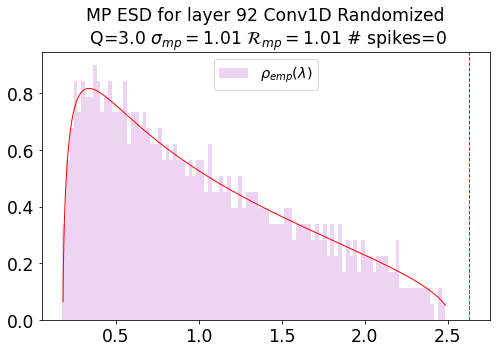

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 4.94 sigma 0.77 TPL or PL? -0.0013
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 2.9580 sigma 0.1673 TPL or PL? 4.4093
INFO:weightwatcher:2 fit alpha 2.96 sigma 0.17 TPL or PL? 4.4093
INFO:weightwatcher:stopping at 2 2.96 << 4.94 


checking alpha


INFO:weightwatcher:checking fit 3 xmax 70.7371  alpha 2.96 sigma 0.17
INFO:weightwatcher:checking fit 4 xmax 67.3636  alpha 2.96 sigma 0.17
INFO:weightwatcher:checking fit 5 xmax 64.7867  alpha 2.96 sigma 0.17


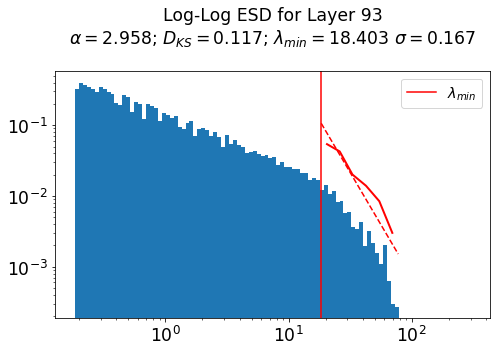

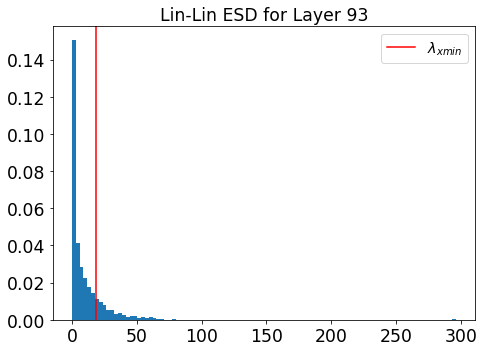

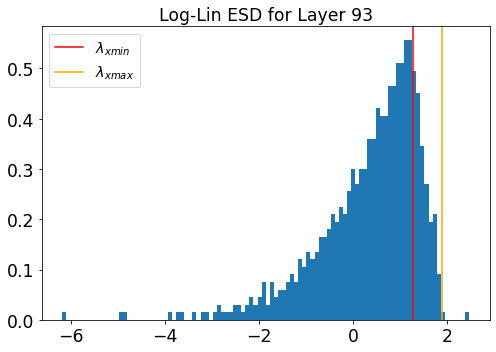

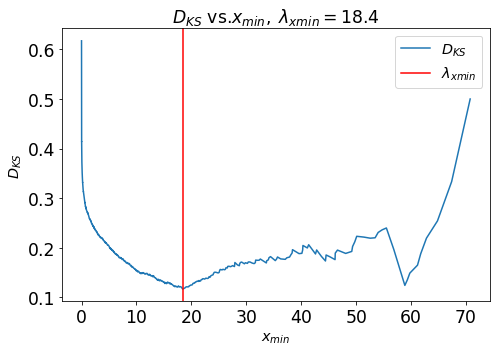

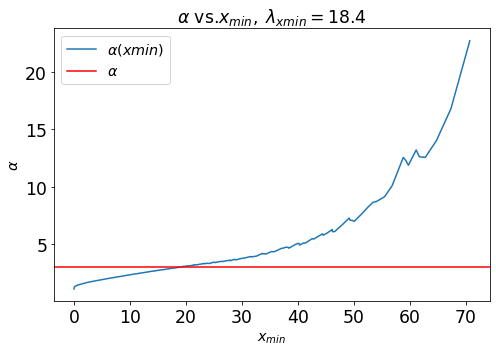

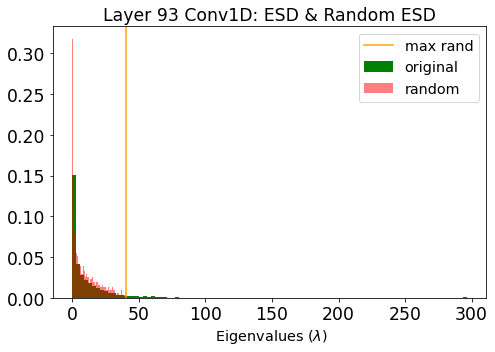

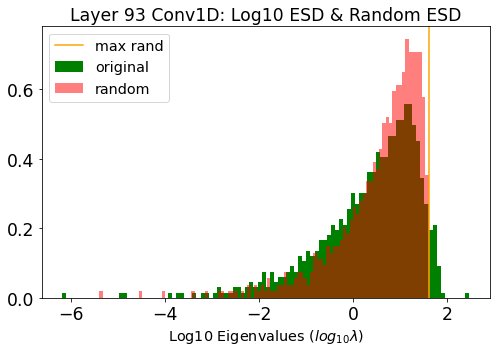

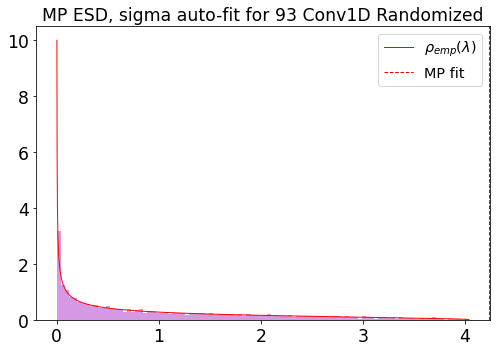

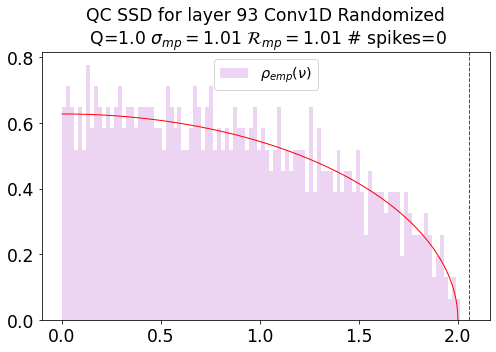

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.74 sigma 0.30 TPL or PL? -0.0032
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.7044 sigma 0.2555 TPL or PL? 1.5233
INFO:weightwatcher:2 fit alpha 3.70 sigma 0.26 TPL or PL? 1.5233
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.7705 sigma 0.2630 TPL or PL? 1.7288
INFO:weightwatcher:3 fit alpha 3.77 sigma 0.26 TPL or PL? 1.7288
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.8303 sigma 0.2699 TPL or PL? 1.9792
INFO:weightwatcher:4 fit alpha 3.83 sigma 0.27 TPL or PL? 1.9792
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.8903 sigma 0.2768 TPL or PL? 2.2375
INFO:weightwatcher:5 fit alpha 3.89 sigma 0.28 TPL or PL? 2.2375
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.9508 sigma 0.2839 TPL or PL?

checking alpha


INFO:weightwatcher:checking fit 10 xmax 212.5638  alpha 4.13 sigma 0.31
INFO:weightwatcher:checking fit 11 xmax 207.7456  alpha 4.13 sigma 0.31
INFO:weightwatcher:checking fit 12 xmax 202.4939  alpha 4.13 sigma 0.31


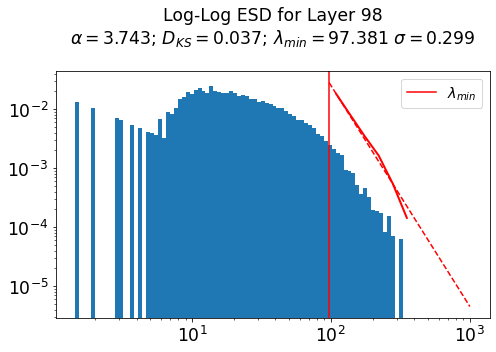

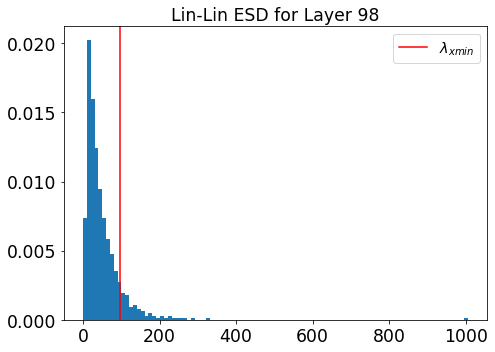

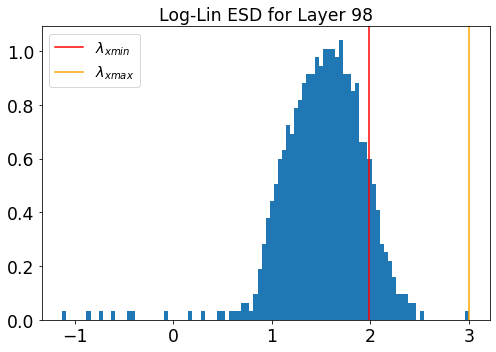

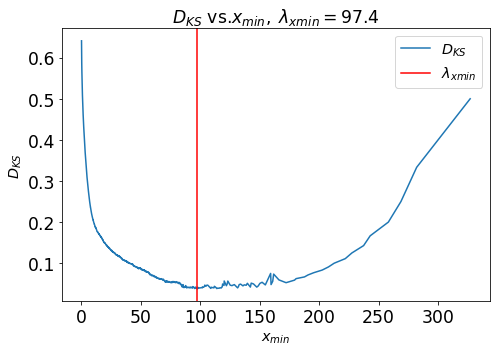

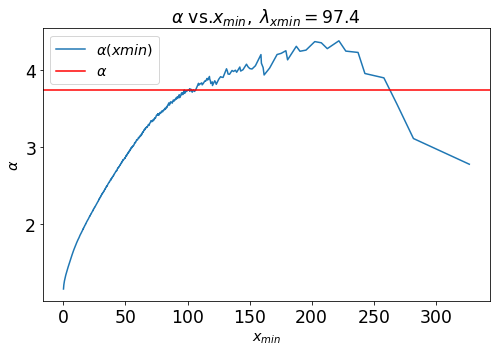

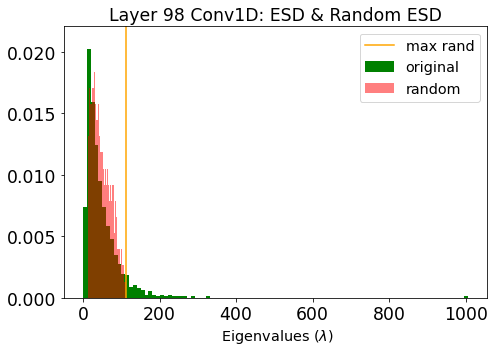

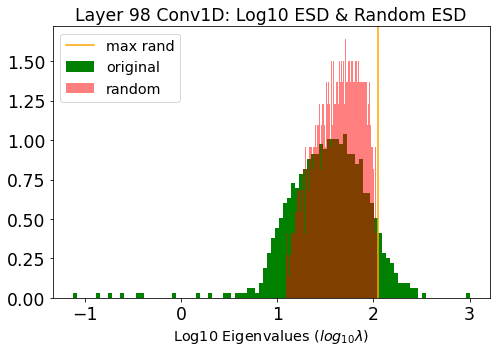

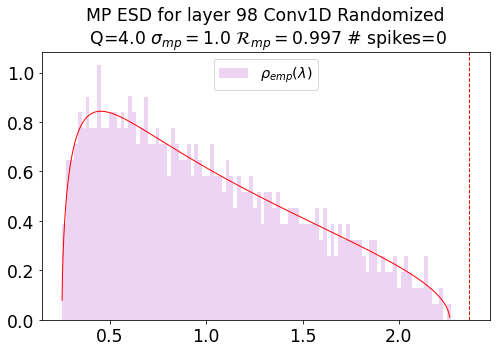

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 4.04 sigma 0.39 TPL or PL? -0.0007
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 4.2487 sigma 0.3883 TPL or PL? 0.8983
INFO:weightwatcher:2 fit alpha 4.25 sigma 0.39 TPL or PL? 0.8983
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 4.4366 sigma 0.4230 TPL or PL? 0.9832
INFO:weightwatcher:3 fit alpha 4.44 sigma 0.42 TPL or PL? 0.9832
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.7903 sigma 0.2309 TPL or PL? 2.2791
INFO:weightwatcher:4 fit alpha 3.79 sigma 0.23 TPL or PL? 2.2791
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.8404 sigma 0.2359 TPL or PL? 2.6786
INFO:weightwatcher:5 fit alpha 3.84 sigma 0.24 TPL or PL? 2.6786
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.8902 sigma 0.2409 TPL or PL?

checking alpha


INFO:weightwatcher:checking fit 10 xmax 169.7511  alpha 4.03 sigma 0.25
INFO:weightwatcher:checking fit 11 xmax 166.8175  alpha 4.03 sigma 0.25
INFO:weightwatcher:checking fit 12 xmax 163.1623  alpha 4.03 sigma 0.25


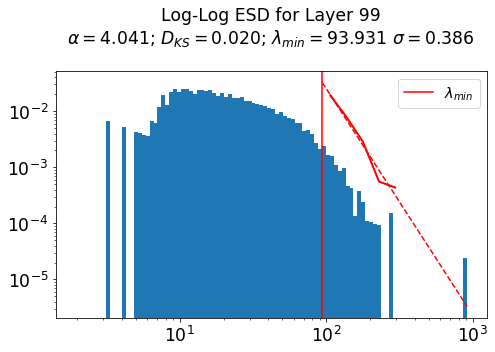

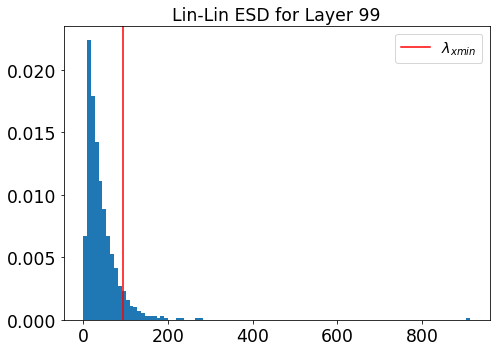

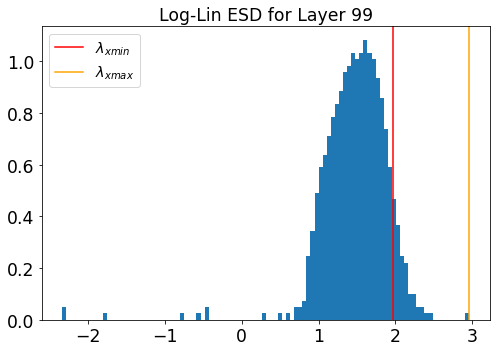

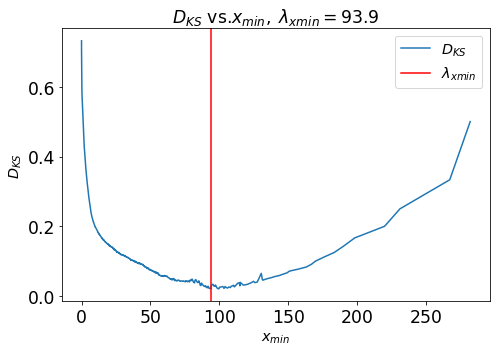

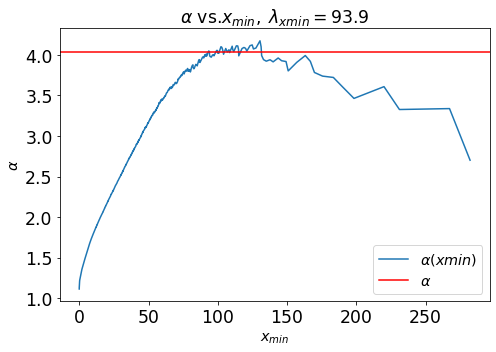

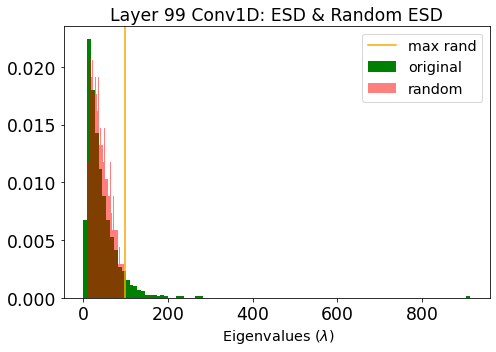

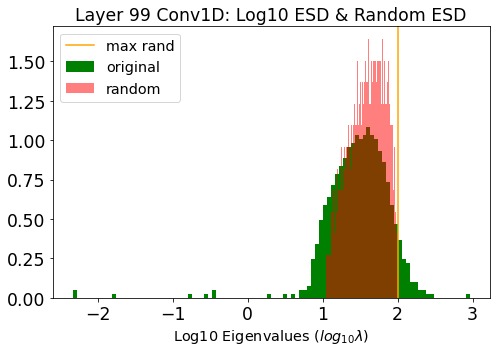

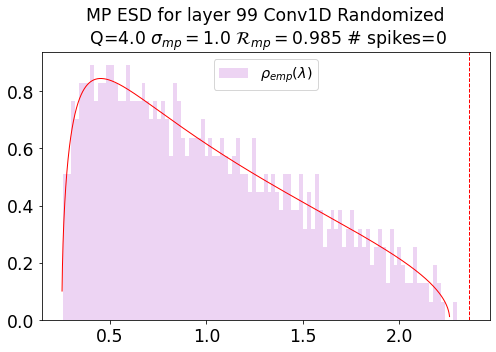

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 4.88 sigma 0.51 TPL or PL? 1.3689
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 5.0649 sigma 0.5384 TPL or PL? 1.9712
INFO:weightwatcher:2 fit alpha 5.06 sigma 0.54 TPL or PL? 1.9712
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.7732 sigma 0.2344 TPL or PL? 4.1720
INFO:weightwatcher:3 fit alpha 3.77 sigma 0.23 TPL or PL? 4.1720
INFO:weightwatcher:stopping at 3 3.77 << 5.06 


checking alpha


INFO:weightwatcher:checking fit 4 xmax 173.7953  alpha 3.77 sigma 0.23
INFO:weightwatcher:checking fit 5 xmax 166.1917  alpha 3.77 sigma 0.23
INFO:weightwatcher:checking fit 6 xmax 158.7820  alpha 3.77 sigma 0.23


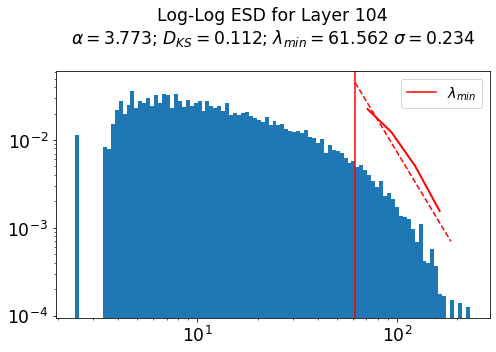

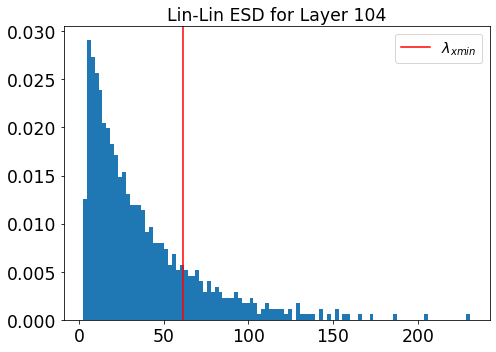

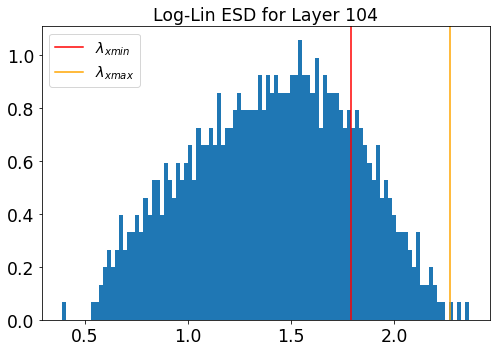

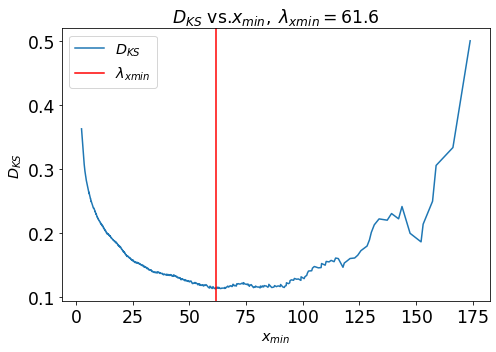

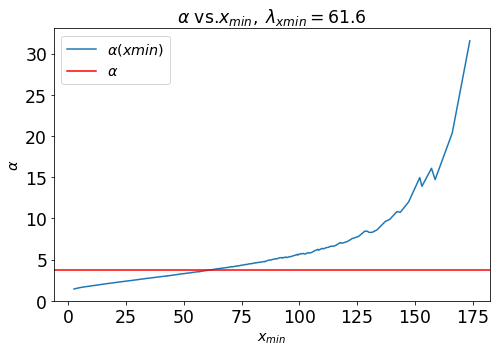

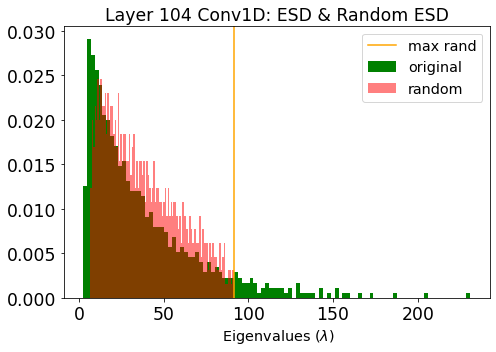

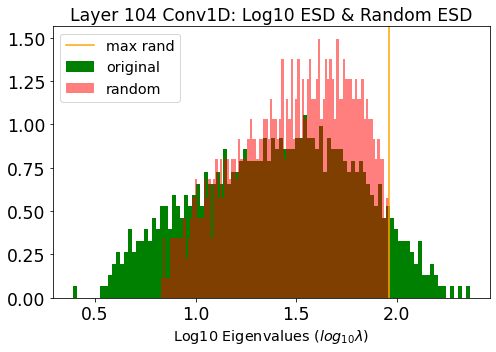

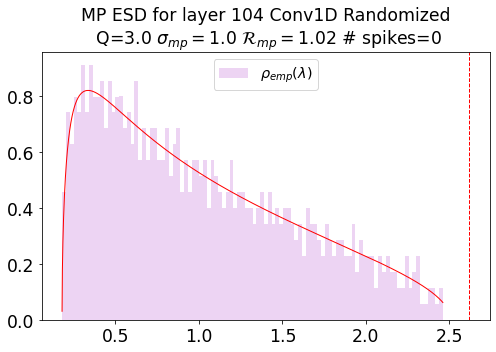

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 5.23 sigma 0.66 TPL or PL? -0.0004
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 9.4622 sigma 1.8041 TPL or PL? 0.7655
INFO:weightwatcher:2 fit alpha 9.46 sigma 1.80 TPL or PL? 0.7655
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 10.5924 sigma 2.0932 TPL or PL? 1.5344
INFO:weightwatcher:3 fit alpha 10.59 sigma 2.09 TPL or PL? 1.5344
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 11.5218 sigma 2.3528 TPL or PL? 1.7084
INFO:weightwatcher:4 fit alpha 11.52 sigma 2.35 TPL or PL? 1.7084
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 12.4653 sigma 2.6303 TPL or PL? 1.7733
INFO:weightwatcher:5 fit alpha 12.47 sigma 2.63 TPL or PL? 1.7733
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 2.5951 sigma 0.1160 TPL 

checking alpha


INFO:weightwatcher:checking fit 7 xmax 64.1185  alpha 2.60 sigma 0.12
INFO:weightwatcher:checking fit 8 xmax 61.8017  alpha 2.60 sigma 0.12
INFO:weightwatcher:checking fit 9 xmax 60.9443  alpha 2.60 sigma 0.12


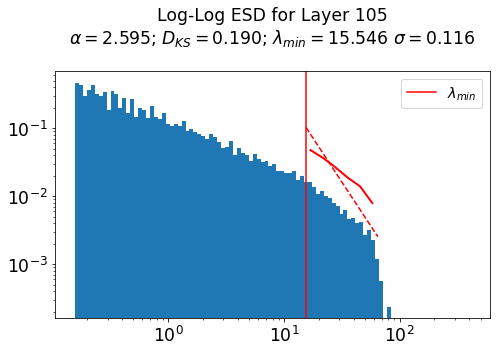

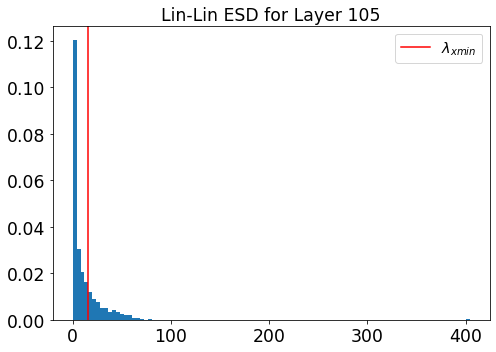

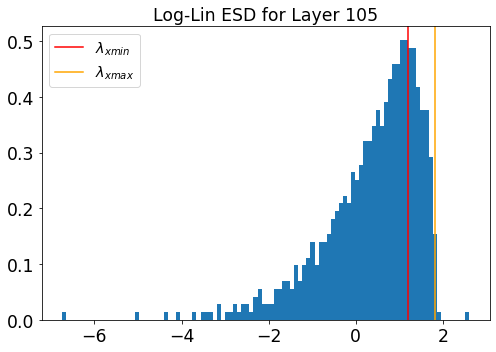

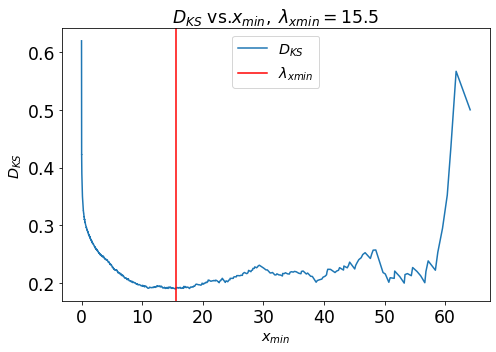

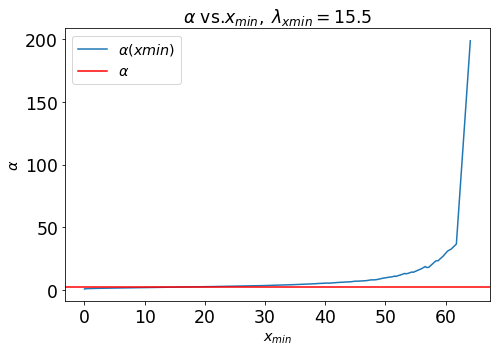

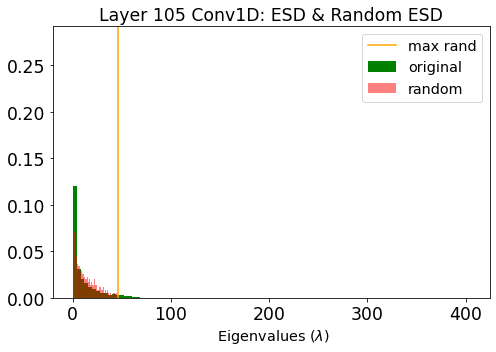

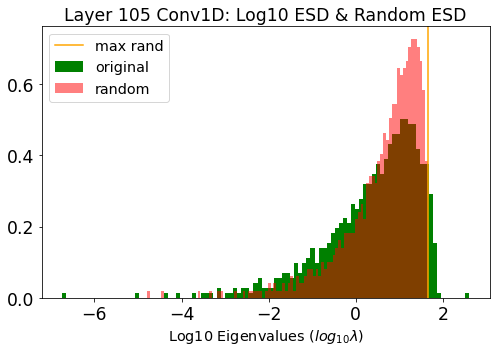

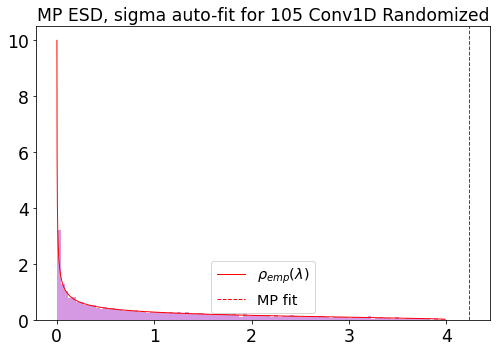

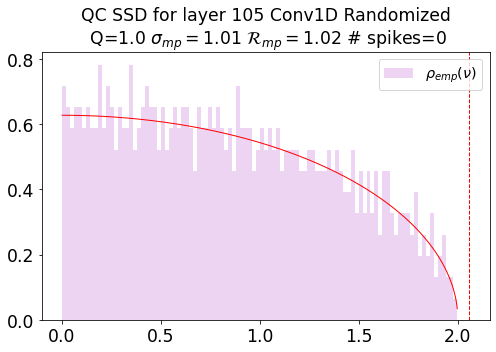

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 4.01 sigma 0.33 TPL or PL? -0.0003
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 4.2481 sigma 0.3631 TPL or PL? 1.1834
INFO:weightwatcher:2 fit alpha 4.25 sigma 0.36 TPL or PL? 1.1834
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 4.3542 sigma 0.3774 TPL or PL? 1.4101
INFO:weightwatcher:3 fit alpha 4.35 sigma 0.38 TPL or PL? 1.4101
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 4.4517 sigma 0.3908 TPL or PL? 1.5982
INFO:weightwatcher:4 fit alpha 4.45 sigma 0.39 TPL or PL? 1.5982
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 4.5535 sigma 0.4050 TPL or PL? 1.8159
INFO:weightwatcher:5 fit alpha 4.55 sigma 0.40 TPL or PL? 1.8159
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 4.6537 sigma 0.4191 TPL or PL?

checking alpha


INFO:weightwatcher:checking fit 10 xmax 200.6012  alpha 5.35 sigma 0.58
INFO:weightwatcher:checking fit 11 xmax 200.5691  alpha 5.35 sigma 0.58
INFO:weightwatcher:checking fit 12 xmax 195.5026  alpha 5.35 sigma 0.58


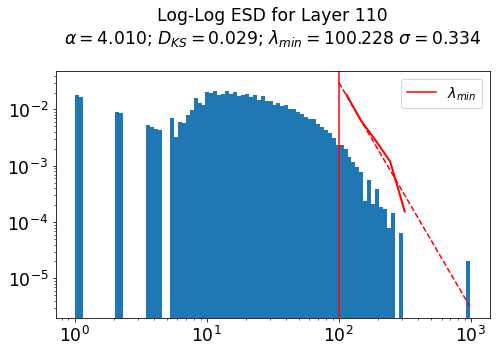

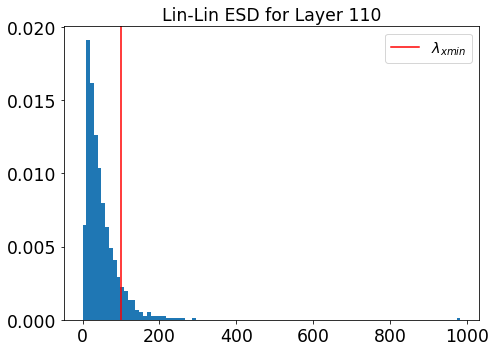

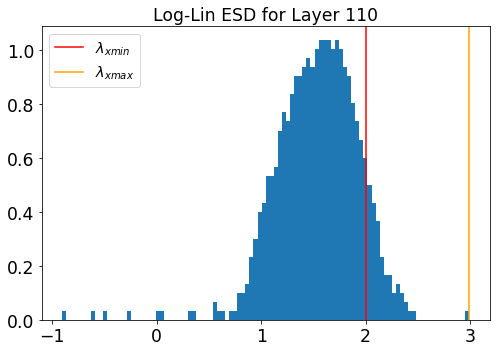

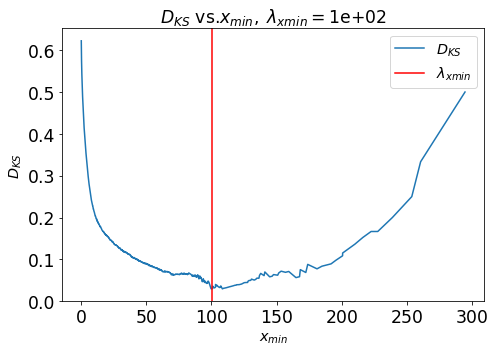

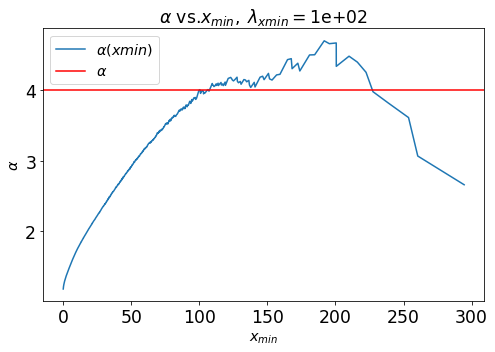

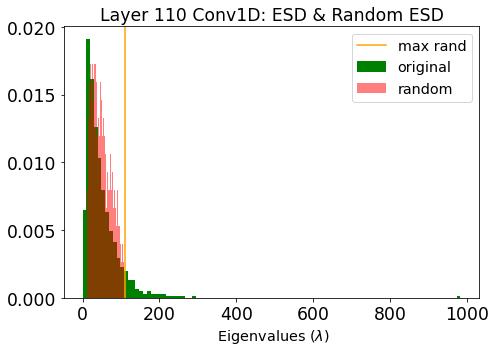

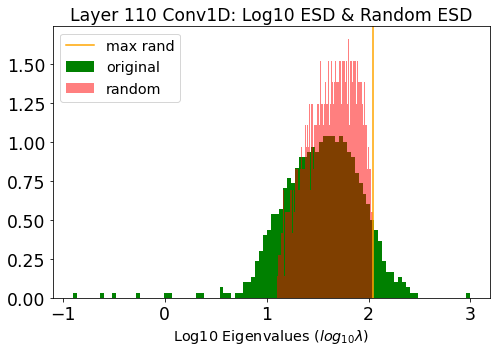

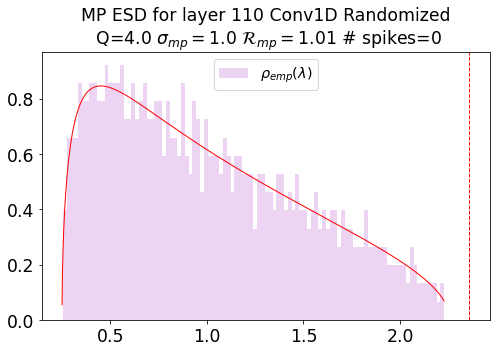

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 4.18 sigma 0.37 TPL or PL? -0.0048
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 4.4483 sigma 0.4064 TPL or PL? 0.0921
INFO:weightwatcher:2 fit alpha 4.45 sigma 0.41 TPL or PL? 0.0921
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 4.6887 sigma 0.4378 TPL or PL? 0.8956
INFO:weightwatcher:3 fit alpha 4.69 sigma 0.44 TPL or PL? 0.8956
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 4.8519 sigma 0.4604 TPL or PL? 1.4208
INFO:weightwatcher:4 fit alpha 4.85 sigma 0.46 TPL or PL? 1.4208
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 4.9889 sigma 0.4802 TPL or PL? 1.7198
INFO:weightwatcher:5 fit alpha 4.99 sigma 0.48 TPL or PL? 1.7198
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 5.1312 sigma 0.5010 TPL or PL?

checking alpha


INFO:weightwatcher:checking fit 10 xmax 216.4591  alpha 5.43 sigma 0.54
INFO:weightwatcher:checking fit 11 xmax 202.8983  alpha 5.43 sigma 0.54
INFO:weightwatcher:checking fit 12 xmax 200.5314  alpha 5.43 sigma 0.54


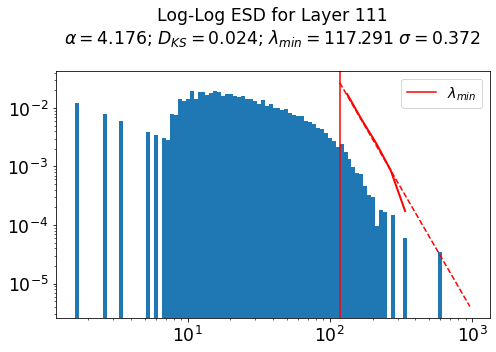

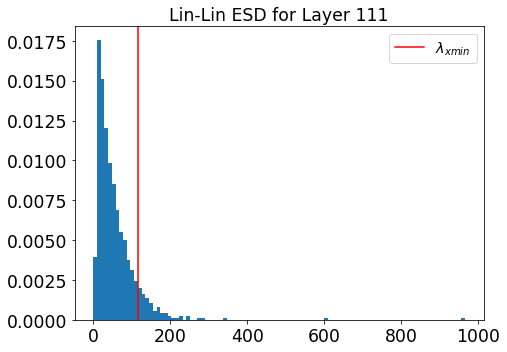

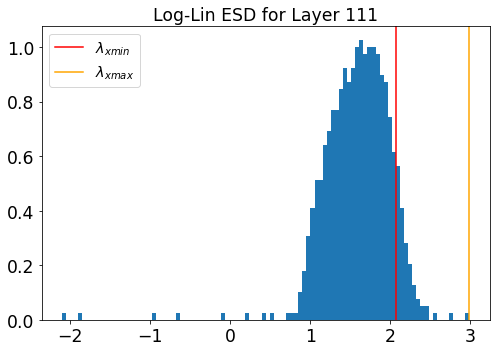

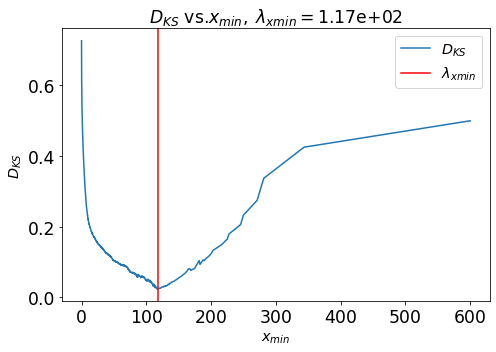

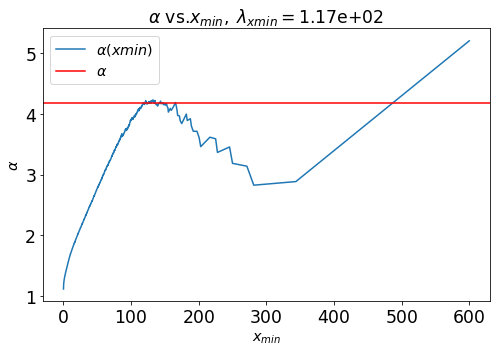

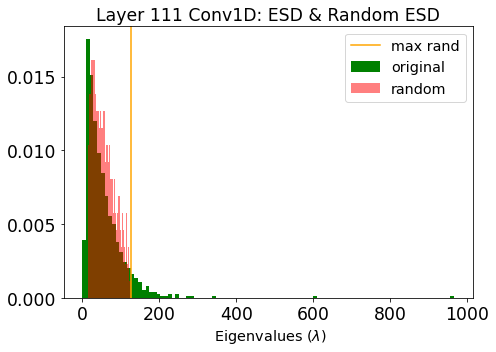

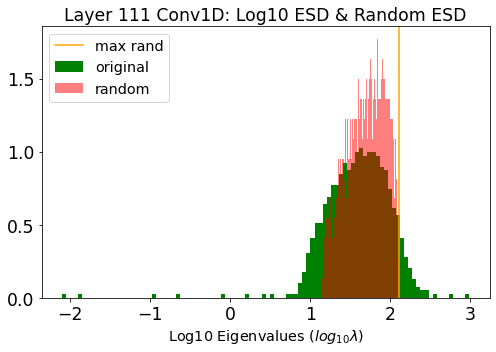

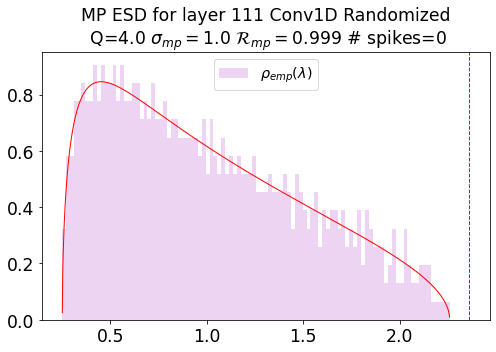

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 4.60 sigma 0.35 TPL or PL? 1.4893
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 4.5311 sigma 0.3264 TPL or PL? 2.8476
INFO:weightwatcher:2 fit alpha 4.53 sigma 0.33 TPL or PL? 2.8476
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 4.6052 sigma 0.3347 TPL or PL? 3.2432
INFO:weightwatcher:3 fit alpha 4.61 sigma 0.33 TPL or PL? 3.2432
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 4.6750 sigma 0.3427 TPL or PL? 3.5107
INFO:weightwatcher:4 fit alpha 4.67 sigma 0.34 TPL or PL? 3.5107
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 4.7385 sigma 0.3501 TPL or PL? 3.6606
INFO:weightwatcher:5 fit alpha 4.74 sigma 0.35 TPL or PL? 3.6606
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 4.8029 sigma 0.3577 TPL or PL? 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 127.4011  alpha 5.00 sigma 0.38
INFO:weightwatcher:checking fit 11 xmax 126.9689  alpha 5.00 sigma 0.38
INFO:weightwatcher:checking fit 12 xmax 121.2405  alpha 5.00 sigma 0.38


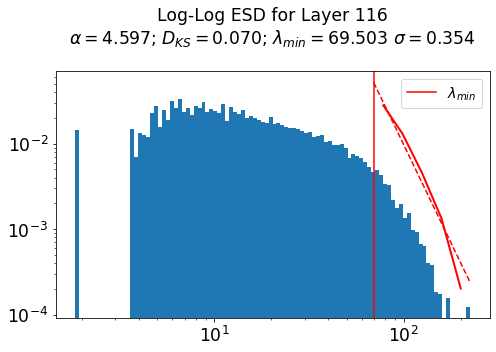

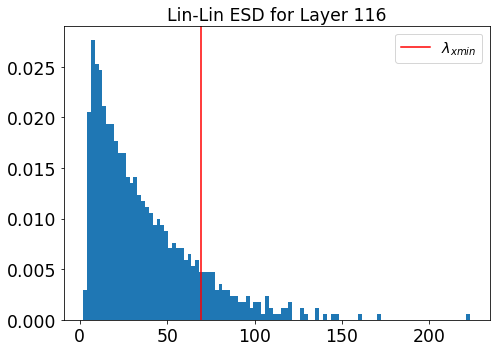

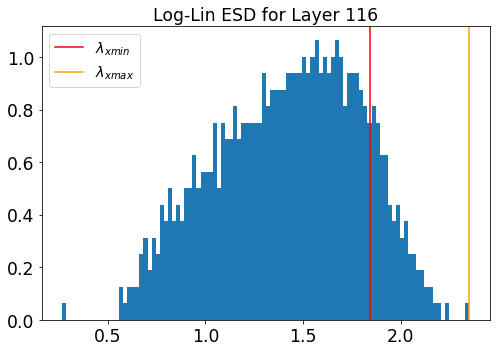

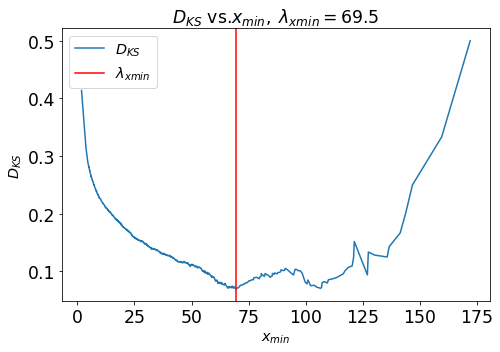

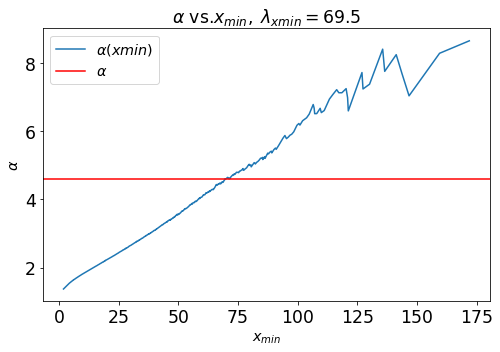

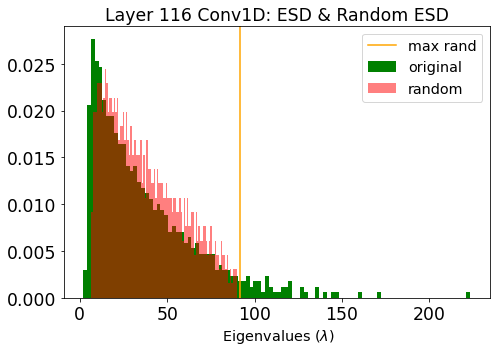

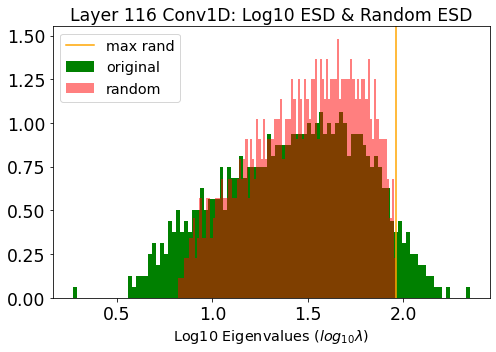

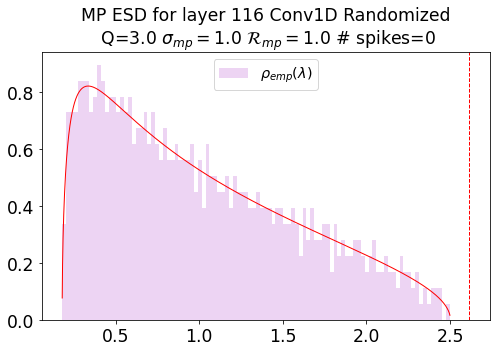

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 5.49 sigma 0.55 TPL or PL? -0.0002
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 11.1914 sigma 2.0803 TPL or PL? -0.0000
INFO:weightwatcher:2 fit alpha 11.19 sigma 2.08 TPL or PL? -0.0000
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 12.7288 sigma 2.3002 TPL or PL? 1.1051
INFO:weightwatcher:3 fit alpha 12.73 sigma 2.30 TPL or PL? 1.1051
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 13.9755 sigma 2.5951 TPL or PL? 1.7129
INFO:weightwatcher:4 fit alpha 13.98 sigma 2.60 TPL or PL? 1.7129
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 15.1210 sigma 2.8824 TPL or PL? 2.0060
INFO:weightwatcher:5 fit alpha 15.12 sigma 2.88 TPL or PL? 2.0060
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 17.7675 sigma 3.7493

checking alpha


INFO:weightwatcher:checking fit 10 xmax 55.8987  alpha 22.51 sigma 5.22


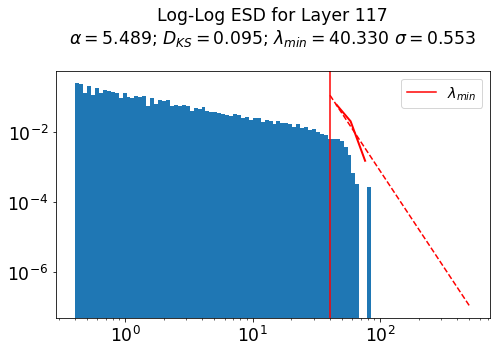

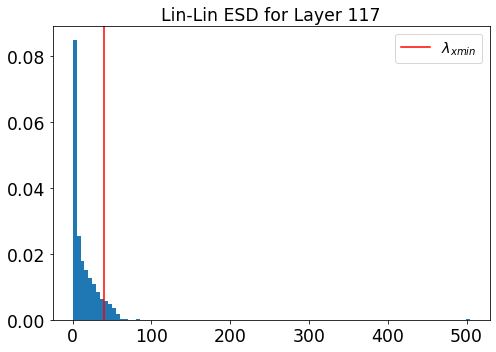

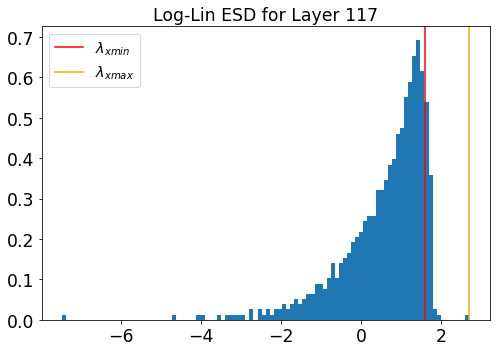

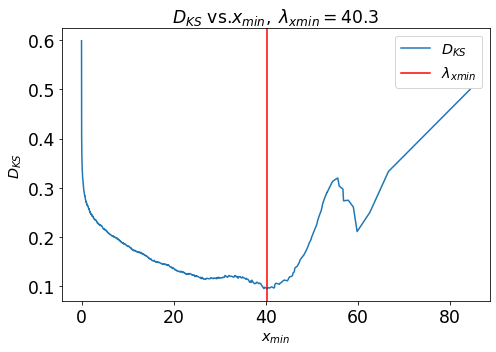

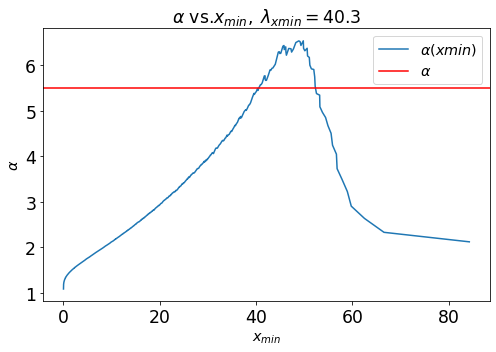

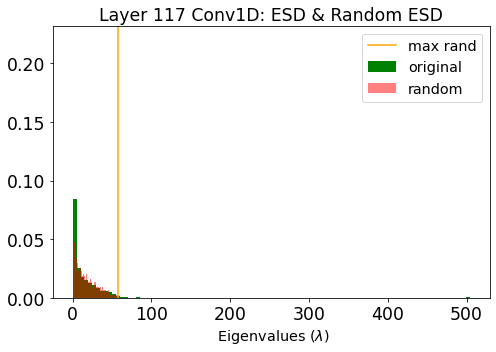

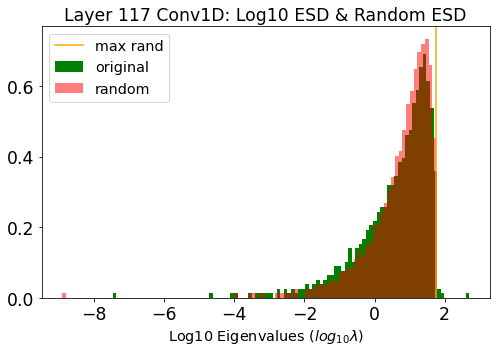

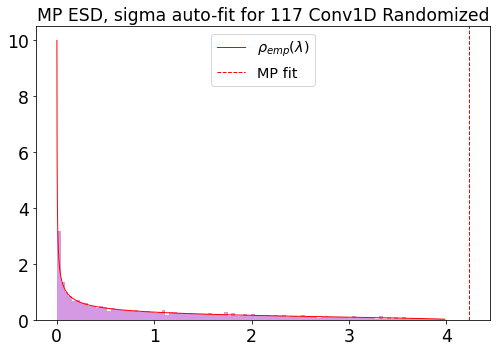

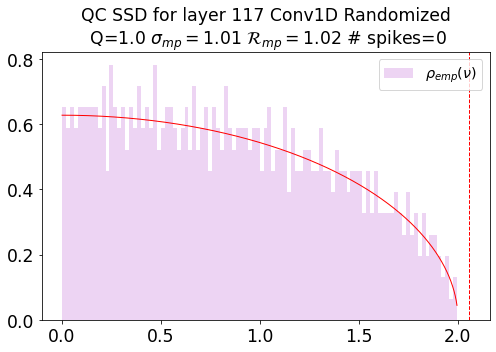

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.67 sigma 0.24 TPL or PL? 0.1162
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.7187 sigma 0.2394 TPL or PL? 1.9617
INFO:weightwatcher:2 fit alpha 3.72 sigma 0.24 TPL or PL? 1.9617
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.8069 sigma 0.2511 TPL or PL? 2.0997
INFO:weightwatcher:3 fit alpha 3.81 sigma 0.25 TPL or PL? 2.0997
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.8612 sigma 0.2569 TPL or PL? 2.3801
INFO:weightwatcher:4 fit alpha 3.86 sigma 0.26 TPL or PL? 2.3801
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.9162 sigma 0.2629 TPL or PL? 2.6705
INFO:weightwatcher:5 fit alpha 3.92 sigma 0.26 TPL or PL? 2.6705
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.9675 sigma 0.2687 TPL or PL? 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 207.3884  alpha 4.12 sigma 0.29
INFO:weightwatcher:checking fit 11 xmax 200.8905  alpha 4.12 sigma 0.29
INFO:weightwatcher:checking fit 12 xmax 197.9558  alpha 4.12 sigma 0.29


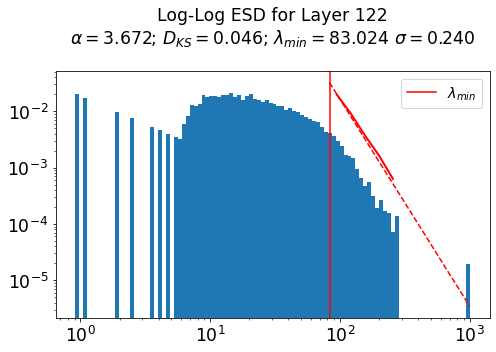

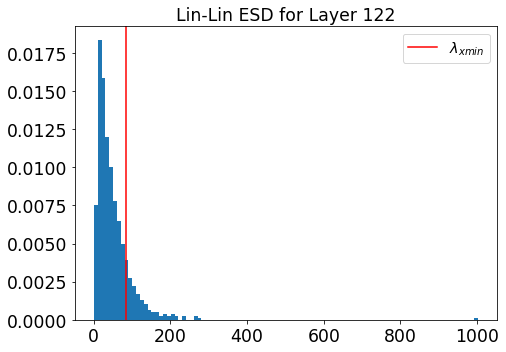

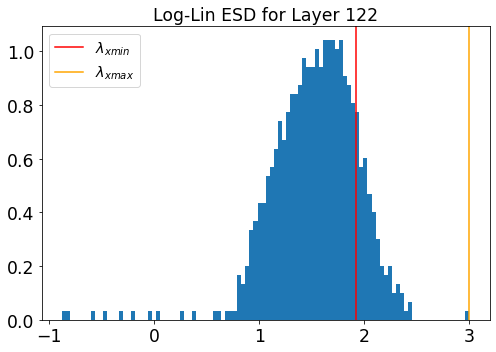

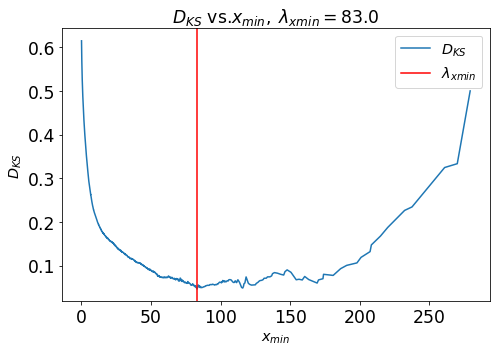

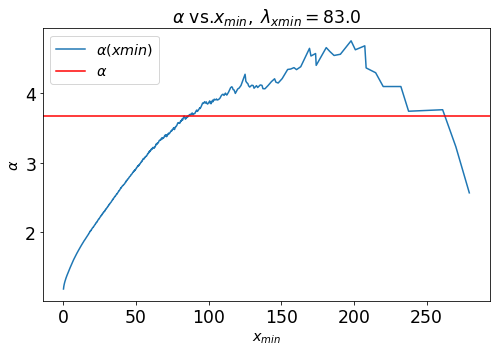

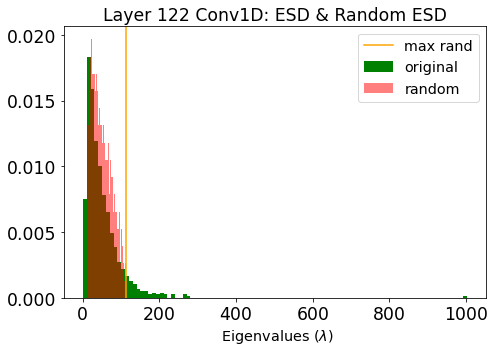

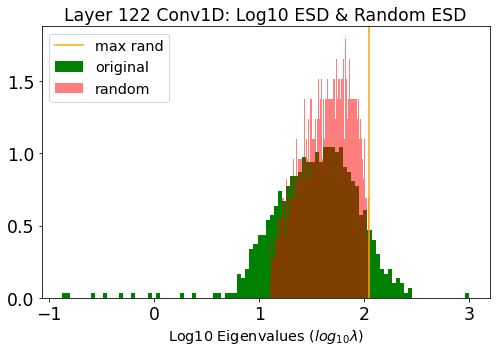

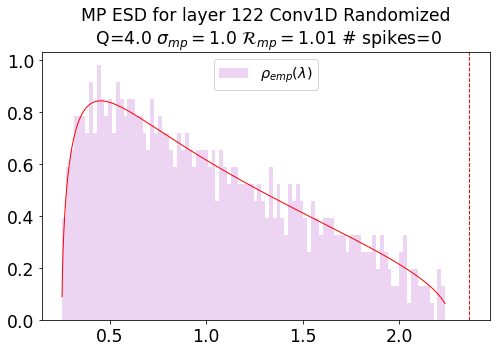

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 4.61 sigma 0.53 TPL or PL? -0.0002
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 5.0336 sigma 0.5648 TPL or PL? 0.5512
INFO:weightwatcher:2 fit alpha 5.03 sigma 0.56 TPL or PL? 0.5512
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 4.7338 sigma 0.4098 TPL or PL? 1.4941
INFO:weightwatcher:3 fit alpha 4.73 sigma 0.41 TPL or PL? 1.4941
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 4.8575 sigma 0.4260 TPL or PL? 2.0171
INFO:weightwatcher:4 fit alpha 4.86 sigma 0.43 TPL or PL? 2.0171
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 4.9680 sigma 0.4409 TPL or PL? 2.2477
INFO:weightwatcher:5 fit alpha 4.97 sigma 0.44 TPL or PL? 2.2477
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 5.0818 sigma 0.4564 TPL or PL?

checking alpha


INFO:weightwatcher:checking fit 10 xmax 277.5709  alpha 5.43 sigma 0.50
INFO:weightwatcher:checking fit 11 xmax 267.5744  alpha 5.43 sigma 0.50
INFO:weightwatcher:checking fit 12 xmax 265.9157  alpha 5.43 sigma 0.50


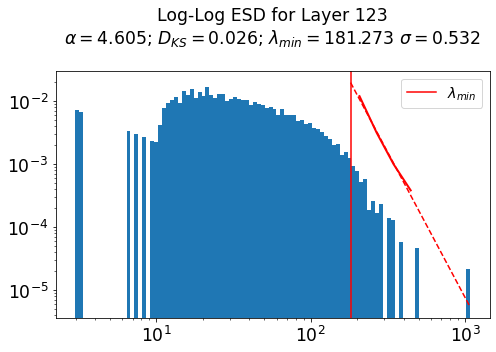

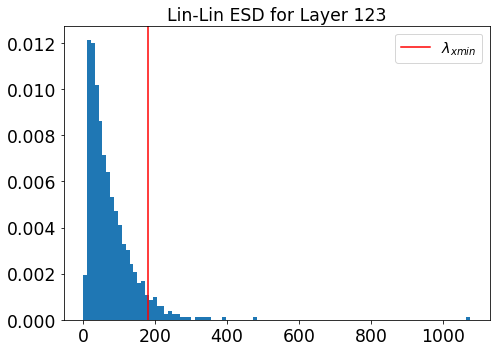

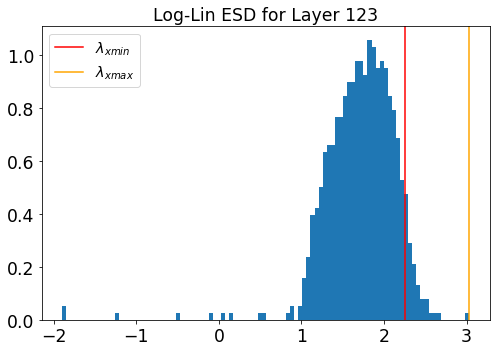

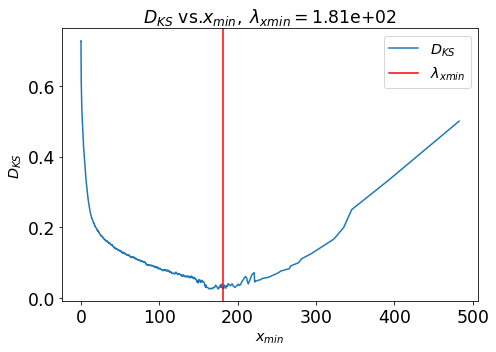

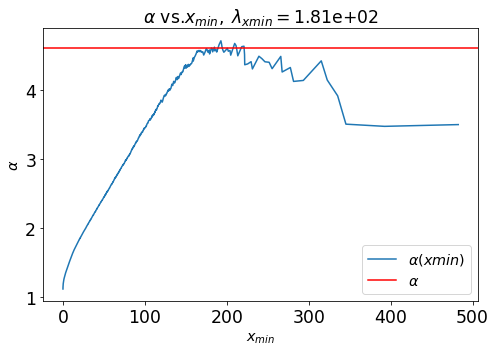

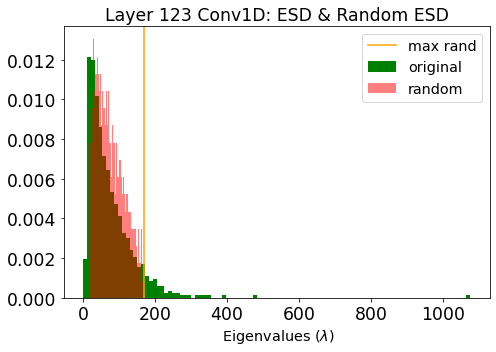

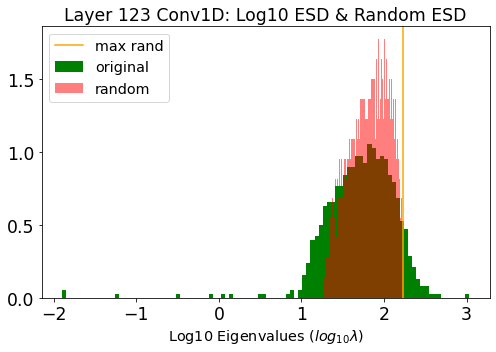

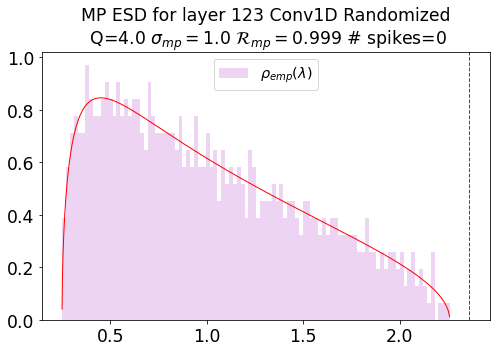

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 6.25 sigma 0.81 TPL or PL? 0.4528
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 6.6690 sigma 0.8854 TPL or PL? 1.0573
INFO:weightwatcher:2 fit alpha 6.67 sigma 0.89 TPL or PL? 1.0573
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 7.0755 sigma 0.9606 TPL or PL? 1.8324
INFO:weightwatcher:3 fit alpha 7.08 sigma 0.96 TPL or PL? 1.8324
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 7.4147 sigma 1.0272 TPL or PL? 2.1261
INFO:weightwatcher:4 fit alpha 7.41 sigma 1.03 TPL or PL? 2.1261
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 7.1966 sigma 0.9136 TPL or PL? 2.5143
INFO:weightwatcher:5 fit alpha 7.20 sigma 0.91 TPL or PL? 2.5143
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 8.0630 sigma 1.1612 TPL or PL? 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 138.3192  alpha 9.17 sigma 1.40


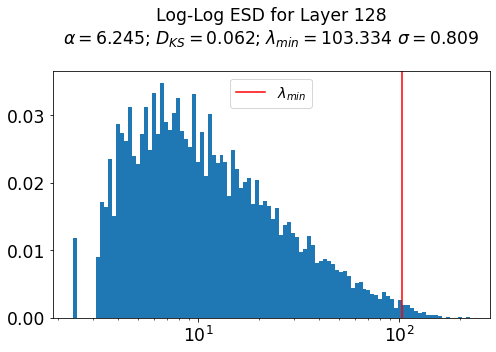

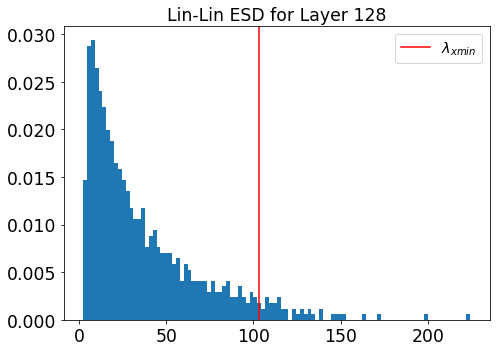

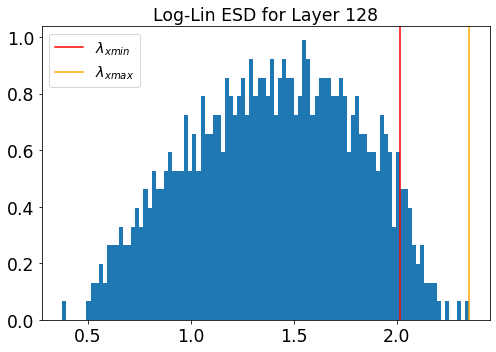

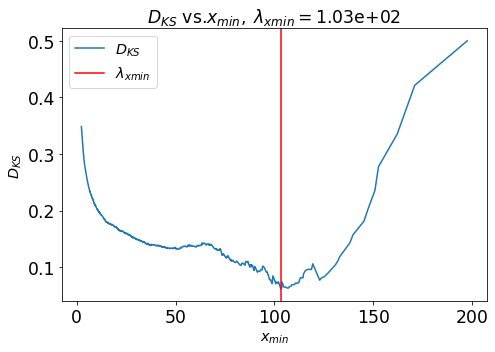

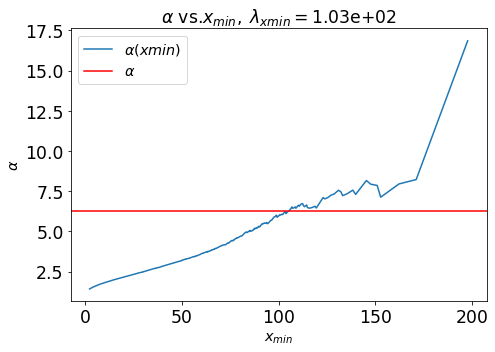

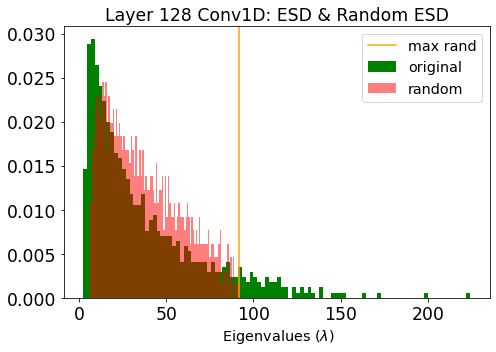

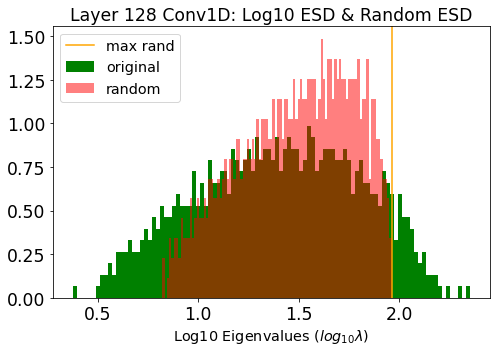

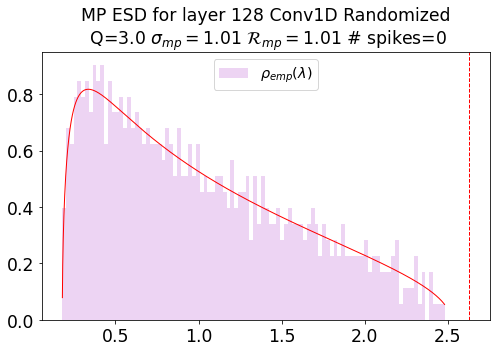

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 4.96 sigma 0.40 TPL or PL? -0.0030
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 8.6350 sigma 1.2072 TPL or PL? 0.1103
INFO:weightwatcher:2 fit alpha 8.64 sigma 1.21 TPL or PL? 0.1103
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 9.2257 sigma 1.2693 TPL or PL? 1.1803
INFO:weightwatcher:3 fit alpha 9.23 sigma 1.27 TPL or PL? 1.1803
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 9.7468 sigma 1.3660 TPL or PL? 1.5405
INFO:weightwatcher:4 fit alpha 9.75 sigma 1.37 TPL or PL? 1.5405
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 10.3240 sigma 1.4743 TPL or PL? 2.0944
INFO:weightwatcher:5 fit alpha 10.32 sigma 1.47 TPL or PL? 2.0944
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 10.9099 sigma 1.5868 TPL or 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 53.0949  alpha 12.45 sigma 1.91


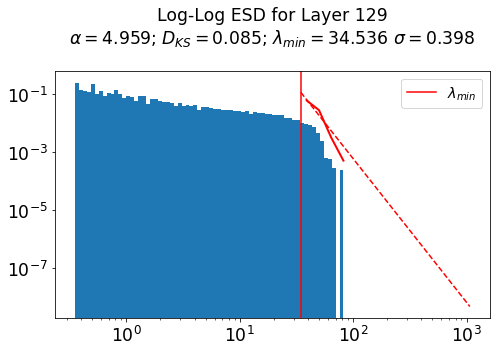

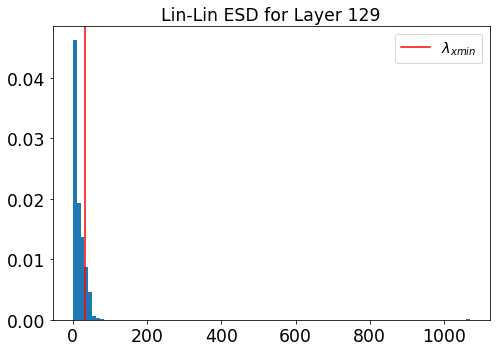

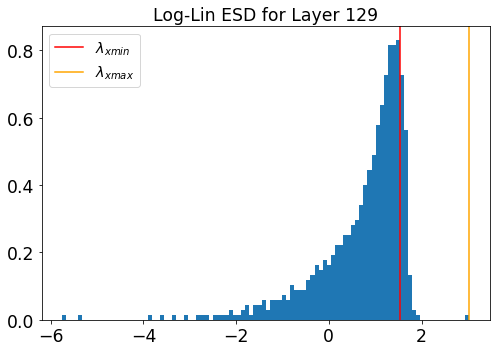

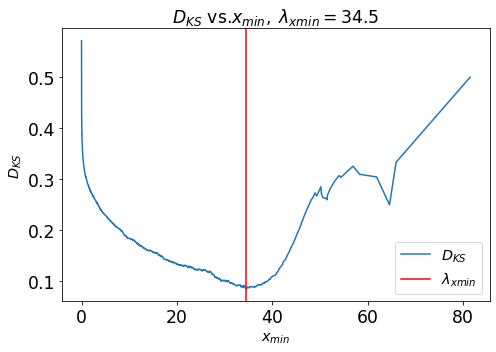

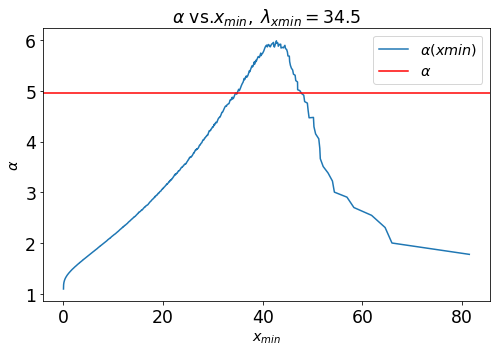

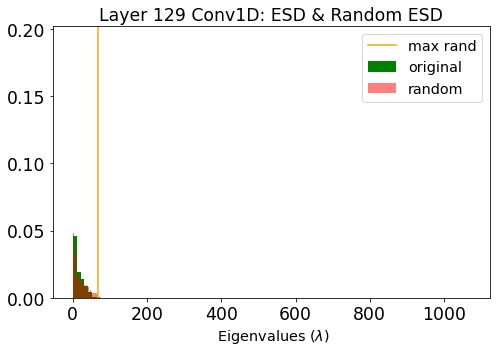

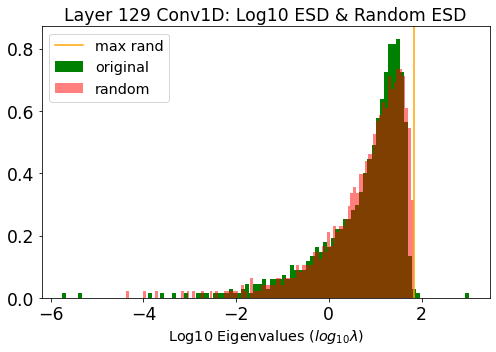

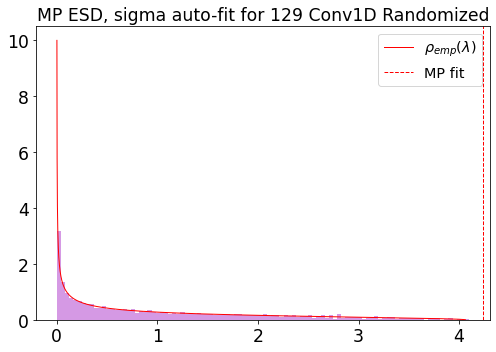

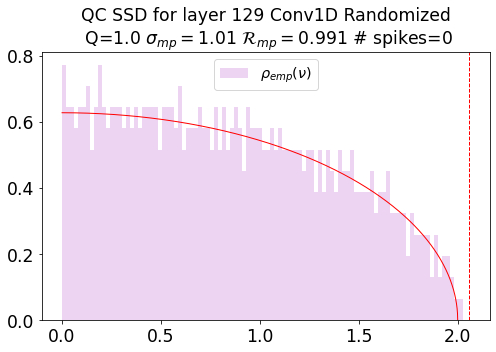

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.59 sigma 0.26 TPL or PL? 0.0893
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.6550 sigma 0.2434 TPL or PL? 1.5771
INFO:weightwatcher:2 fit alpha 3.66 sigma 0.24 TPL or PL? 1.5771
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.7111 sigma 0.2496 TPL or PL? 1.6613
INFO:weightwatcher:3 fit alpha 3.71 sigma 0.25 TPL or PL? 1.6613
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.7631 sigma 0.2555 TPL or PL? 1.6916
INFO:weightwatcher:4 fit alpha 3.76 sigma 0.26 TPL or PL? 1.6916
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.8176 sigma 0.2616 TPL or PL? 1.7922
INFO:weightwatcher:5 fit alpha 3.82 sigma 0.26 TPL or PL? 1.7922
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.8733 sigma 0.2679 TPL or PL? 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 221.6252  alpha 4.04 sigma 0.29
INFO:weightwatcher:checking fit 11 xmax 215.5151  alpha 4.04 sigma 0.29
INFO:weightwatcher:checking fit 12 xmax 213.9539  alpha 4.04 sigma 0.29


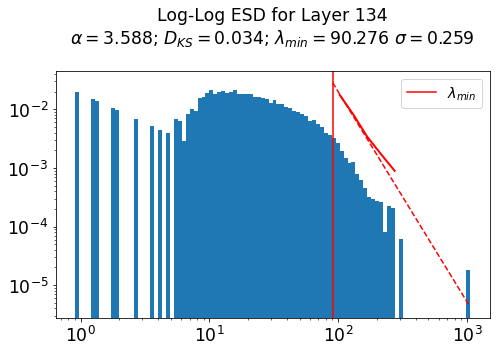

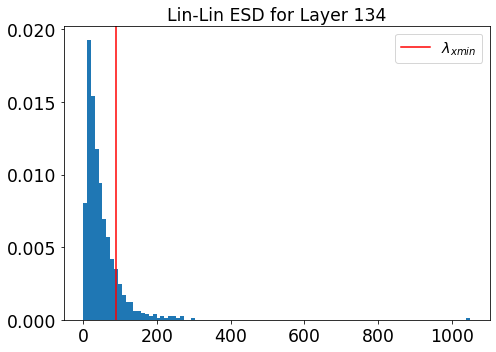

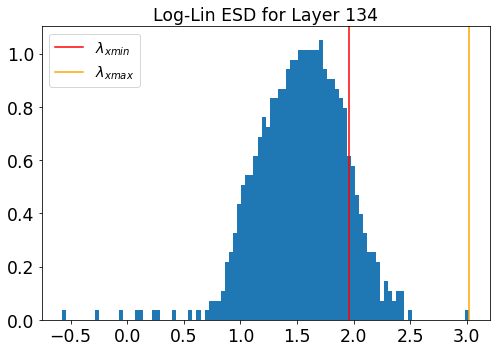

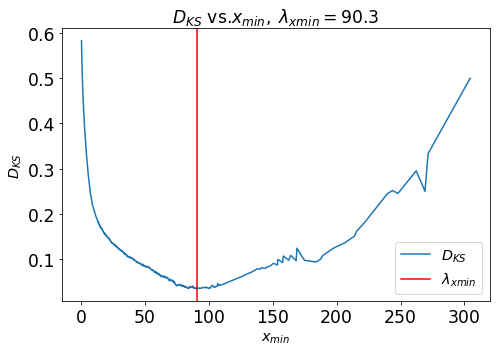

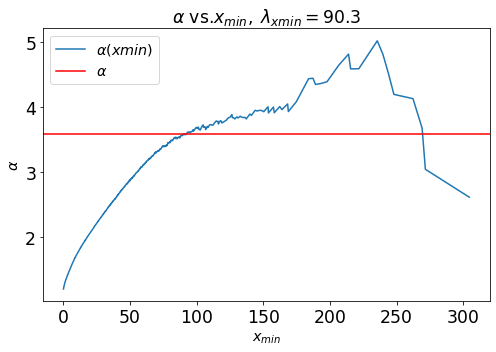

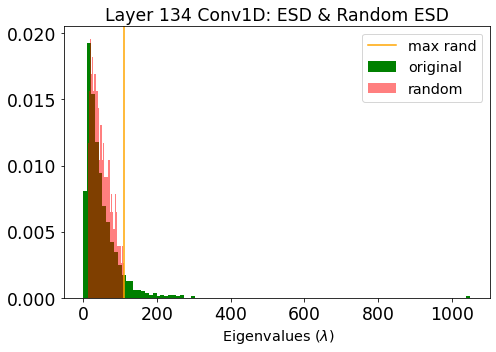

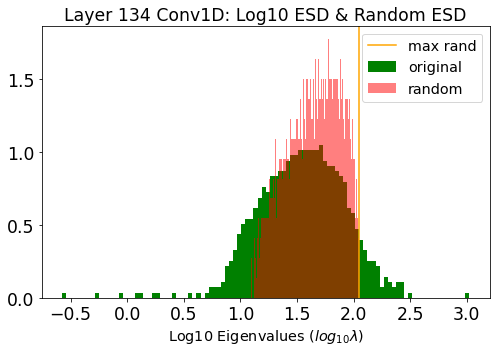

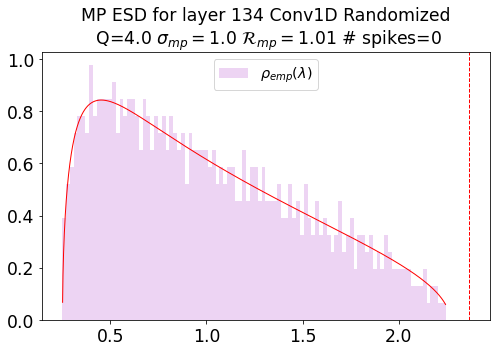

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 4.53 sigma 0.39 TPL or PL? -0.0005
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 4.8830 sigma 0.4369 TPL or PL? 0.2721
INFO:weightwatcher:2 fit alpha 4.88 sigma 0.44 TPL or PL? 0.2721
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 4.9131 sigma 0.4102 TPL or PL? 1.9276
INFO:weightwatcher:3 fit alpha 4.91 sigma 0.41 TPL or PL? 1.9276
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 4.9747 sigma 0.4144 TPL or PL? 2.5004
INFO:weightwatcher:4 fit alpha 4.97 sigma 0.41 TPL or PL? 2.5004
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 5.0751 sigma 0.4272 TPL or PL? 2.7922
INFO:weightwatcher:5 fit alpha 5.08 sigma 0.43 TPL or PL? 2.7922
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 5.1730 sigma 0.4399 TPL or PL?

checking alpha


INFO:weightwatcher:checking fit 10 xmax 329.7218  alpha 5.46 sigma 0.48
INFO:weightwatcher:checking fit 11 xmax 322.6866  alpha 5.46 sigma 0.48
INFO:weightwatcher:checking fit 12 xmax 316.4582  alpha 5.46 sigma 0.48


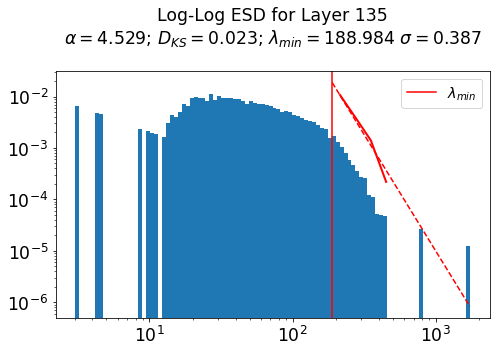

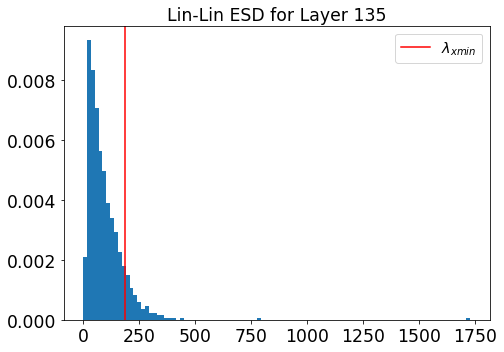

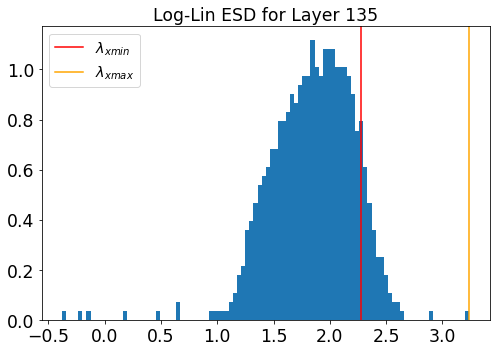

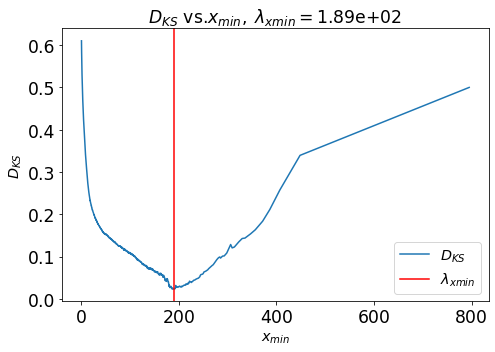

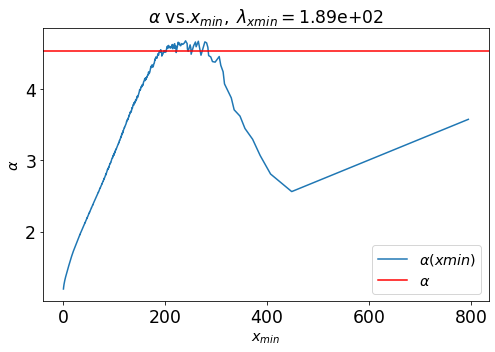

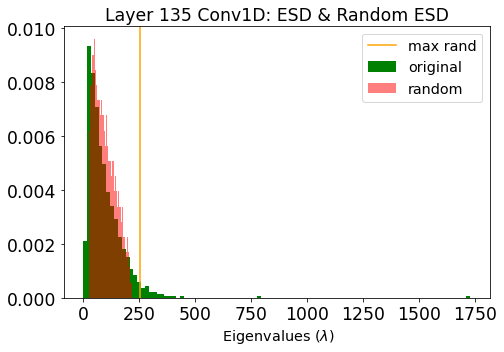

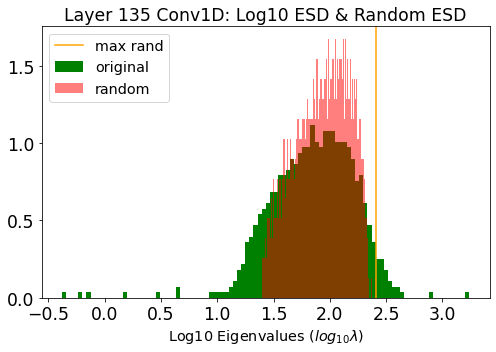

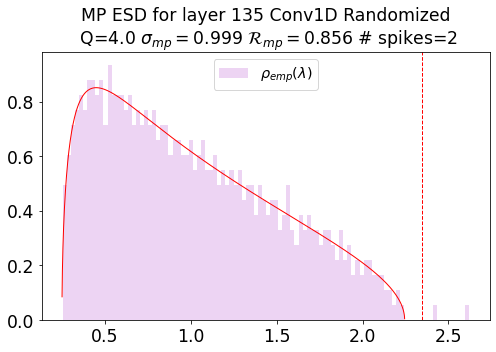

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 5.86 sigma 0.62 TPL or PL? 0.7516
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 7.4367 sigma 1.1752 TPL or PL? 0.2865
INFO:weightwatcher:2 fit alpha 7.44 sigma 1.18 TPL or PL? 0.2865
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 8.2460 sigma 1.3694 TPL or PL? 0.4013
INFO:weightwatcher:3 fit alpha 8.25 sigma 1.37 TPL or PL? 0.4013
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 10.0293 sigma 1.8827 TPL or PL? 0.3349
INFO:weightwatcher:4 fit alpha 10.03 sigma 1.88 TPL or PL? 0.3349
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 12.7383 sigma 3.0308 TPL or PL? 0.1478
INFO:weightwatcher:5 fit alpha 12.74 sigma 3.03 TPL or PL? 0.1478
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 7.0860 sigma 0.8133 TPL or 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 144.1315  alpha 7.66 sigma 0.92


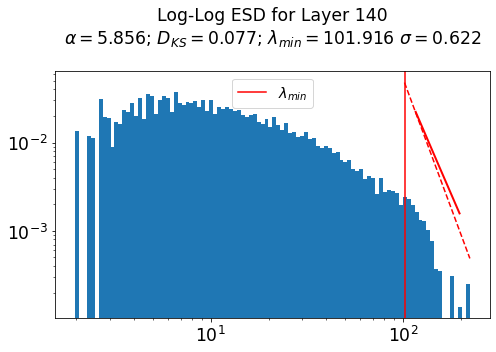

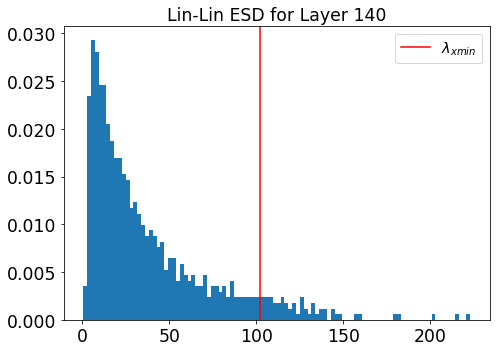

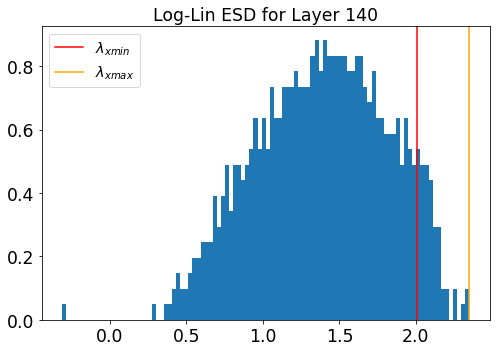

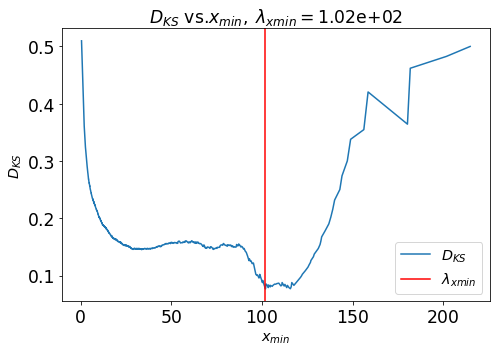

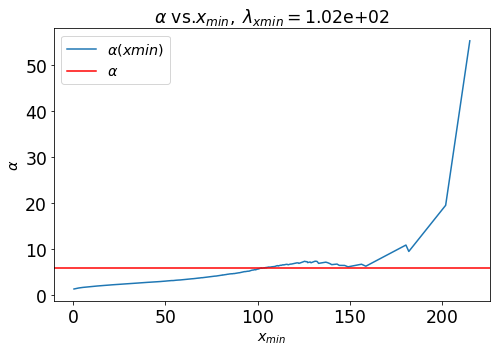

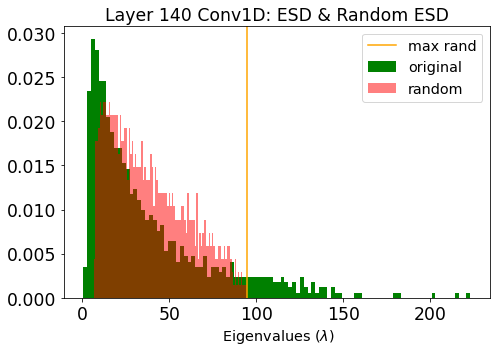

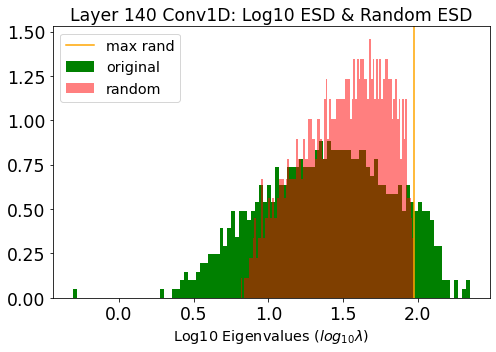

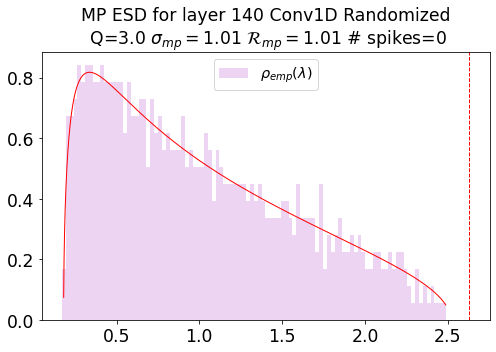

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 2.99 sigma 0.13 TPL or PL? -0.0008
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.0669 sigma 0.1397 TPL or PL? -0.0007
INFO:weightwatcher:2 fit alpha 3.07 sigma 0.14 TPL or PL? -0.0007
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.4491 sigma 0.1831 TPL or PL? -0.0009
INFO:weightwatcher:3 fit alpha 3.45 sigma 0.18 TPL or PL? -0.0009
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.7069 sigma 0.2133 TPL or PL? -0.0012
INFO:weightwatcher:4 fit alpha 3.71 sigma 0.21 TPL or PL? -0.0012
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 4.1318 sigma 0.2695 TPL or PL? -0.0014
INFO:weightwatcher:5 fit alpha 4.13 sigma 0.27 TPL or PL? -0.0014
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 4.6194 sigma 0.3405 TP

checking alpha


INFO:weightwatcher:checking fit 10 xmax 81.4639  alpha 8.09 sigma 1.11


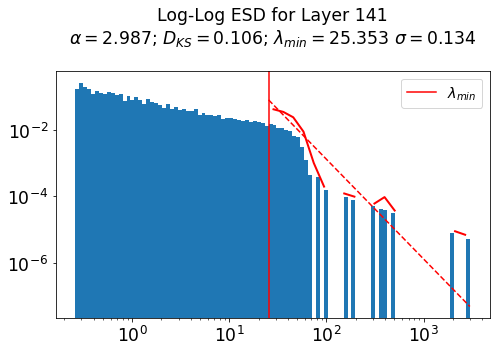

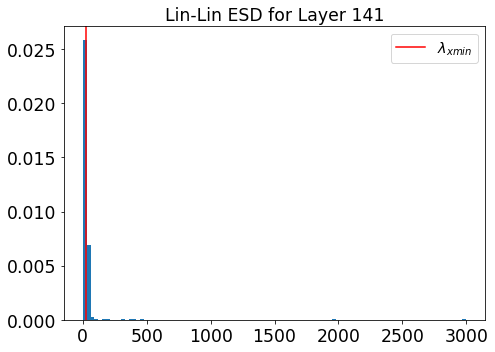

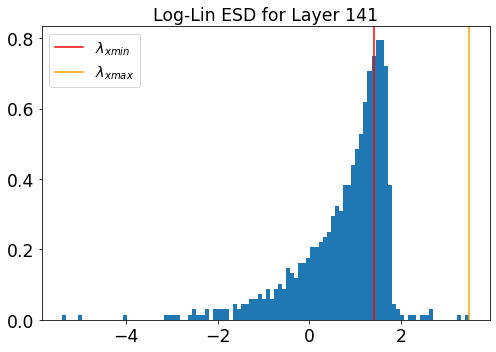

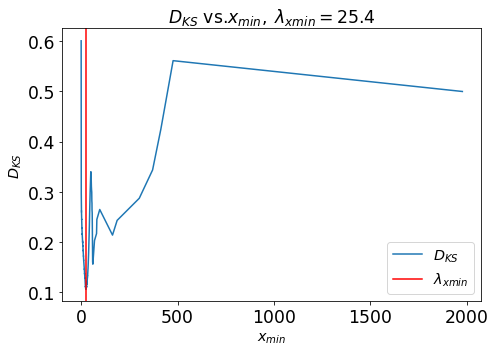

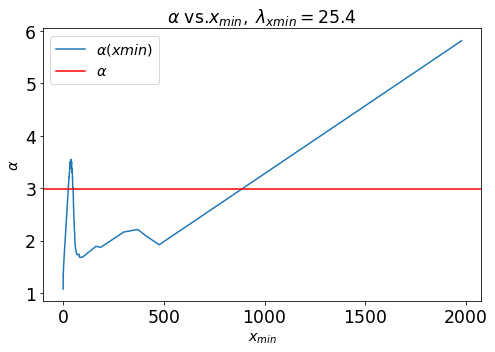

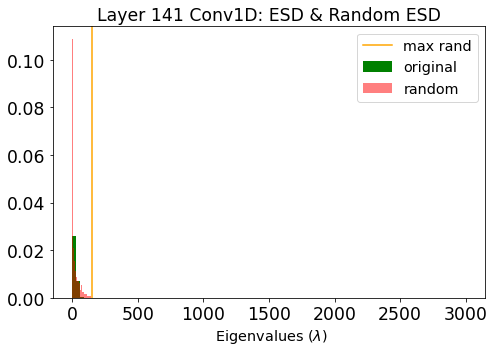

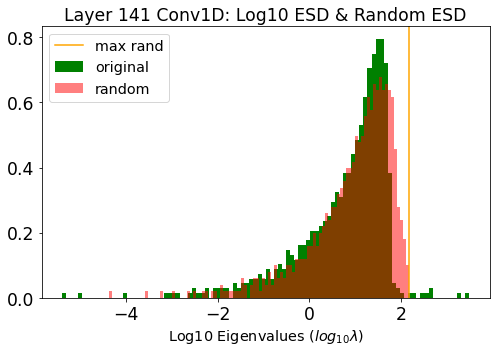

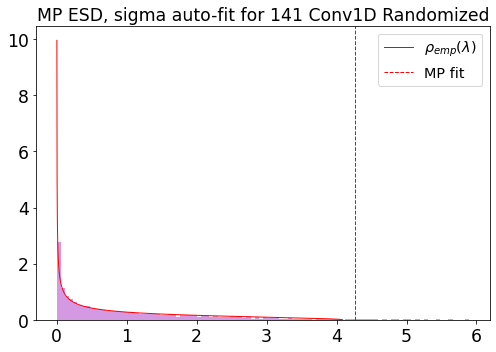

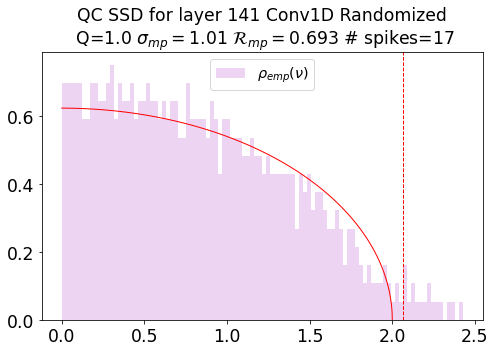

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.39 sigma 0.24 TPL or PL? -0.0006
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.3697 sigma 0.2025 TPL or PL? 1.3121
INFO:weightwatcher:2 fit alpha 3.37 sigma 0.20 TPL or PL? 1.3121
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.4262 sigma 0.2080 TPL or PL? 1.6172
INFO:weightwatcher:3 fit alpha 3.43 sigma 0.21 TPL or PL? 1.6172
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.4745 sigma 0.2130 TPL or PL? 1.7370
INFO:weightwatcher:4 fit alpha 3.47 sigma 0.21 TPL or PL? 1.7370
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.5222 sigma 0.2179 TPL or PL? 1.8505
INFO:weightwatcher:5 fit alpha 3.52 sigma 0.22 TPL or PL? 1.8505
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.5324 sigma 0.2180 TPL or PL?

checking alpha


INFO:weightwatcher:checking fit 10 xmax 246.8131  alpha 3.70 sigma 0.24
INFO:weightwatcher:checking fit 11 xmax 237.7314  alpha 3.70 sigma 0.24
INFO:weightwatcher:checking fit 12 xmax 232.0690  alpha 3.70 sigma 0.24


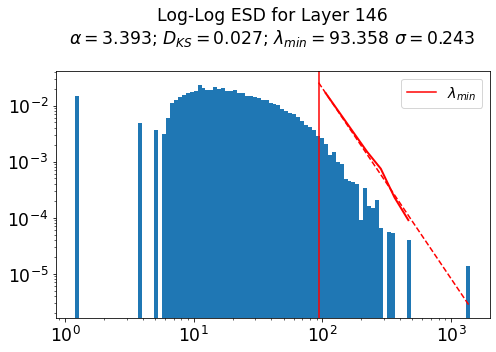

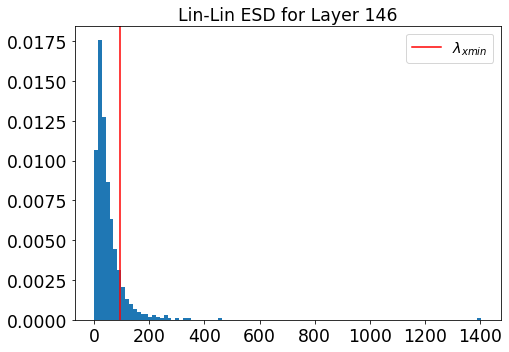

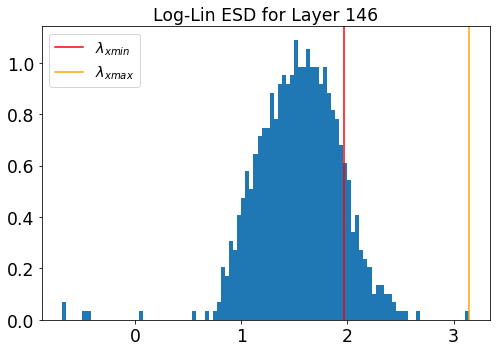

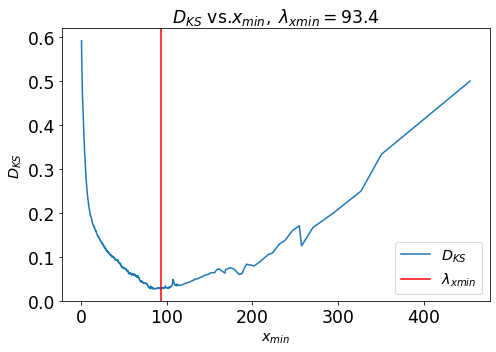

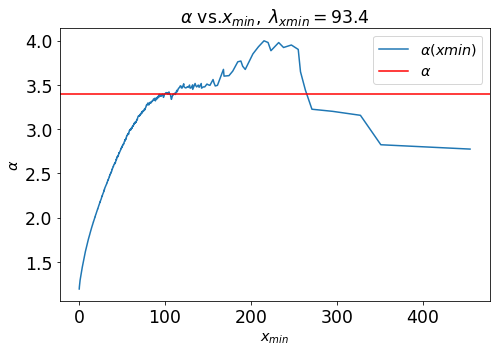

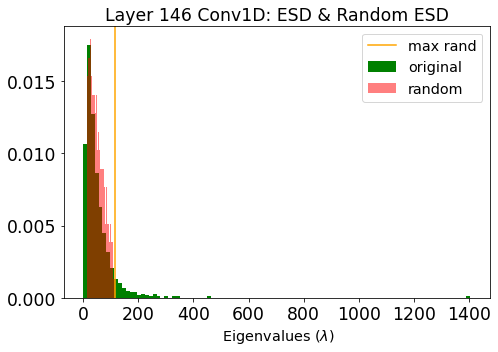

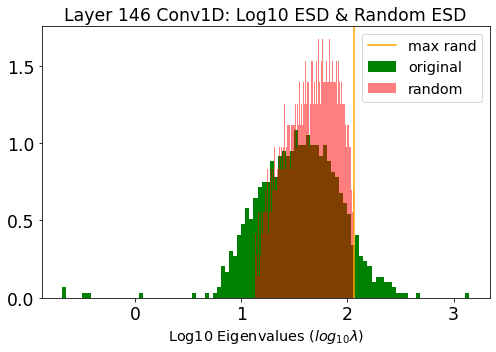

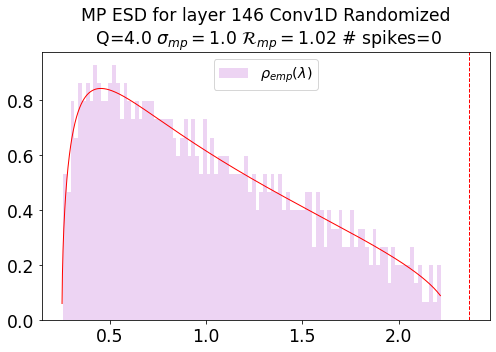

INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 4.22 sigma 0.28 TPL or PL? -0.0007
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 4.8551 sigma 0.4157 TPL or PL? -0.0006
INFO:weightwatcher:2 fit alpha 4.86 sigma 0.42 TPL or PL? -0.0006
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 5.3622 sigma 0.6108 TPL or PL? -0.0002
INFO:weightwatcher:3 fit alpha 5.36 sigma 0.61 TPL or PL? -0.0002
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 5.6593 sigma 0.5779 TPL or PL? 0.9214
INFO:weightwatcher:4 fit alpha 5.66 sigma 0.58 TPL or PL? 0.9214
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 5.9314 sigma 0.6420 TPL or PL? 1.0742
INFO:weightwatcher:5 fit alpha 5.93 sigma 0.64 TPL or PL? 1.0742
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 6.1379 sigma 0.6746 TPL or

checking alpha


INFO:weightwatcher:checking fit 10 xmax 400.4069  alpha 7.09 sigma 0.90
INFO:weightwatcher:checking fit 11 xmax 372.8801  alpha 7.09 sigma 0.90


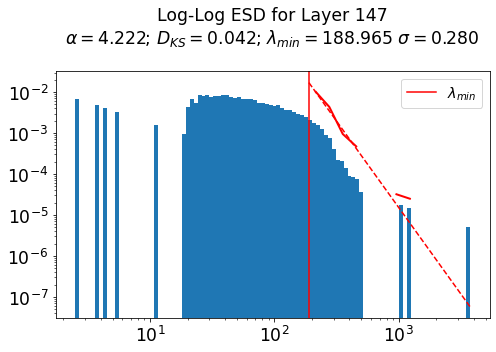

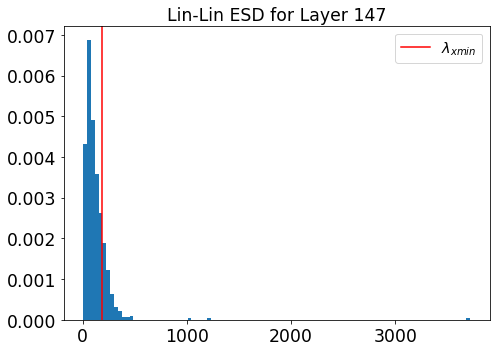

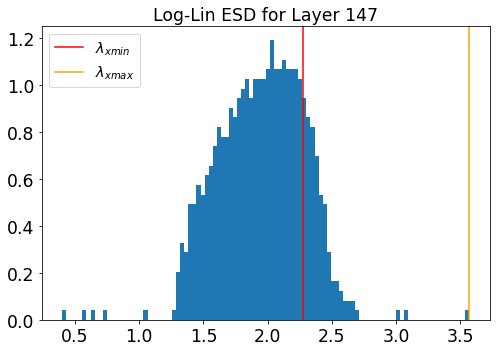

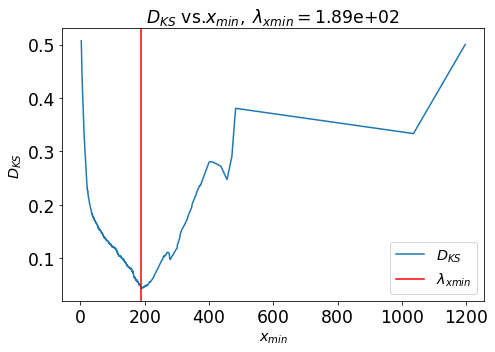

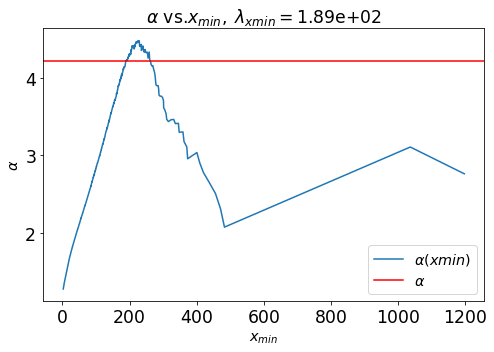

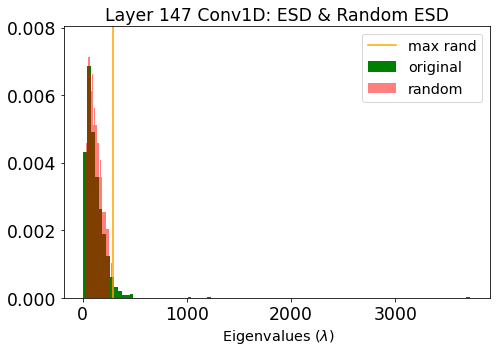

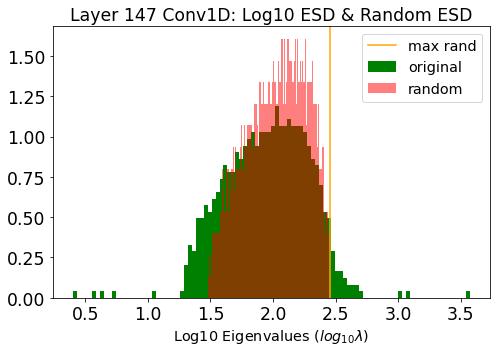

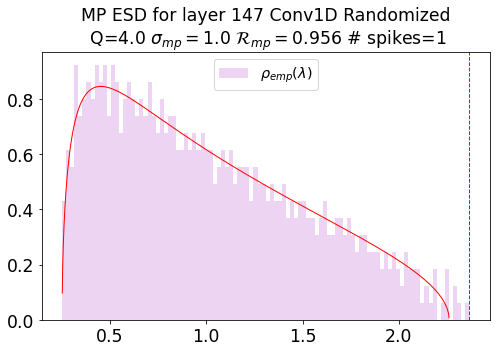

<Figure size 504x360 with 0 Axes>

In [20]:
watcher = ww.WeightWatcher(model=gpt2_model)
gpt2_details = watcher.analyze(randomize=True, fix_fingers='clip_xmax', plot=True)

In [22]:
gpt2_details

layer_id       name         D  Lambda      M        N          Q     alpha  \
0        1  Embedding  0.037722    -1.0  768.0  50257.0  65.438802  3.505816   
0        2  Embedding  0.075823    -1.0  768.0   1024.0   1.333333  1.552344   
0        8     Conv1D  0.062933    -1.0  768.0   2304.0   3.000000  2.550805   
0        9     Conv1D  0.043904    -1.0  768.0    768.0   1.000000  2.742424   
0       14     Conv1D  0.042468    -1.0  768.0   3072.0   4.000000  3.975026   
0       15     Conv1D  0.061788    -1.0  768.0   3072.0   4.000000  3.297330   
0       20     Conv1D  0.052093    -1.0  768.0   2304.0   3.000000  3.157243   
0       21     Conv1D  0.059627    -1.0  768.0    768.0   1.000000  2.504436   
0       26     Conv1D  0.027734    -1.0  768.0   3072.0   4.000000  3.438316   
0       27     Conv1D  0.049952    -1.0  768.0   3072.0   4.000000  3.472570   
0       32     Conv1D  0.044460    -1.0  768.0   2304.0   3.000000  3.500054   
0       33     Conv1D  0.044823    -1.0  768.0    768.0   1.000000  3.577651   
0       38     Conv1D  0.033524    -1.0  768.0   3072.0   4.000000  3.186891   
0       39     Conv1D  0.016731    -1.0  768.0   3072.0   4.000000  3.319920   
0       44     Conv1D  0.044684    -1.0  768.0   2304.0   3.000000  3.178618   
0       45     Conv1D  0.037733    -1.0  768.0    768.0   1.000000  4.687984   
0       50     Conv1D  0.024581    -1.0  768.0   3072.0   4.000000  3.641985   
0       51     Conv1D  0.037751    -1.0  768.0   3072.0   4.000000  3.516280   
0       56     Conv1D  0.071978    -1.0  768.0   2304.0   3.000000  2.930732   
0       57     Conv1D  0.140159    -1.0  768.0    768.0   1.000000  3.041292   
0       62     Conv1D  0.032761    -1.0  768.0   3072.0   4.000000  3.447748   
0       63     Conv1D  0.025871    -1.0  768.0   3072.0   4.000000  3.601544   
0       68     Conv1D  0.123931    -1.0  768.0   2304.0   3.000000  2.992027   
0       69     Conv1D  0.046073    -1.0  768.0    768.0   1.000000  3.652153   
0       74     Conv1D  0.036576    -1.0  768.0   3072.0   4.000000  3.904867   
0       75     Conv1D  0.035923    -1.0  768.0   3072.0   4.000000  3.594851   
0       80     Conv1D  0.102600    -1.0  768.0   2304.0   3.000000  3.044543   
0       81     Conv1D  0.147504    -1.0  768.0    768.0   1.000000  3.183028   
0       86     Conv1D  0.036742    -1.0  768.0   3072.0   4.000000  3.504629   
0       87     Conv1D  0.029394    -1.0  768.0   3072.0   4.000000  3.874950   
0       92     Conv1D  0.097957    -1.0  768.0   2304.0   3.000000  3.583555   
0       93     Conv1D  0.116901    -1.0  768.0    768.0   1.000000  2.958019   
0       98     Conv1D  0.037294    -1.0  768.0   3072.0   4.000000  3.742642   
0       99     Conv1D  0.020242    -1.0  768.0   3072.0   4.000000  4.040663   
0      104     Conv1D  0.112425    -1.0  768.0   2304.0   3.000000  3.773202   
0      105     Conv1D  0.189924    -1.0  768.0    768.0   1.000000  2.595132   
0      110     Conv1D  0.029220    -1.0  768.0   3072.0   4.000000  4.009645   
0      111     Conv1D  0.023751    -1.0  768.0   3072.0   4.000000  4.175540   
0      116     Conv1D  0.069516    -1.0  768.0   2304.0   3.000000  4.597179   
0      117     Conv1D  0.094940    -1.0  768.0    768.0   1.000000  5.489445   
0      122     Conv1D  0.046375    -1.0  768.0   3072.0   4.000000  3.672254   
0      123     Conv1D  0.025844    -1.0  768.0   3072.0   4.000000  4.605217   
0      128     Conv1D  0.061552    -1.0  768.0   2304.0   3.000000  6.245492   
0      129     Conv1D  0.085085    -1.0  768.0    768.0   1.000000  4.959138   
0      134     Conv1D  0.034078    -1.0  768.0   3072.0   4.000000  3.588177   
0      135     Conv1D  0.023312    -1.0  768.0   3072.0   4.000000  4.528506   
0      140     Conv1D  0.076598    -1.0  768.0   2304.0   3.000000  5.856244   
0      141     Conv1D  0.106334    -1.0  768.0    768.0   1.000000  2.986867   
0      146     Conv1D  0.026974    -1.0  768.0   3072.0   4.000000  3.392998   
0 

<AxesSubplot:xlabel='alpha', ylabel='rand_distance'>

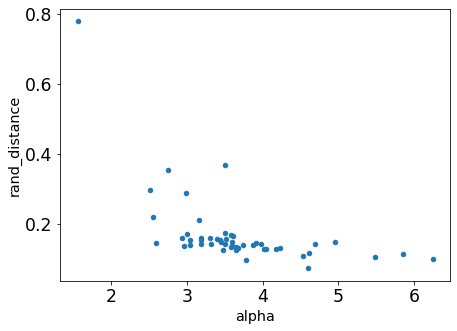

In [25]:
gpt2_details.plot.scatter(x='alpha' , y='rand_distance')


INFO:weightwatcher:

python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
torch version 1.6.0
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:Fixing fingers using  clip_xmax
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': 'clip_xmax', 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': False, 'min_evals': 50, 'max_evals': 10000, 'max_N': 10, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'glorot_fit': False, 'layers': [1], 'xmin_max': None}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:Fixing fingers using  clip_xmax
INFO:weightwatcher:torch 



python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
torch version 1.6.0


INFO:weightwatcher:fix the fingers by fitting a clipped power law
INFO:weightwatcher:fit_clipped_powerlaw 10 
Calculating best minimal value for power law fit
Assuming nested distributions
INFO:weightwatcher:fit alpha 3.00 sigma 0.11 TPL or PL? -0.0397
Assuming nested distributions
INFO:weightwatcher:2 fit alpha 3.3525 sigma 0.1799 TPL or PL? -0.0004
INFO:weightwatcher:2 fit alpha 3.35 sigma 0.18 TPL or PL? -0.0004
Assuming nested distributions
INFO:weightwatcher:3 fit alpha 3.5030 sigma 0.2030 TPL or PL? -0.0009
INFO:weightwatcher:3 fit alpha 3.50 sigma 0.20 TPL or PL? -0.0009
Assuming nested distributions
INFO:weightwatcher:4 fit alpha 3.6340 sigma 0.2195 TPL or PL? -0.0004
INFO:weightwatcher:4 fit alpha 3.63 sigma 0.22 TPL or PL? -0.0004
Assuming nested distributions
INFO:weightwatcher:5 fit alpha 3.7488 sigma 0.2332 TPL or PL? 0.2301
INFO:weightwatcher:5 fit alpha 3.75 sigma 0.23 TPL or PL? 0.2301
Assuming nested distributions
INFO:weightwatcher:6 fit alpha 3.8670 sigma 0.2544 TPL 

checking alpha


INFO:weightwatcher:checking fit 10 xmax 1723.6448  alpha 4.12 sigma 0.28
INFO:weightwatcher:checking fit 11 xmax 1587.9424  alpha 4.12 sigma 0.28
INFO:weightwatcher:checking fit 12 xmax 1498.8217  alpha 4.12 sigma 0.28


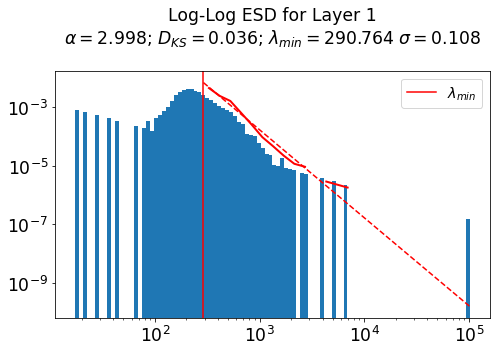

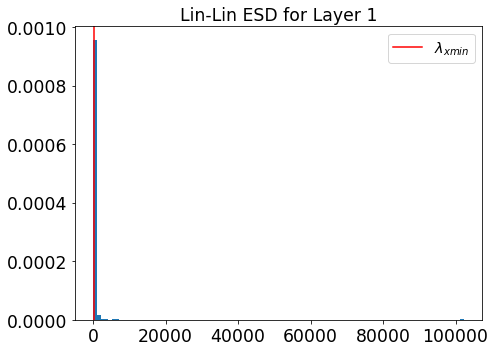

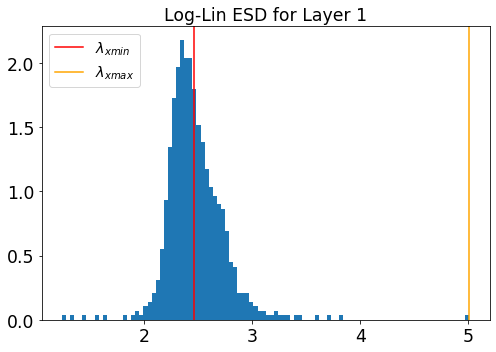

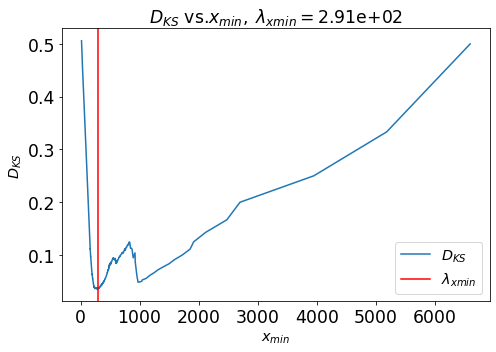

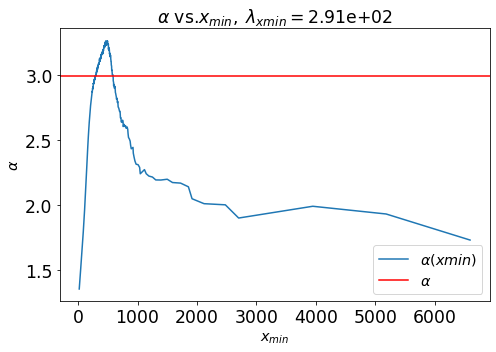

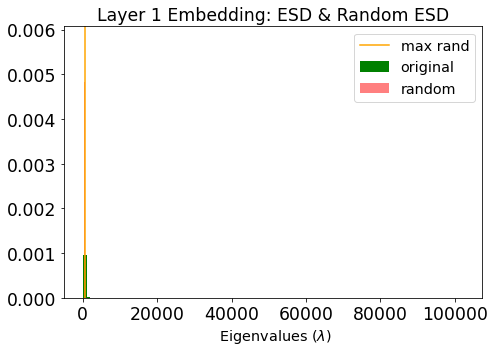

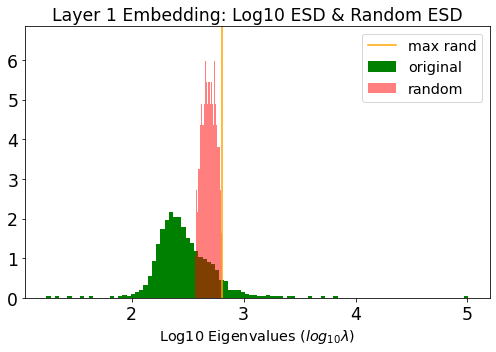

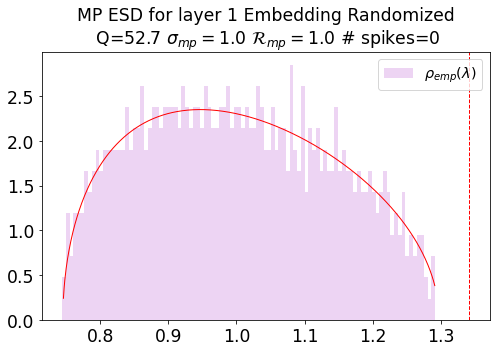

<Figure size 504x360 with 0 Axes>

In [18]:
watcher = ww.WeightWatcher(model=gpt_model)
gpt_details = watcher.analyze(randomize=True, layers=[1], fix_fingers='clip_xmax', plot=True)

<AxesSubplot:xlabel='alpha', ylabel='rand_distance'>

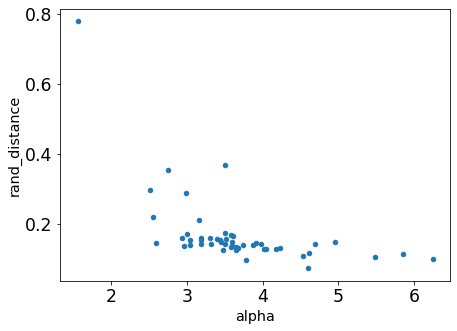